<a href="https://colab.research.google.com/github/CarlosEstellita/Image-Processing-First-Steps/blob/main/Medical%20Images%20-%20Thresholding/SLIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SLIC

##Importando bibliotecas e lendo as imagens

In [1]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage.util import img_as_ubyte
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

from matplotlib import rcParams
import matplotlib.pyplot as plt

import numpy as np
import cv2

from google.colab.patches import cv2_imshow

In [2]:
img1 = cv2.imread("ISIC_0000000.jpg")
img2 = cv2.imread("ISIC_0000004.jpg")
img3 = cv2.imread("ISIC_0000042.jpg")

##Escala de cinzas

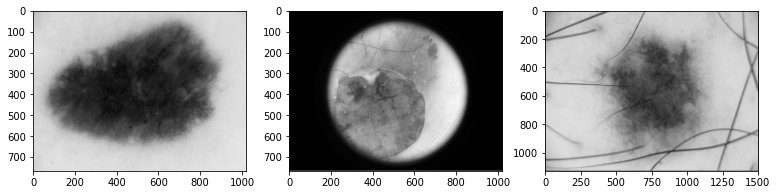

In [3]:
def gray_func(image):
  image_aux = rgb2gray(image)
  image_gray = img_as_ubyte(image_aux)
  return image_gray

img_gray1 = gray_func(img1)
img_gray2 = gray_func(img2)
img_gray3 = gray_func(img3)

rcParams['figure.figsize'] = 13, 10
fig, ax = plt.subplots(1, 3)
ax[0].imshow(img_gray1, cmap='gray')
ax[1].imshow(img_gray2, cmap='gray')
ax[2].imshow(img_gray3, cmap='gray')

##Binarização

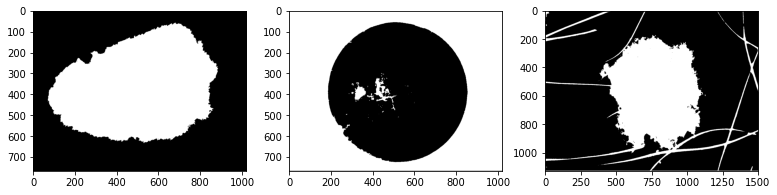

In [4]:
def otsu_func(image):
  thresh = threshold_otsu(image)
  binary = image <= thresh
  return binary

img_otsu1 = otsu_func(img_gray1)
img_otsu2 = otsu_func(img_gray2)
img_otsu3 = otsu_func(img_gray3)

rcParams['figure.figsize'] = 13, 10
fig, ax = plt.subplots(1, 3)
ax[0].imshow(img_otsu1, cmap='gray')
ax[1].imshow(img_otsu2, cmap='gray')
ax[2].imshow(img_otsu3, cmap='gray')

##SLIC

###SLIC

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.


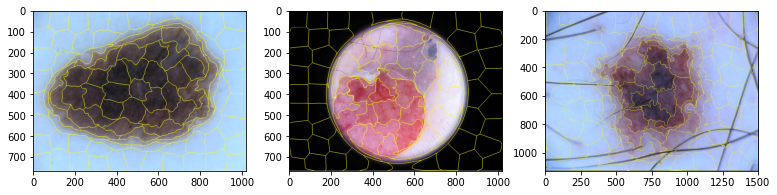

In [5]:
#serve para printar os labels
def slic_func(image, segments):
  img = slic(img_as_float(image), n_segments = segments, sigma = 5)
  slic_image = mark_boundaries(img_as_float(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), img)
  return slic_image

img_slic1 = slic_func(img1, 100)
img_slic2 = slic_func(img2, 100)
img_slic3 = slic_func(img3, 100)

rcParams['figure.figsize'] = 13, 10
fig, ax = plt.subplots(1, 3)
ax[0].imshow(img_slic1)
ax[1].imshow(img_slic2)
ax[2].imshow(img_slic3)



#função que realmente vamos usar para fazer as mascaras de cada label
def true_slic_func(image, segments):
  img = slic(img_as_float(image), n_segments = segments, sigma = 5)
  return img

img_true_slic1 = true_slic_func(img1, 100)
img_true_slic2 = true_slic_func(img2, 100)
img_true_slic3 = true_slic_func(img3, 100)

###Fazendo suas mascaras binarias e mostrando a area(pixels) de cada um

In [6]:
def slic_labels(image_slic, image_original, slic_list):
  for (i, segVal) in enumerate(np.unique(image_slic)):
    mask = np.zeros(image_original.shape[:2], dtype = "uint8")
    mask[image_slic == segVal] = 255
    slic_list.append(mask)

slic_labels_list1 = []    #listas para armazenar todas as mascaras de cada label das imagens
slic_labels_list3 = []
img_slic_labels1 = slic_labels(img_true_slic1, img1, slic_labels_list1)
img_slic_labels1 = slic_labels(img_true_slic3, img3, slic_labels_list3)

Mostrando a label  0
A area desse label é  7017


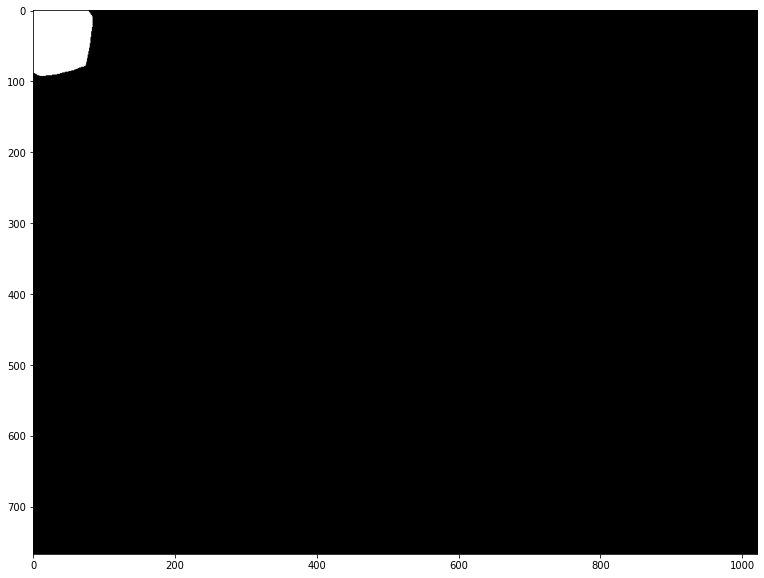

Mostrando a label  1
A area desse label é  8898


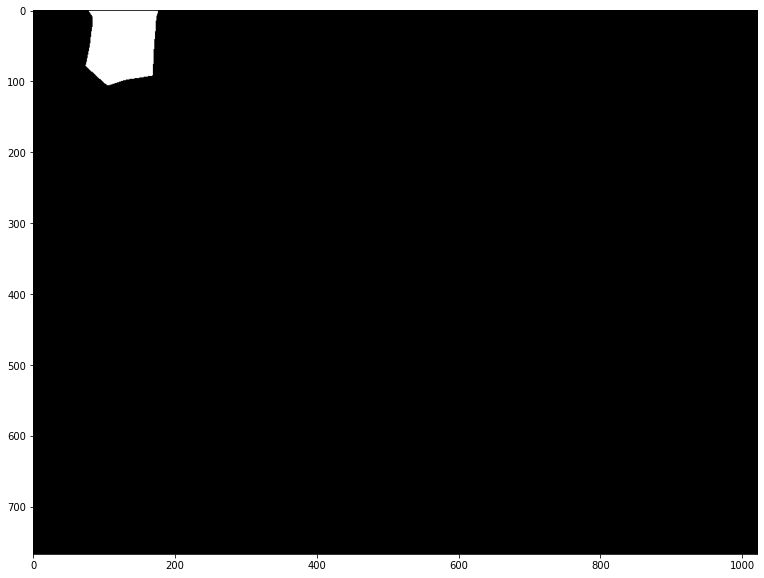

Mostrando a label  2
A area desse label é  9744


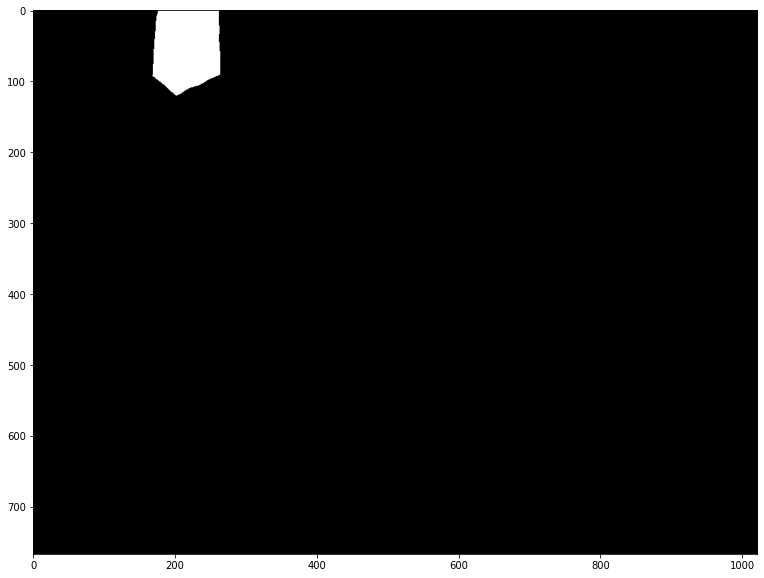

Mostrando a label  3
A area desse label é  9900


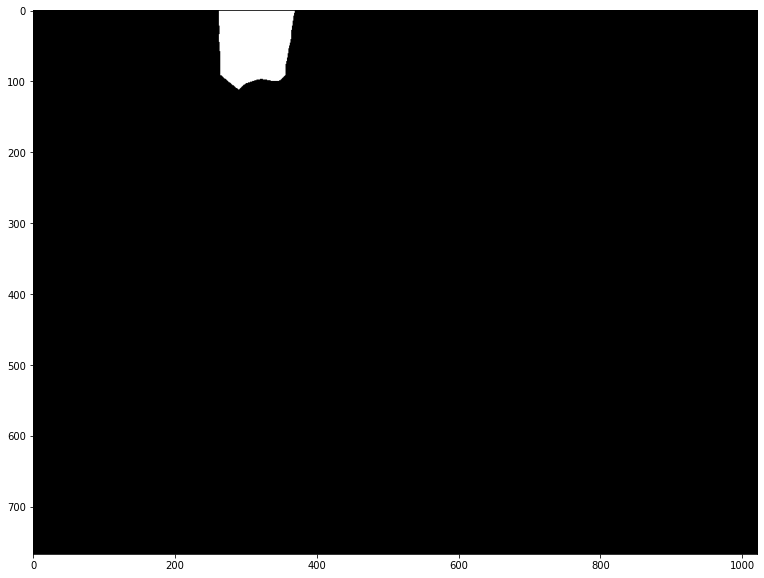

Mostrando a label  4
A area desse label é  9826


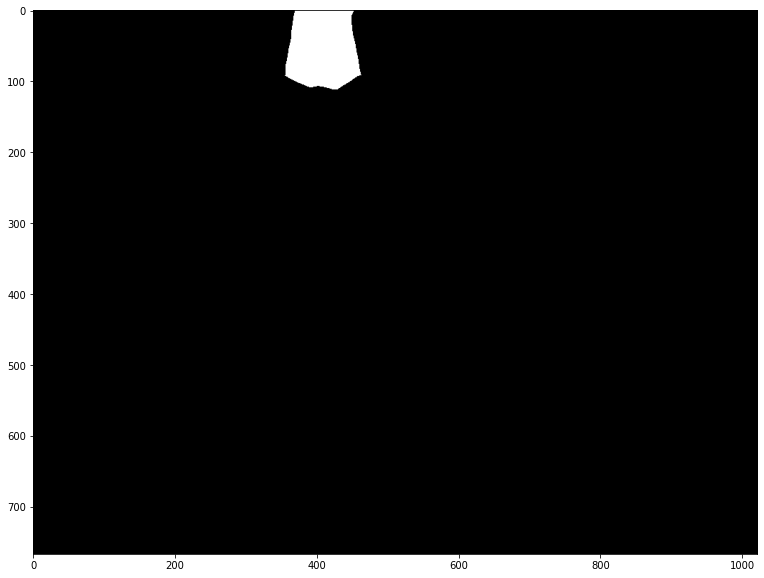

Mostrando a label  5
A area desse label é  8645


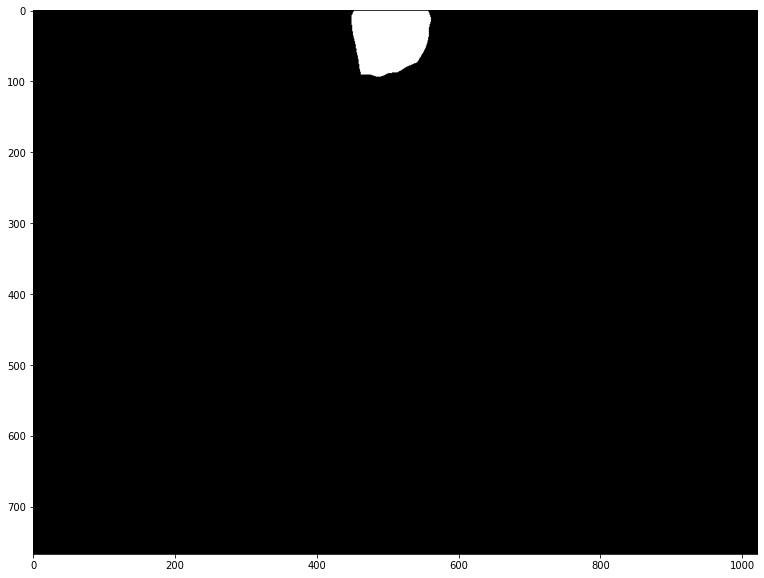

Mostrando a label  6
A area desse label é  6962


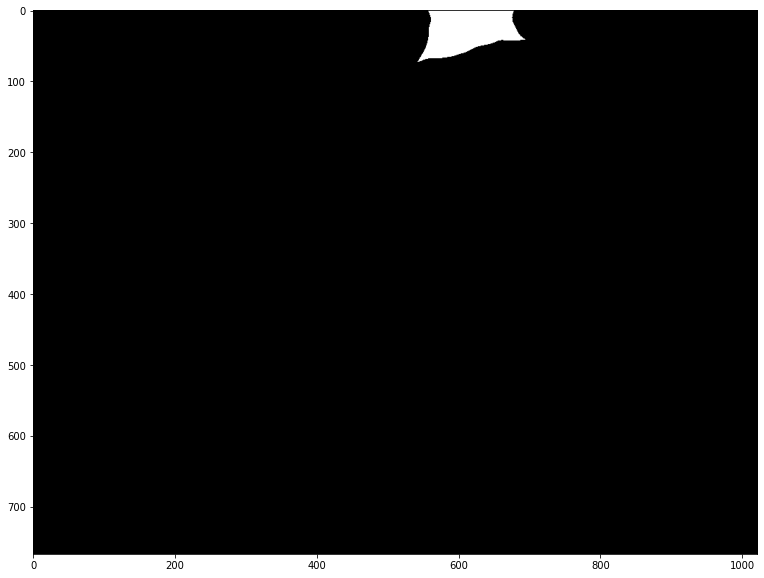

Mostrando a label  7
A area desse label é  8114


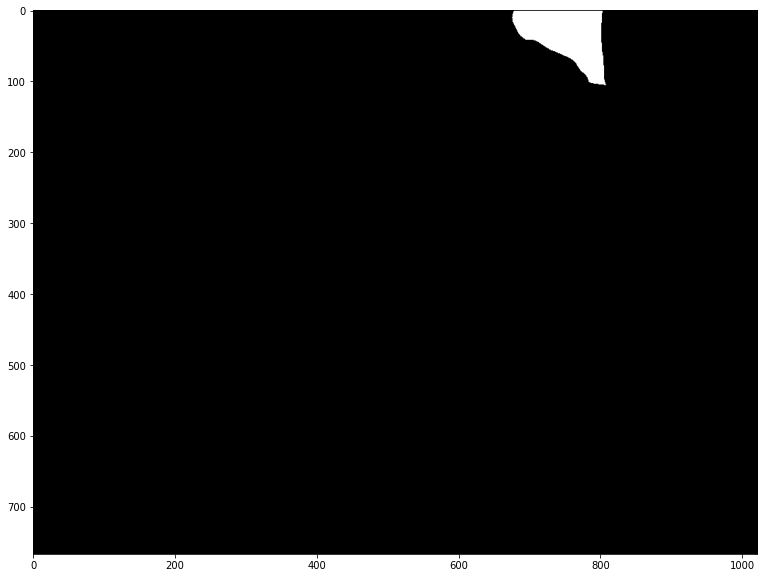

Mostrando a label  8
A area desse label é  12896


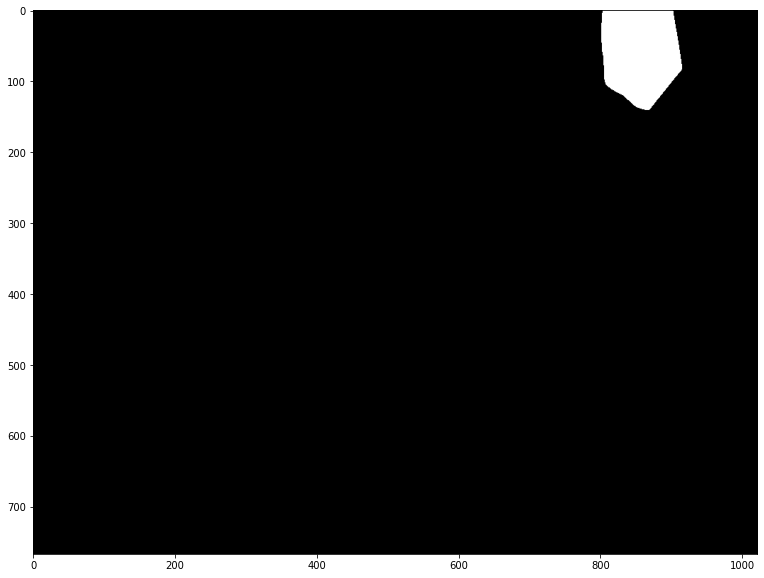

Mostrando a label  9
A area desse label é  10522


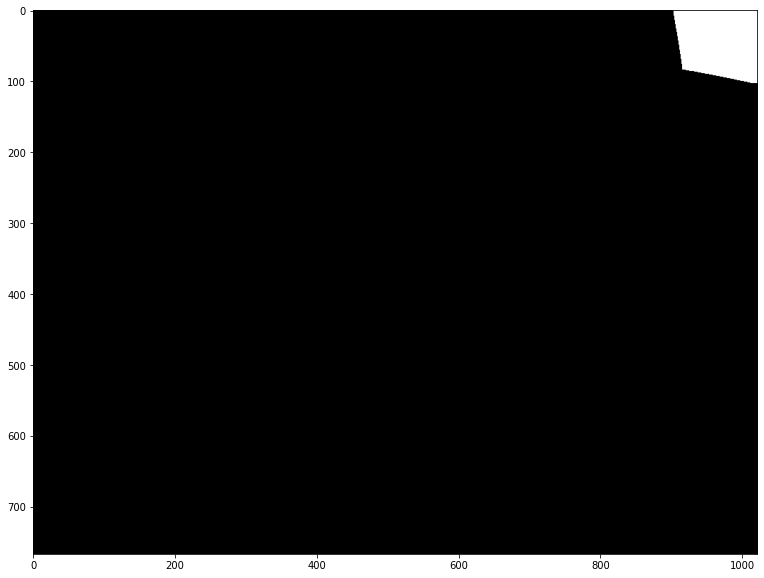

Mostrando a label  10
A area desse label é  4923


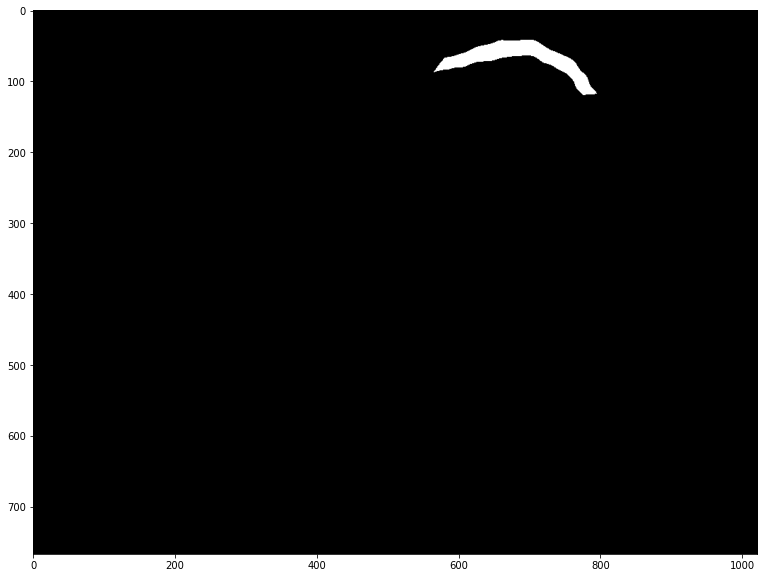

Mostrando a label  11
A area desse label é  5551


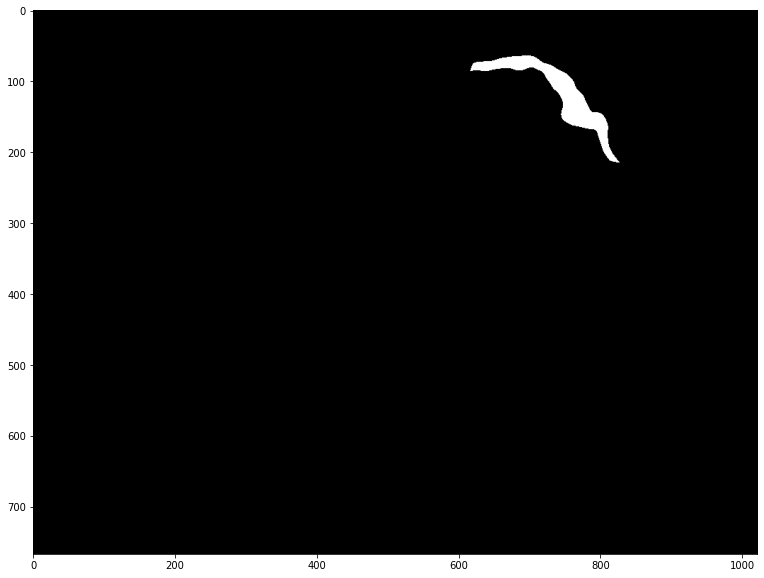

Mostrando a label  12
A area desse label é  5066


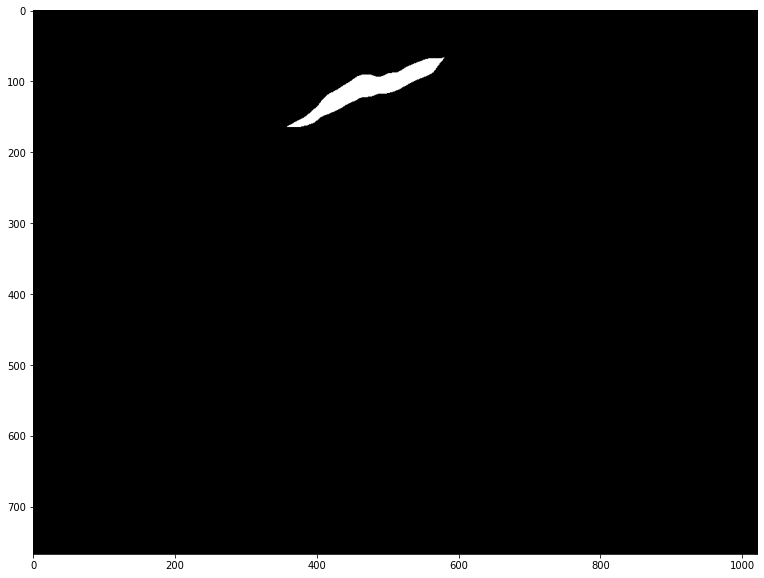

Mostrando a label  13
A area desse label é  4951


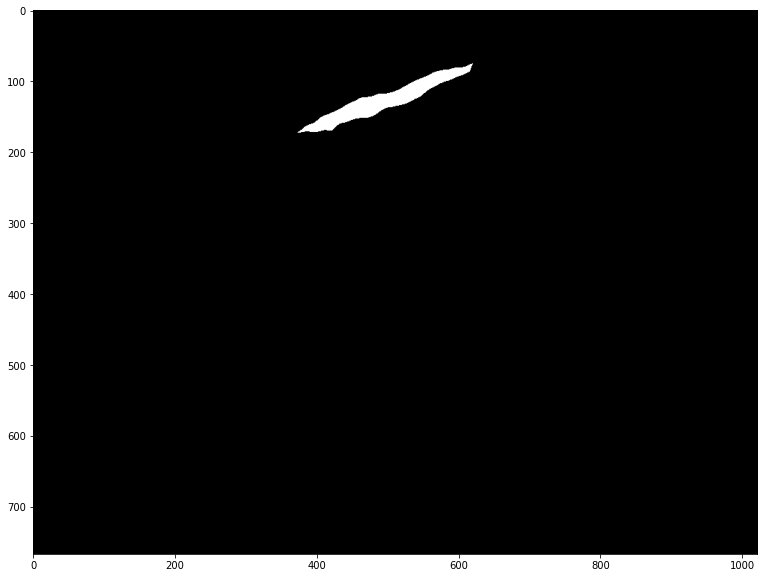

Mostrando a label  14
A area desse label é  8912


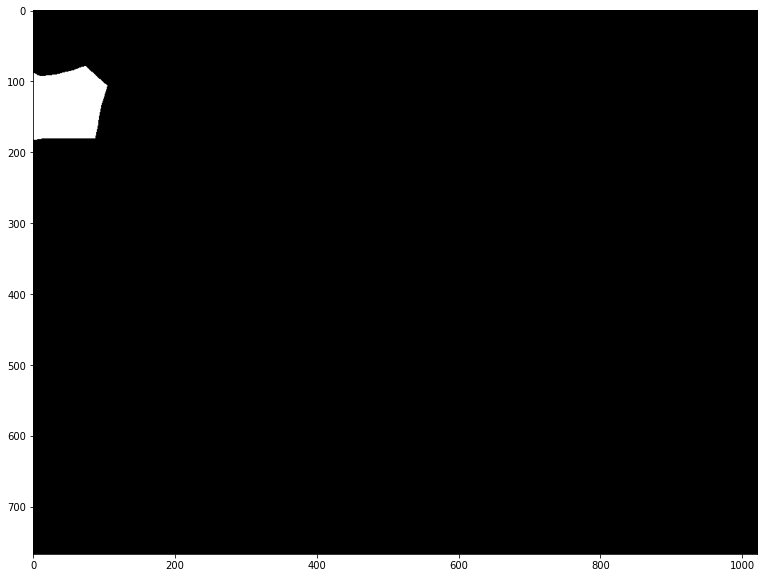

Mostrando a label  15
A area desse label é  10347


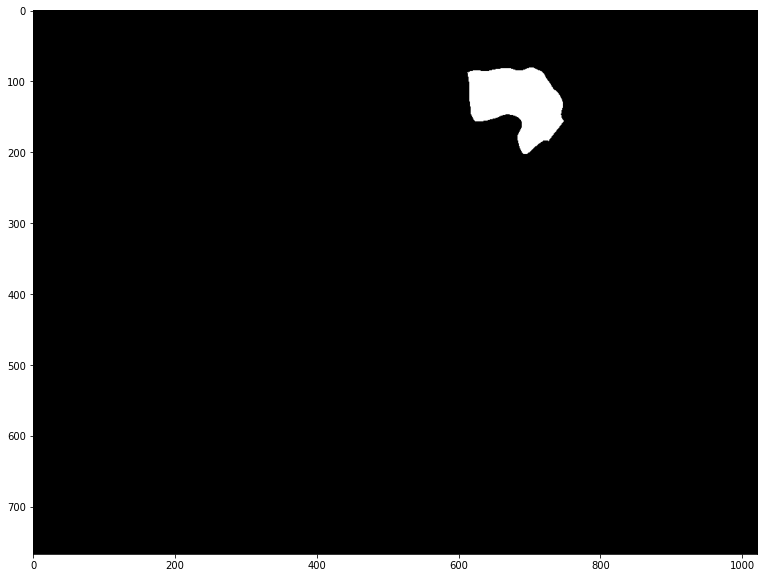

Mostrando a label  16
A area desse label é  12469


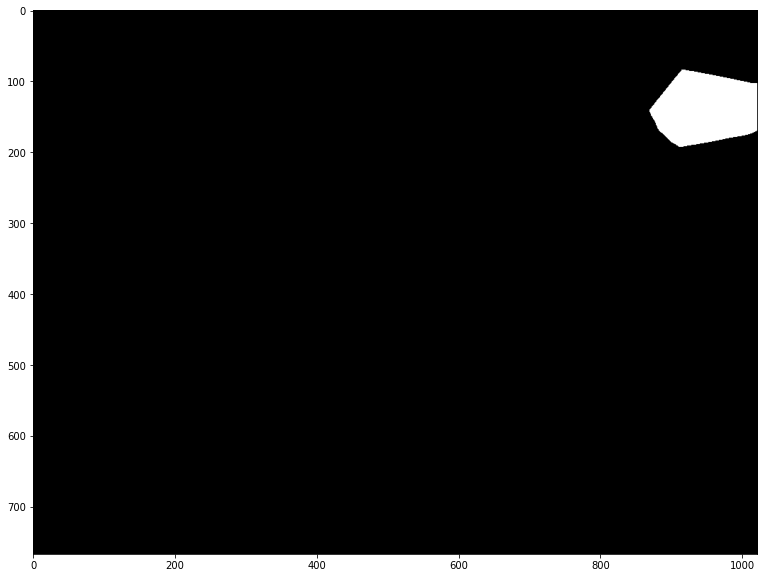

Mostrando a label  17
A area desse label é  6342


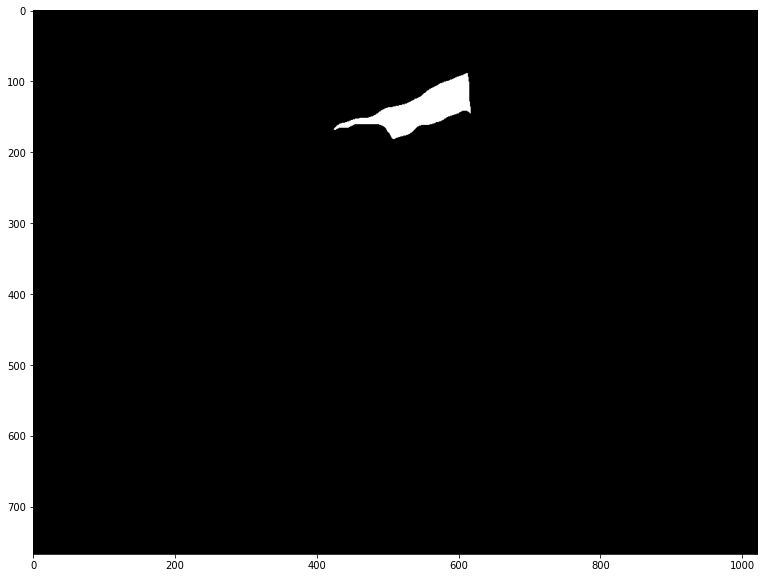

Mostrando a label  18
A area desse label é  8882


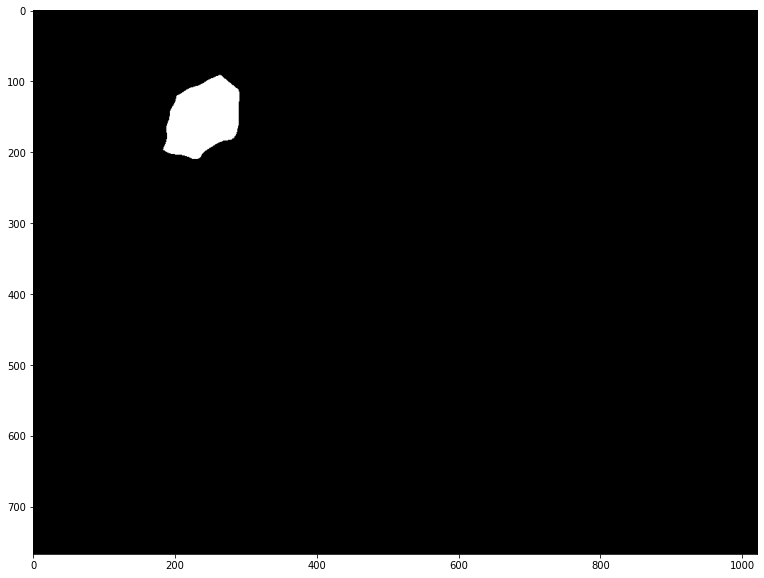

Mostrando a label  19
A area desse label é  9713


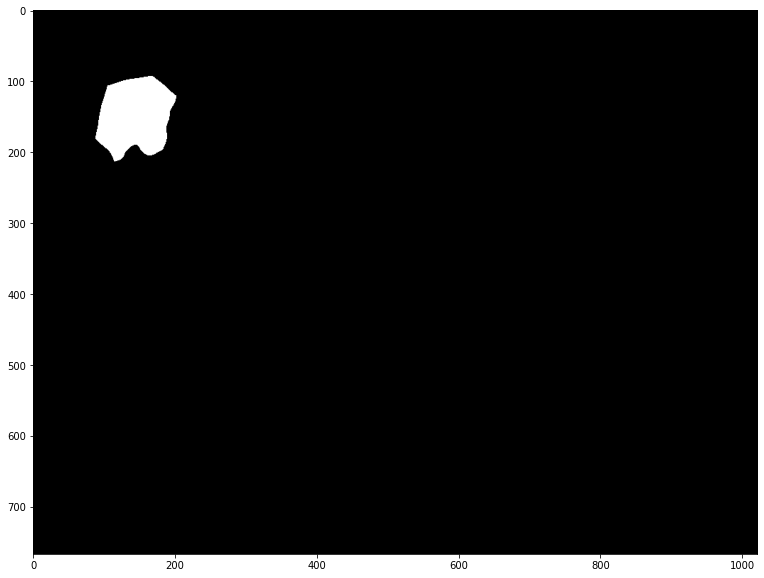

Mostrando a label  20
A area desse label é  7494


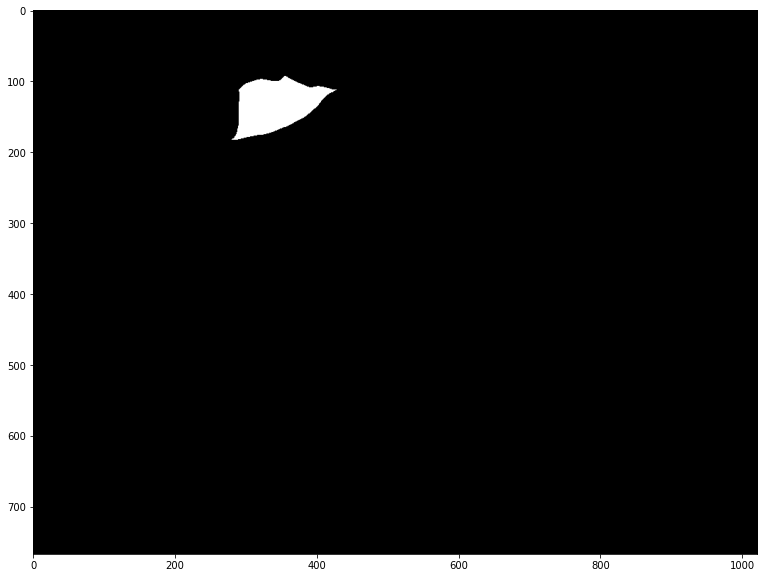

Mostrando a label  21
A area desse label é  6910


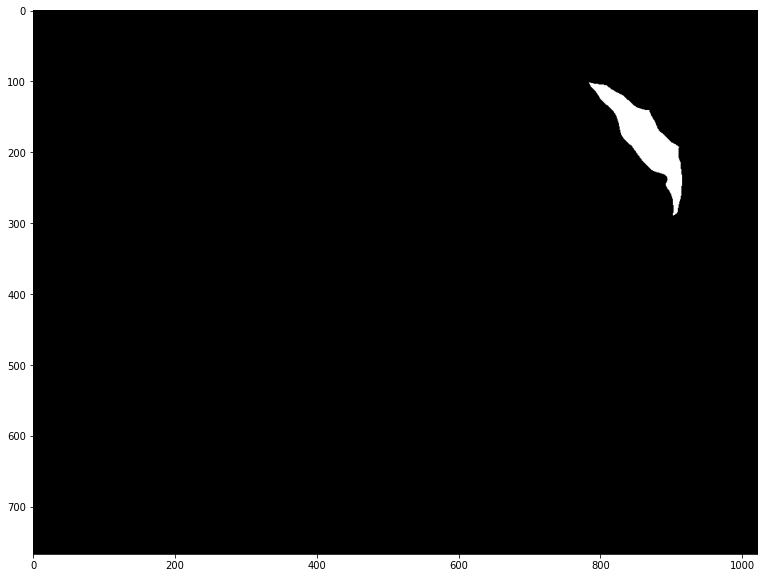

Mostrando a label  22
A area desse label é  4634


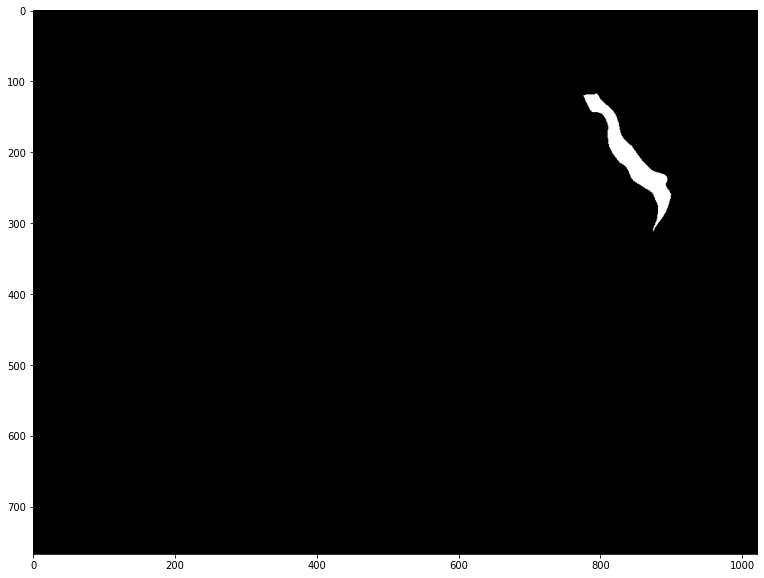

Mostrando a label  23
A area desse label é  9692


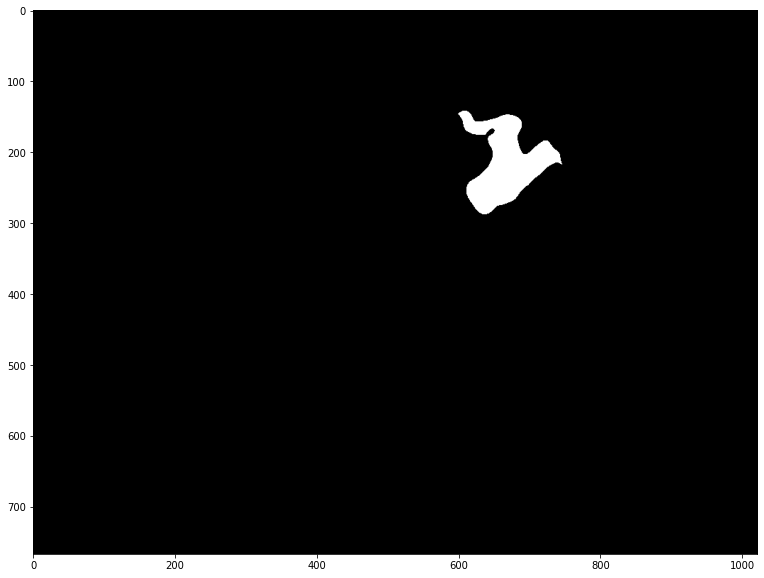

Mostrando a label  24
A area desse label é  8985


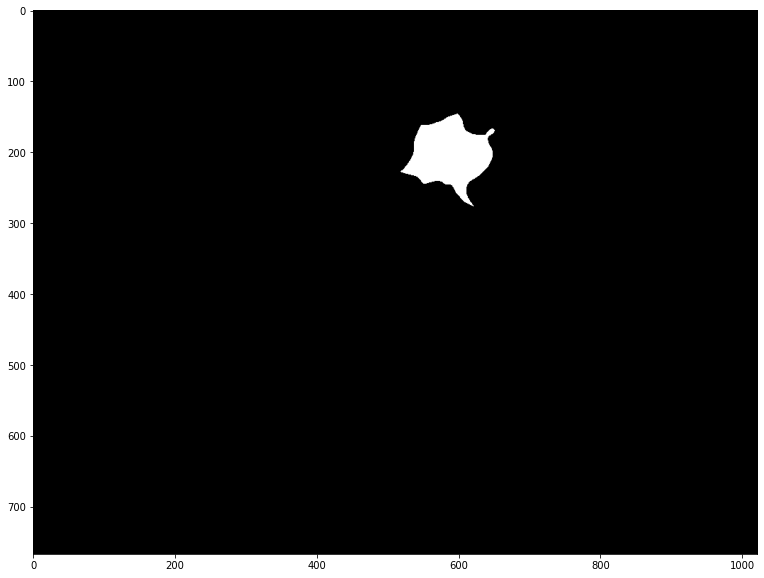

Mostrando a label  25
A area desse label é  6171


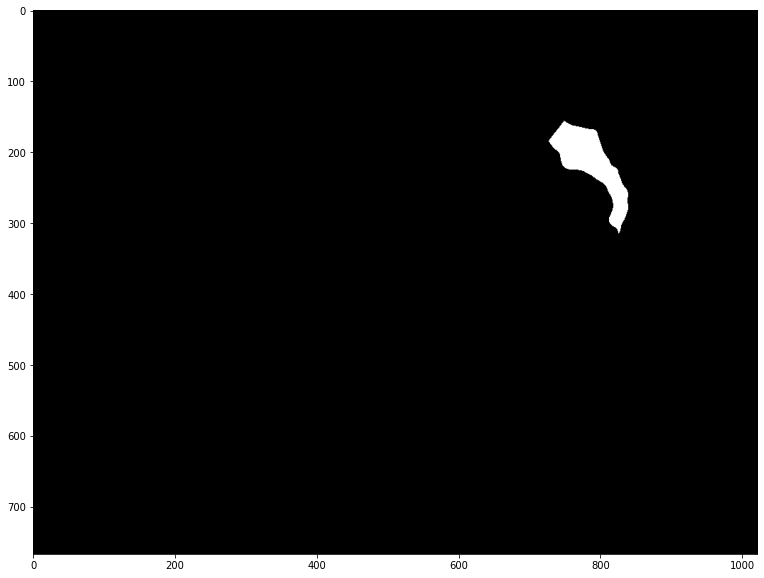

Mostrando a label  26
A area desse label é  8893


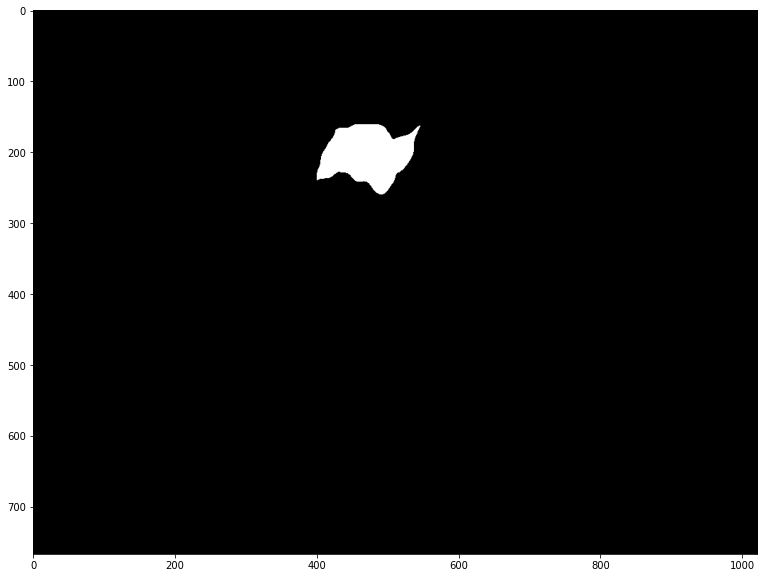

Mostrando a label  27
A area desse label é  6661


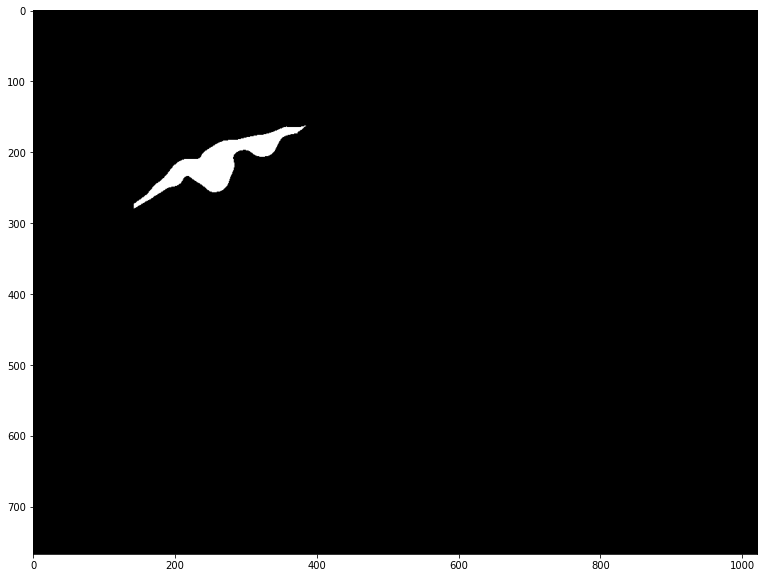

Mostrando a label  28
A area desse label é  7283


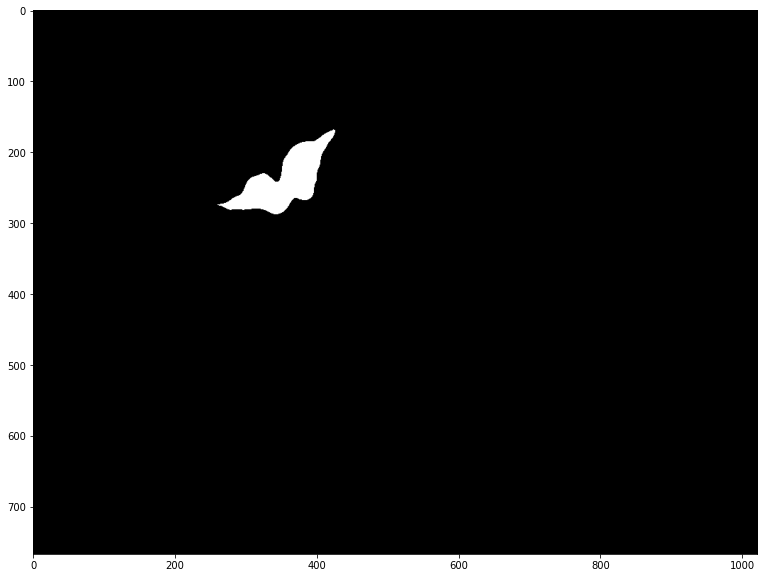

Mostrando a label  29
A area desse label é  5794


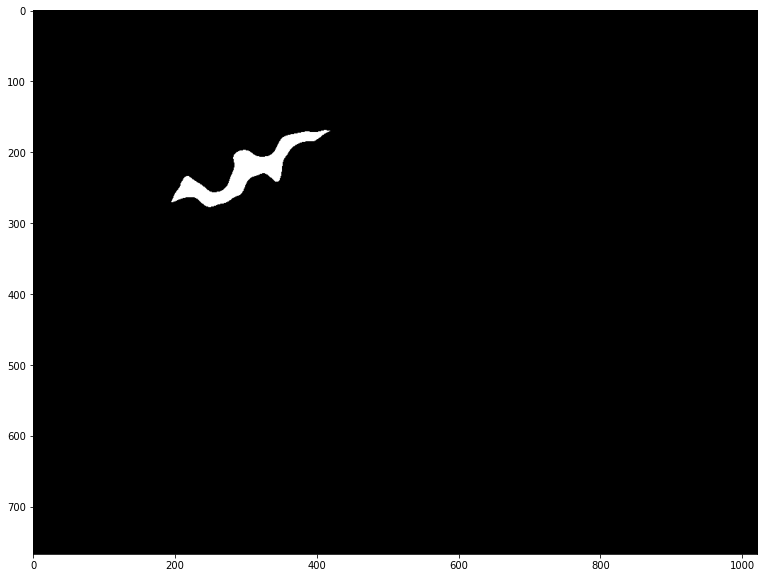

Mostrando a label  30
A area desse label é  11004


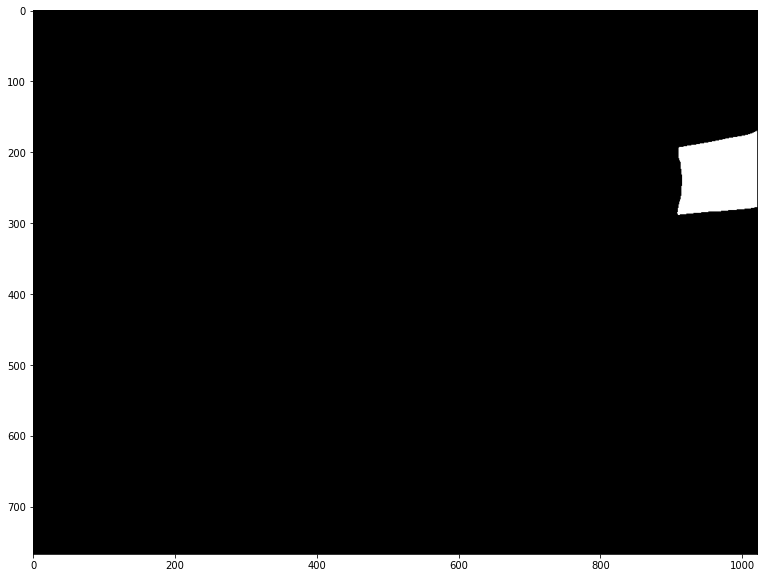

Mostrando a label  31
A area desse label é  10393


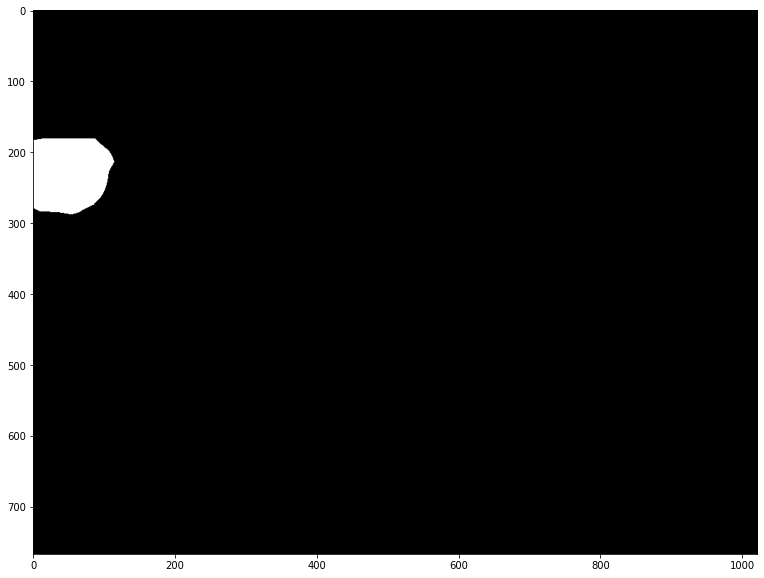

Mostrando a label  32
A area desse label é  6622


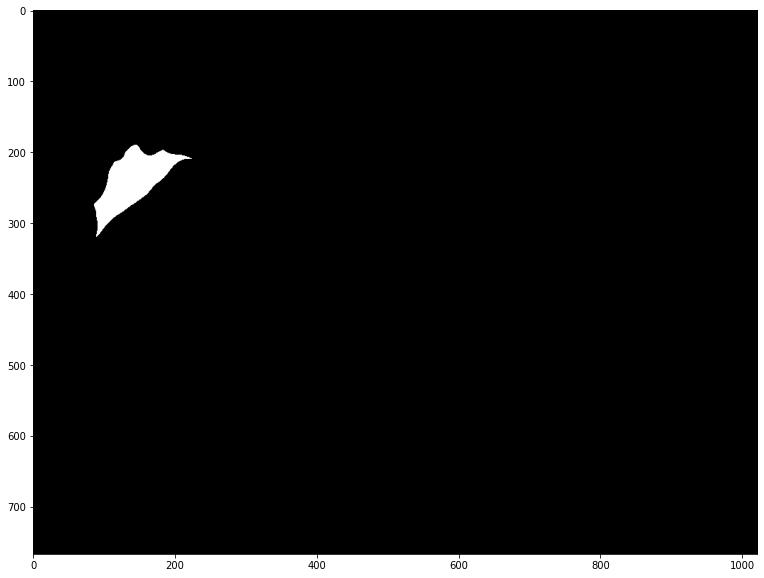

Mostrando a label  33
A area desse label é  7782


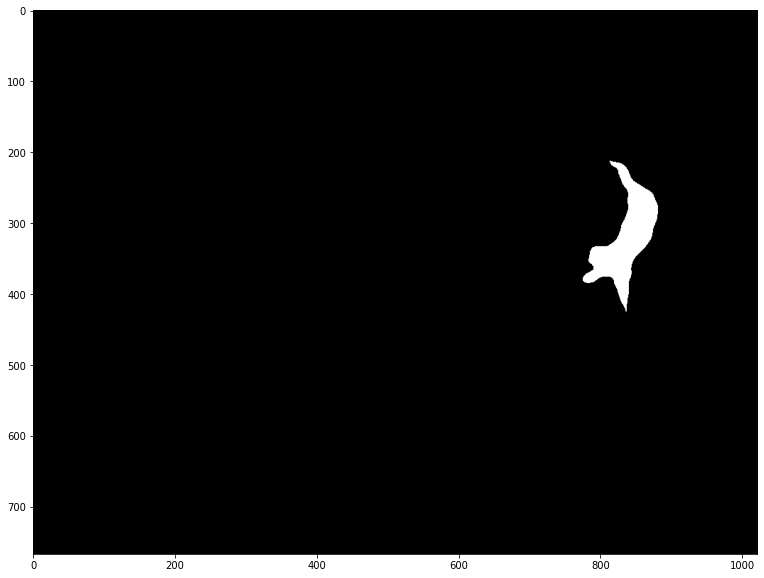

Mostrando a label  34
A area desse label é  9167


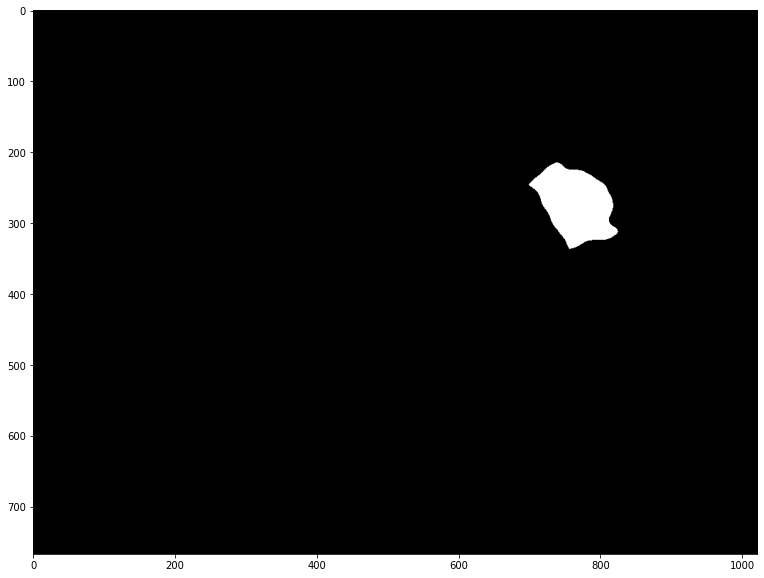

Mostrando a label  35
A area desse label é  8053


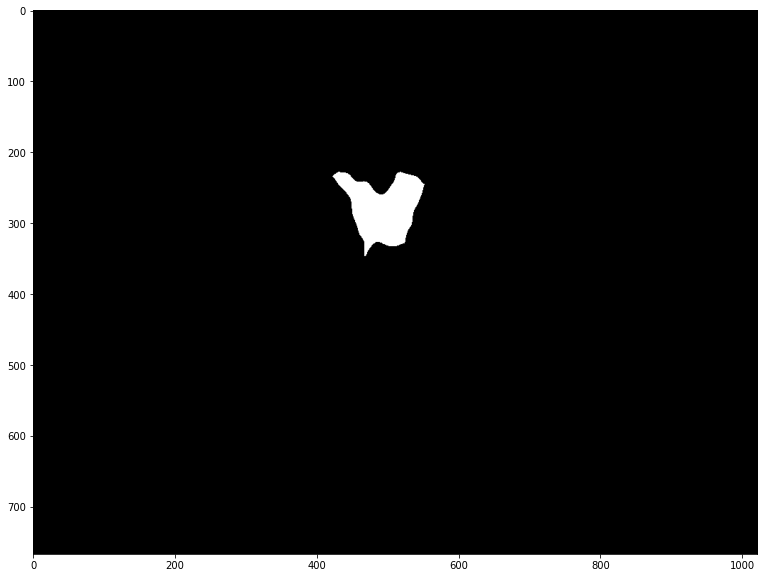

Mostrando a label  36
A area desse label é  9328


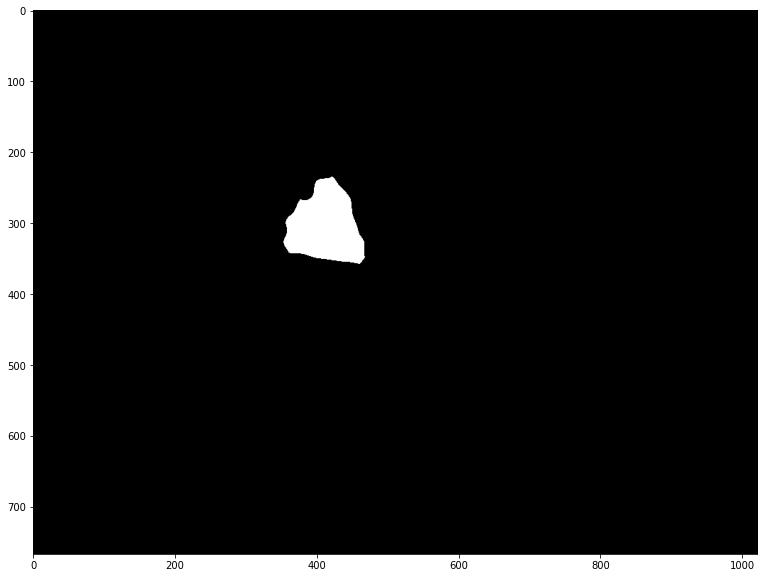

Mostrando a label  37
A area desse label é  10868


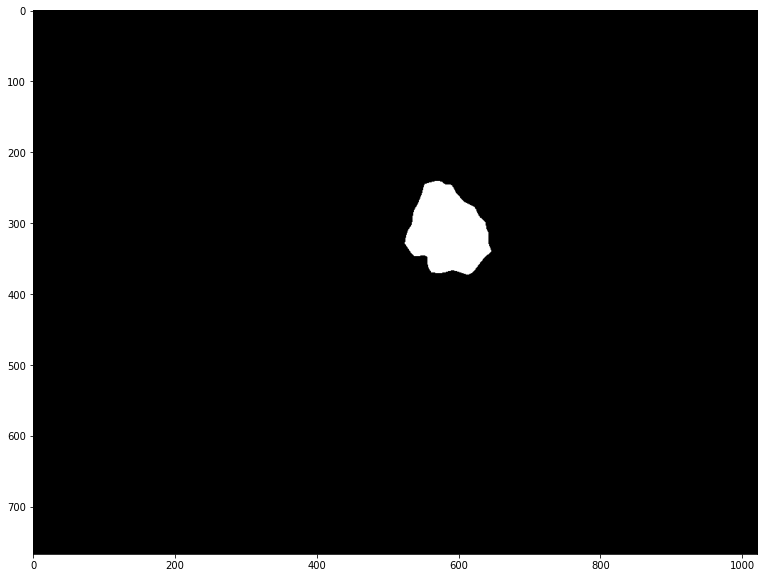

Mostrando a label  38
A area desse label é  4426


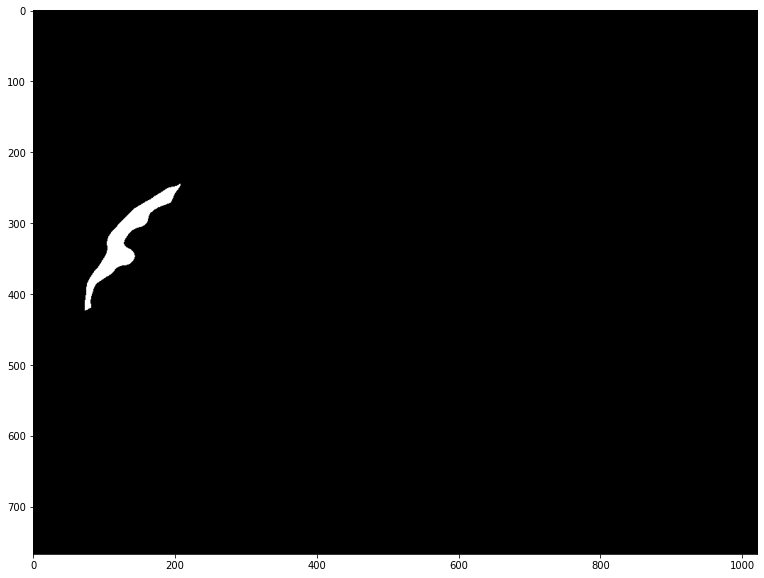

Mostrando a label  39
A area desse label é  9462


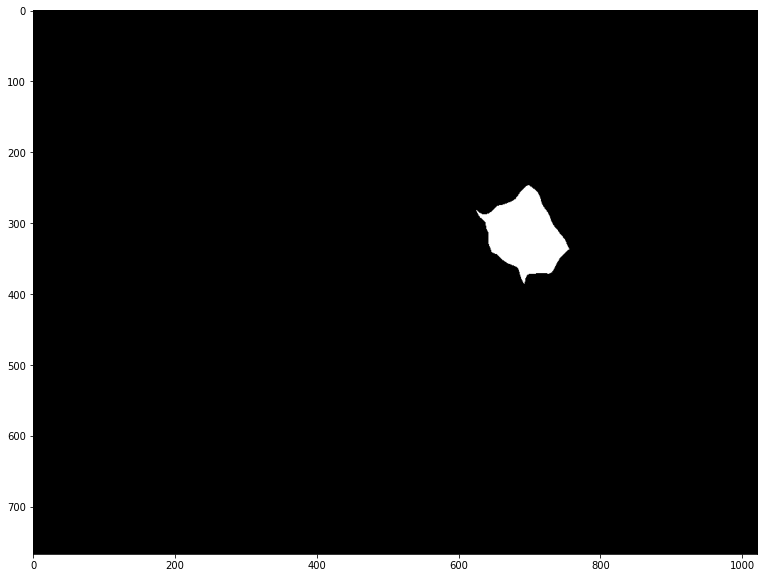

Mostrando a label  40
A area desse label é  4274


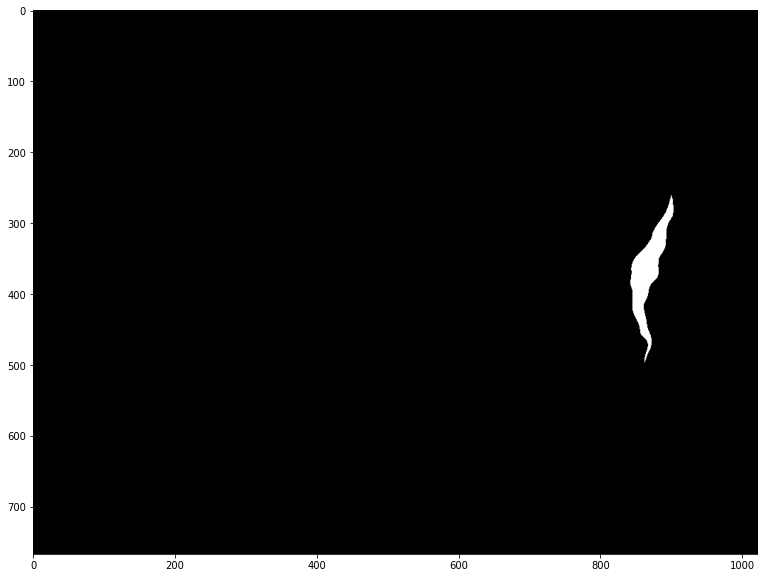

Mostrando a label  41
A area desse label é  9483


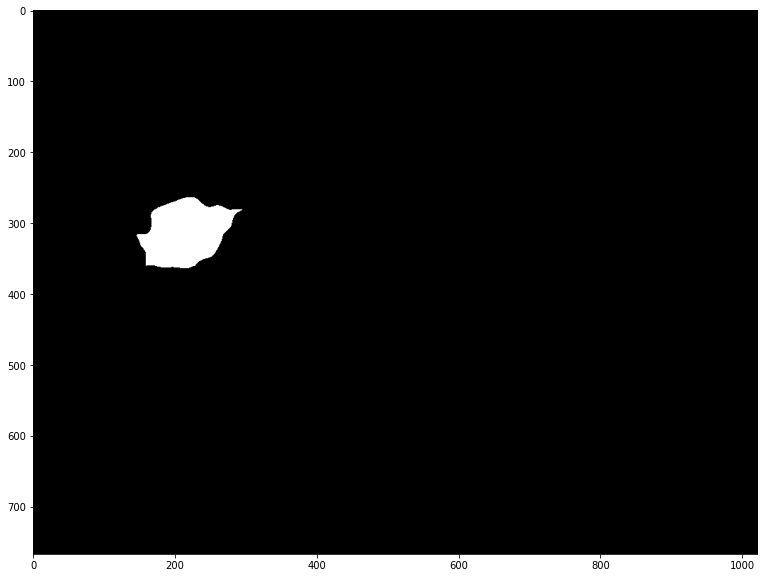

Mostrando a label  42
A area desse label é  6882


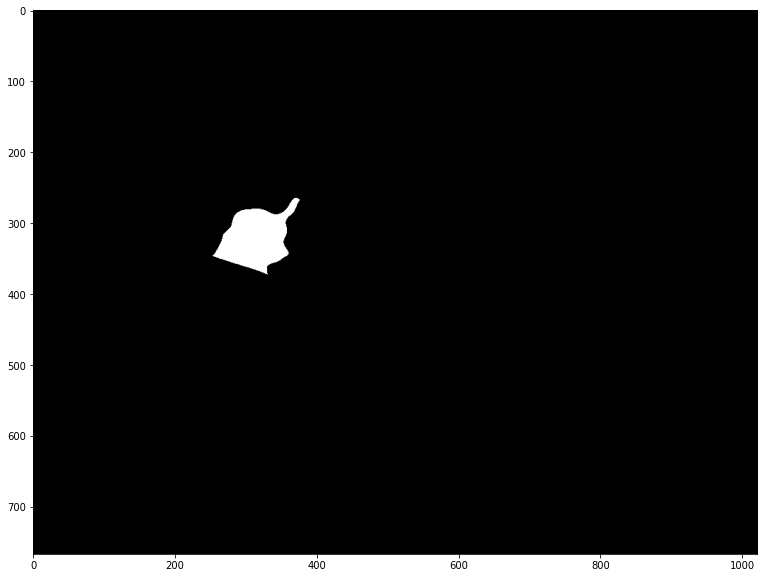

Mostrando a label  43
A area desse label é  4507


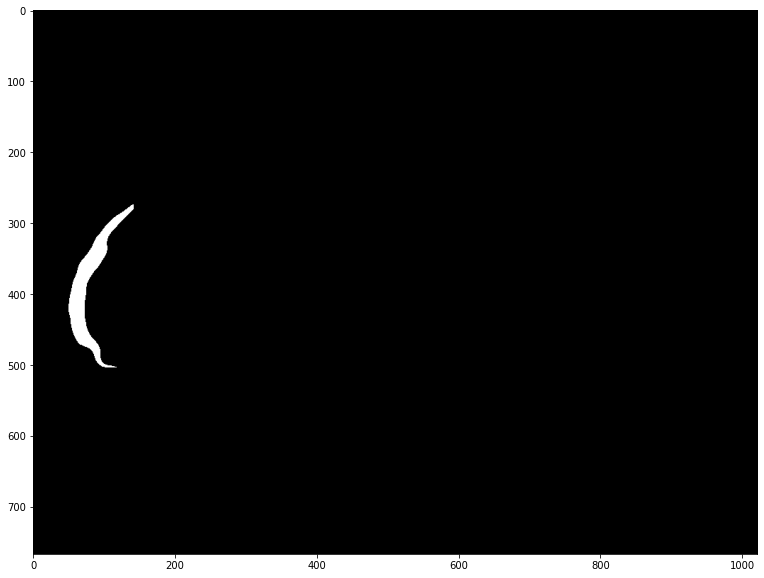

Mostrando a label  44
A area desse label é  8199


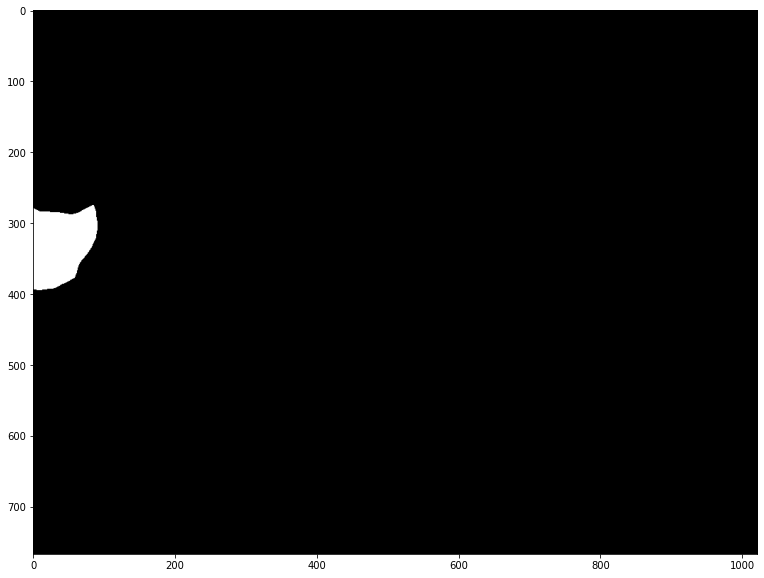

Mostrando a label  45
A area desse label é  11120


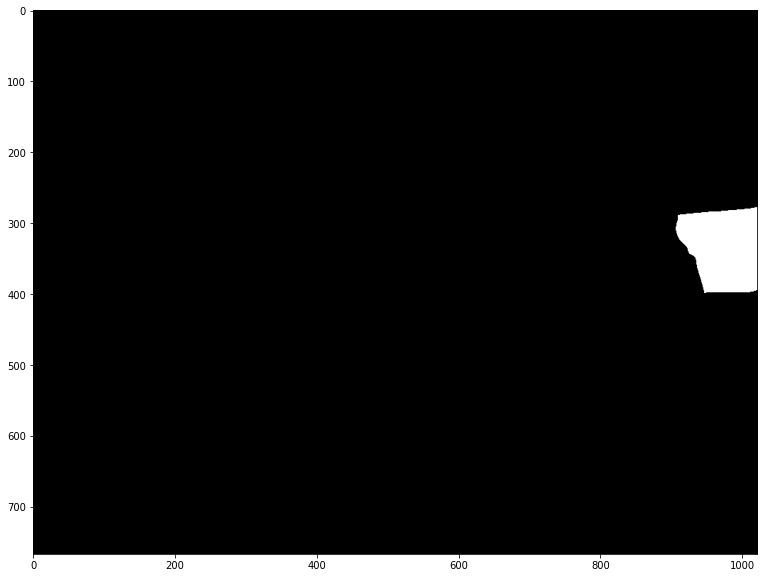

Mostrando a label  46
A area desse label é  7405


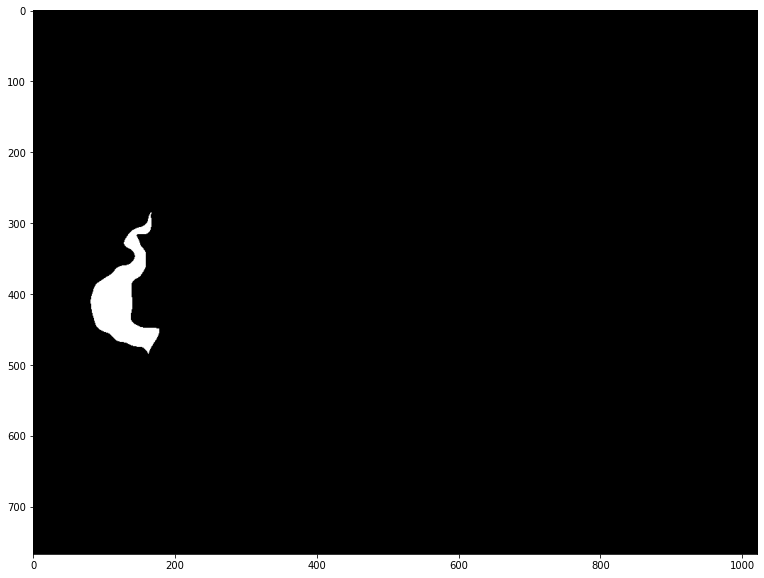

Mostrando a label  47
A area desse label é  8755


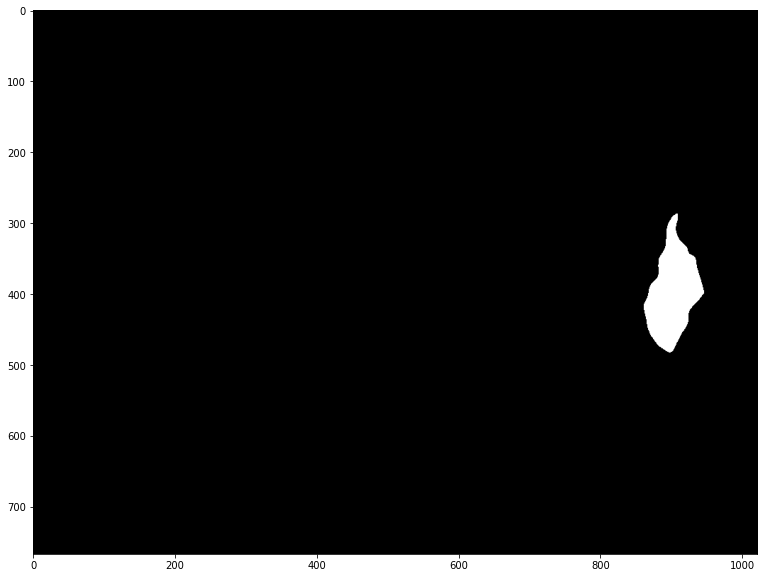

Mostrando a label  48
A area desse label é  9381


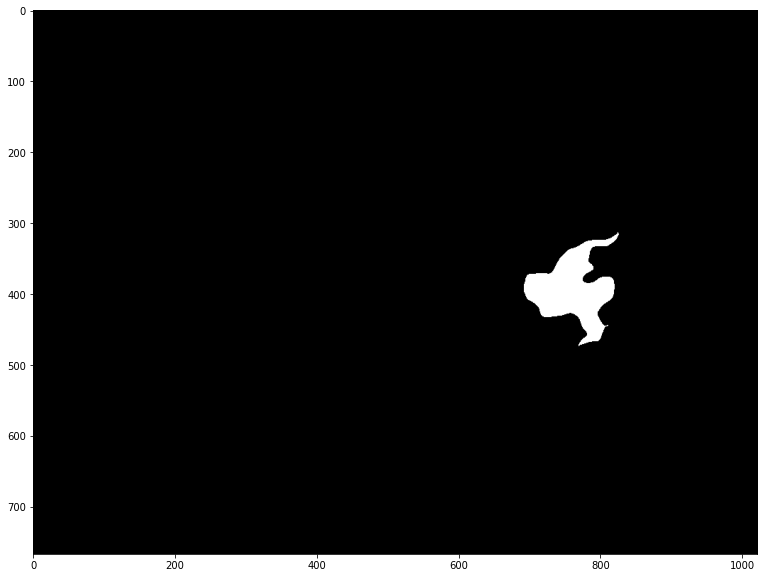

Mostrando a label  49
A area desse label é  7885


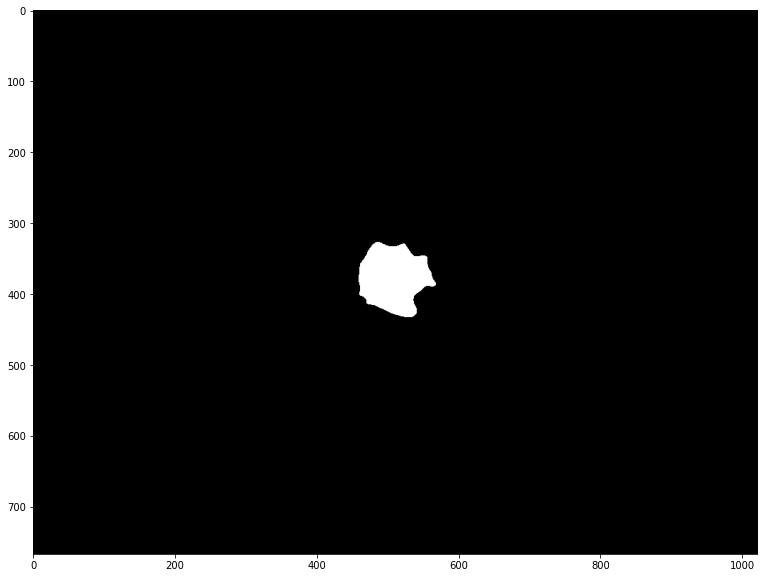

Mostrando a label  50
A area desse label é  8369


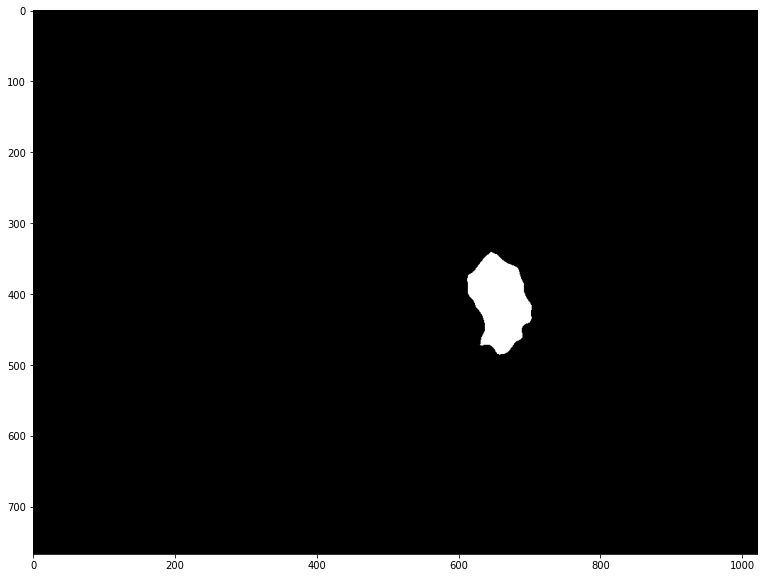

Mostrando a label  51
A area desse label é  10142


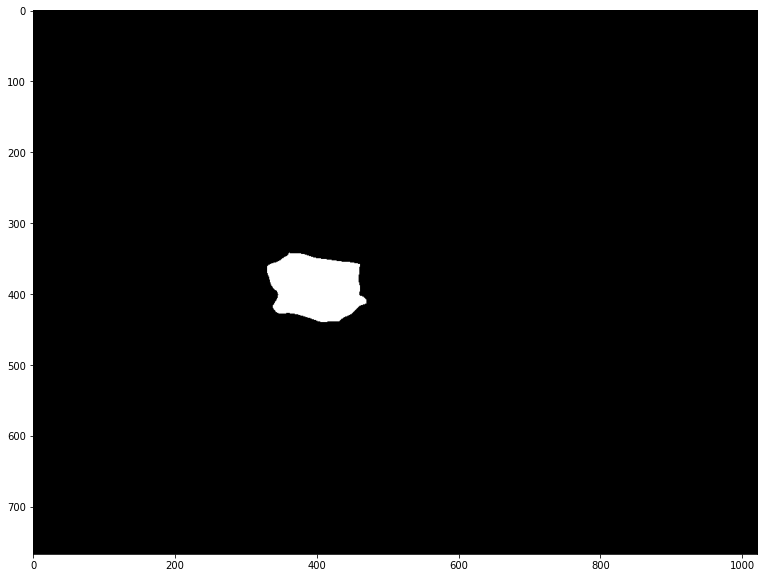

Mostrando a label  52
A area desse label é  9280


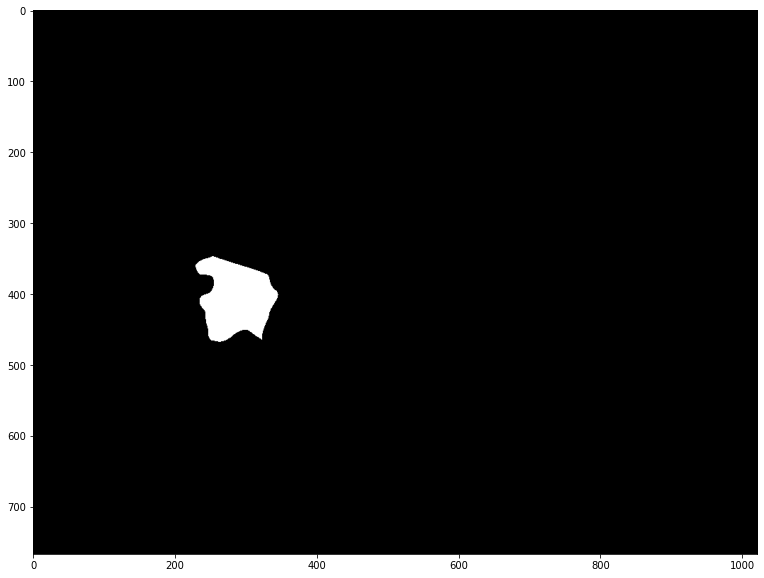

Mostrando a label  53
A area desse label é  10176


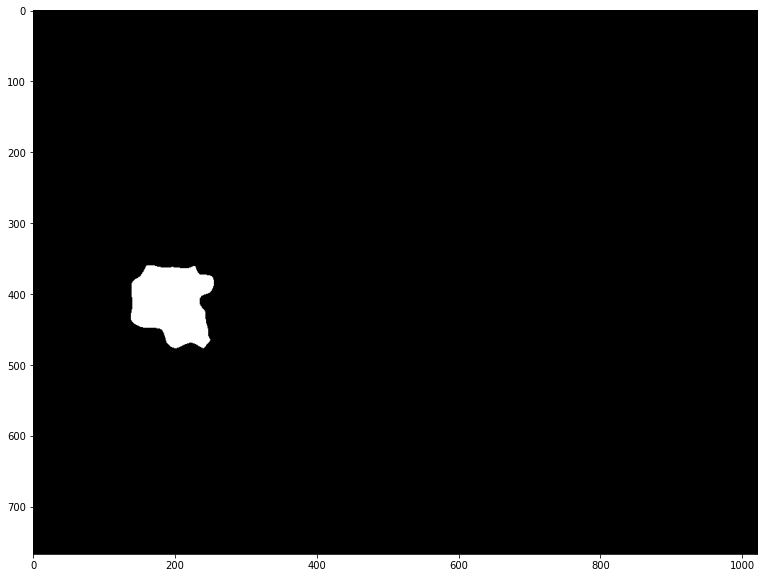

Mostrando a label  54
A area desse label é  9164


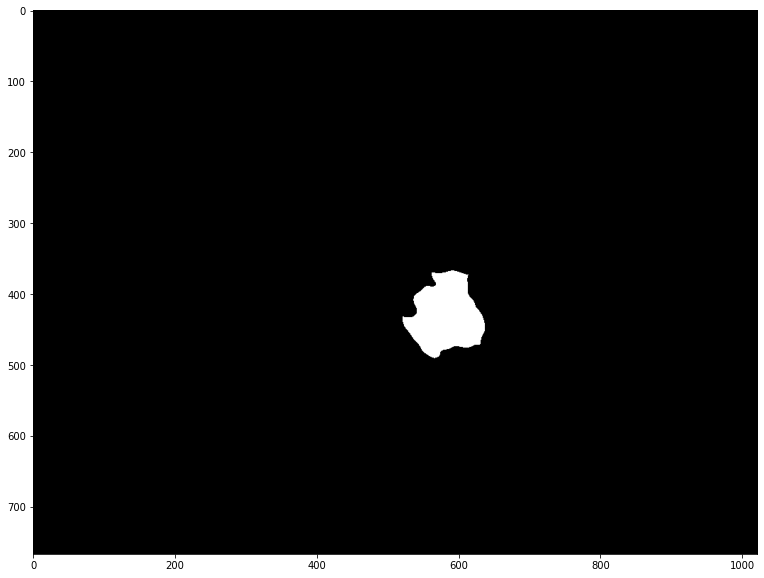

Mostrando a label  55
A area desse label é  4646


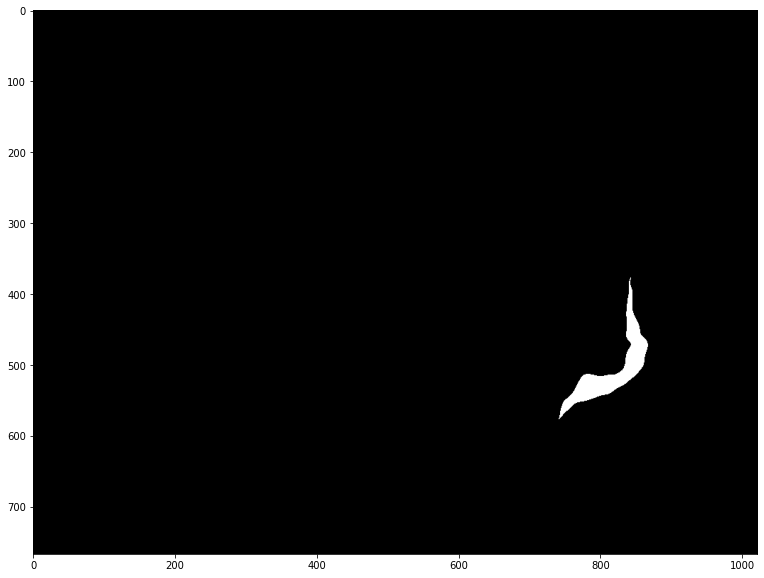

Mostrando a label  56
A area desse label é  6472


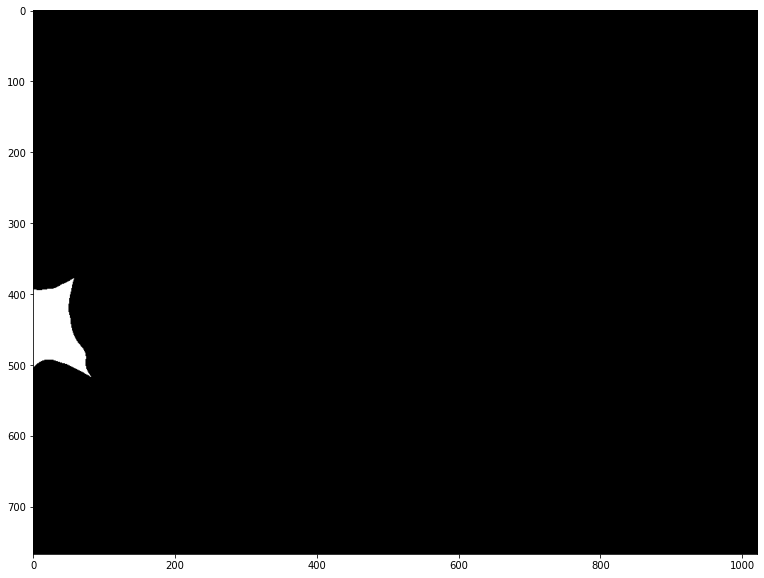

Mostrando a label  57
A area desse label é  6465


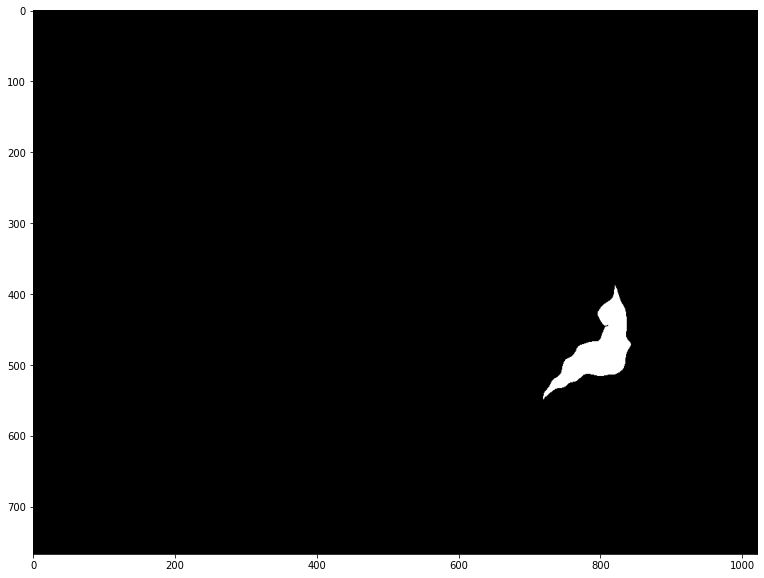

Mostrando a label  58
A area desse label é  11848


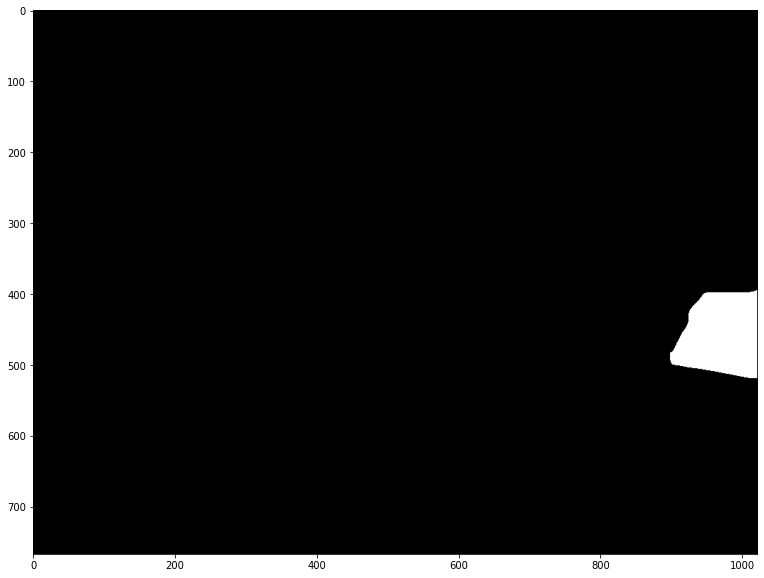

Mostrando a label  59
A area desse label é  9516


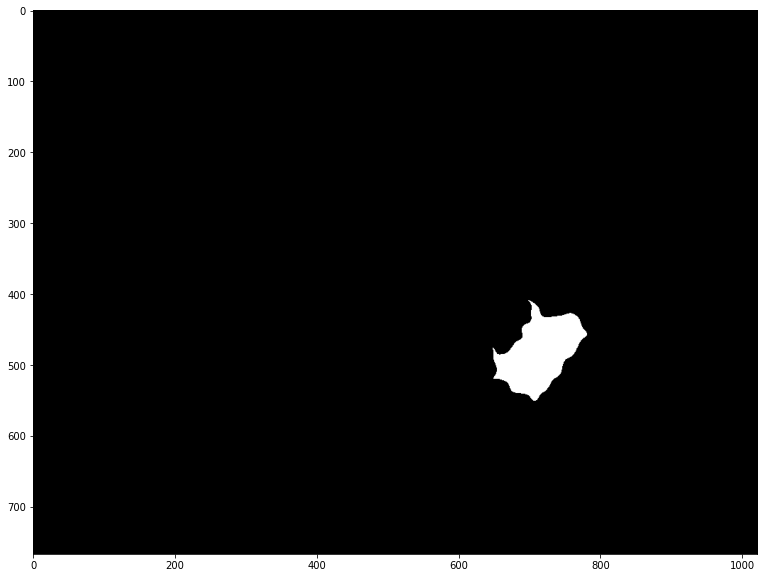

Mostrando a label  60
A area desse label é  10864


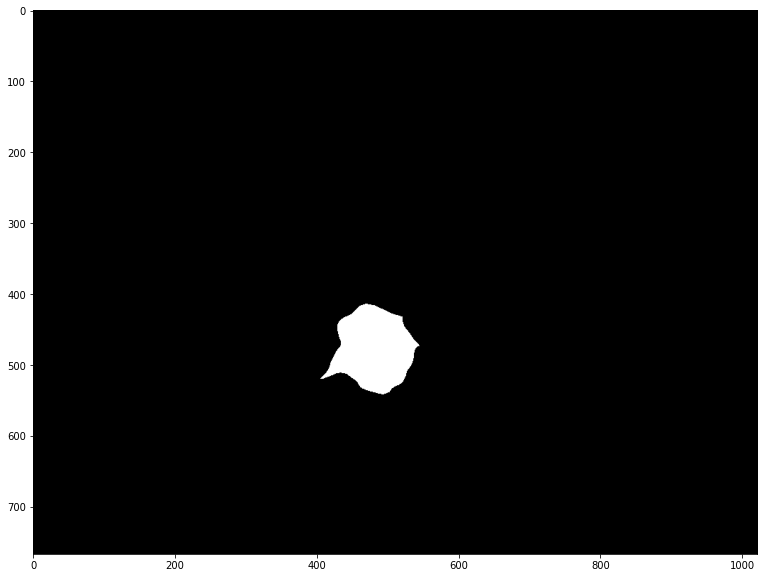

Mostrando a label  61
A area desse label é  8154


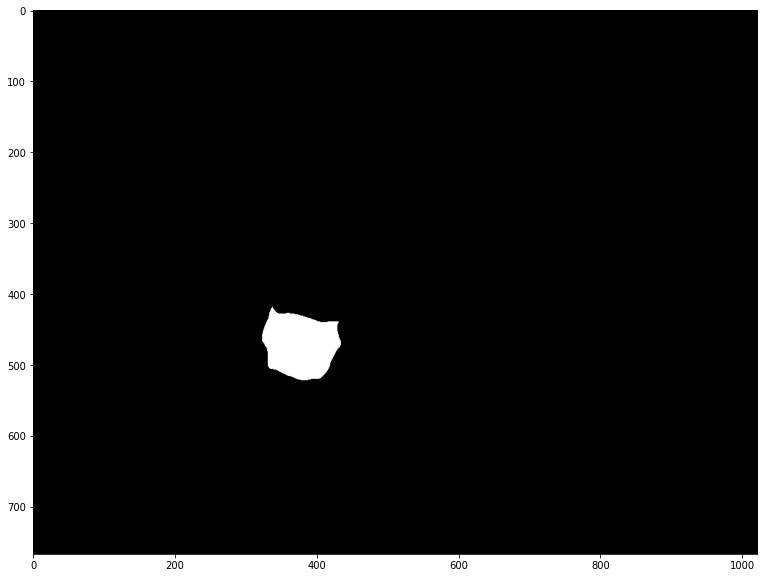

Mostrando a label  62
A area desse label é  6315


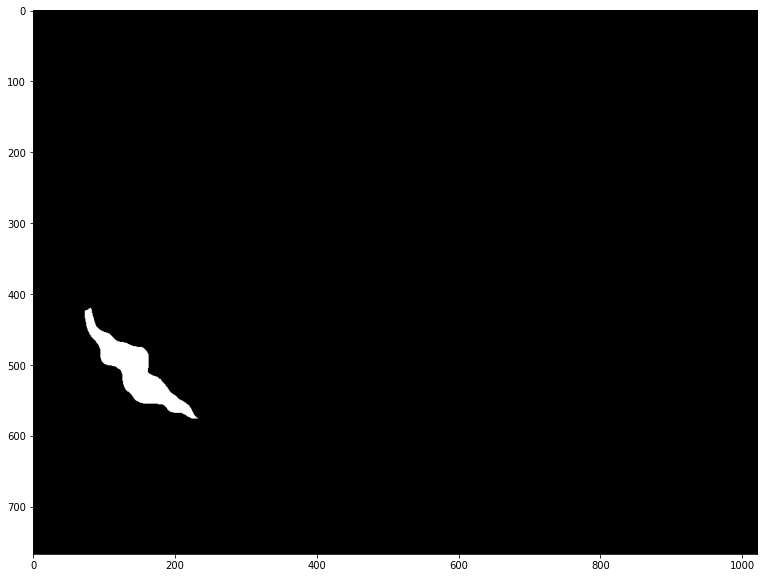

Mostrando a label  63
A area desse label é  8522


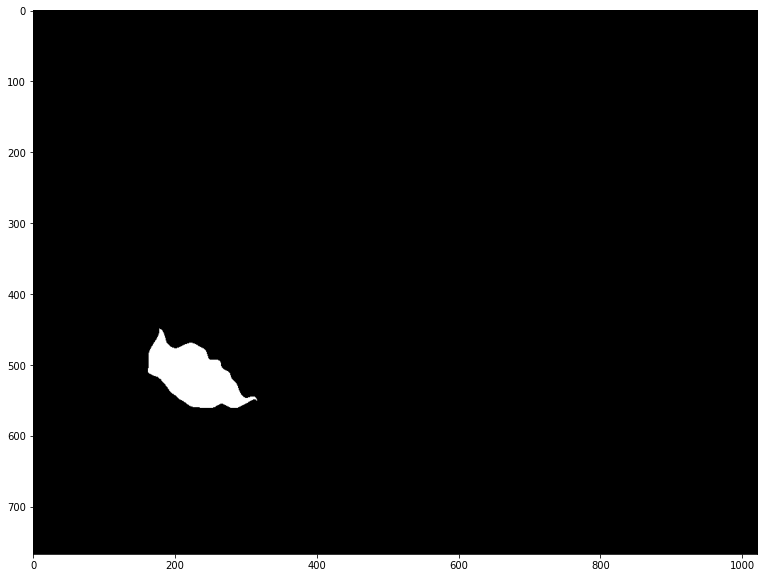

Mostrando a label  64
A area desse label é  7593


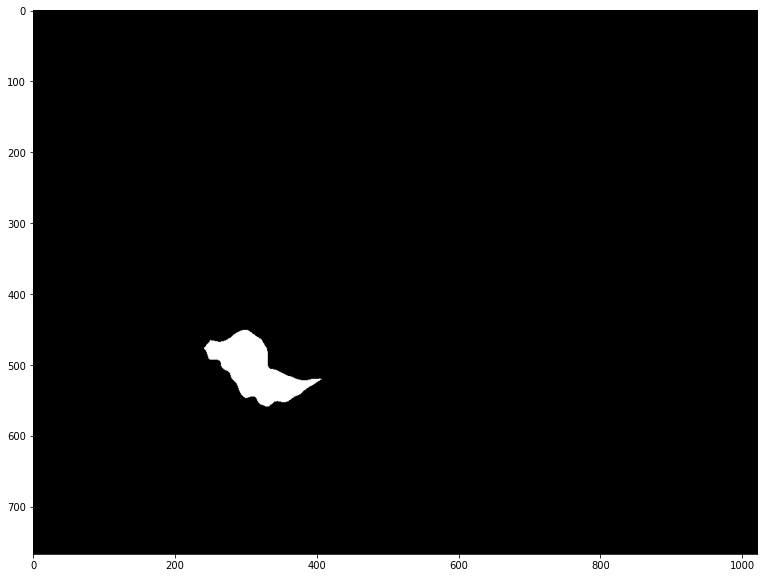

Mostrando a label  65
A area desse label é  7052


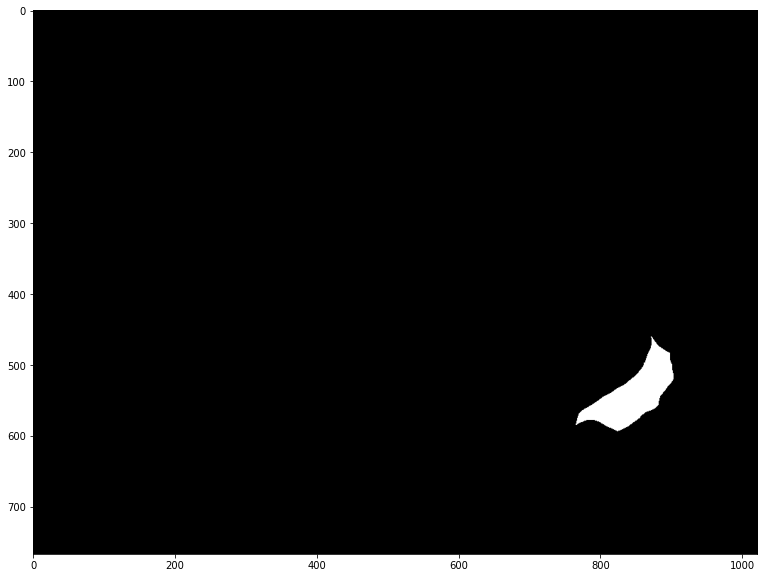

Mostrando a label  66
A area desse label é  8391


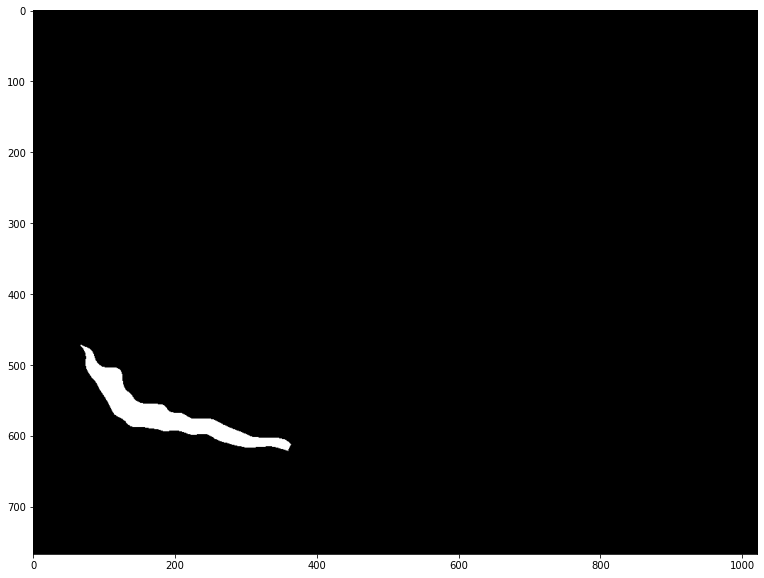

Mostrando a label  67
A area desse label é  8446


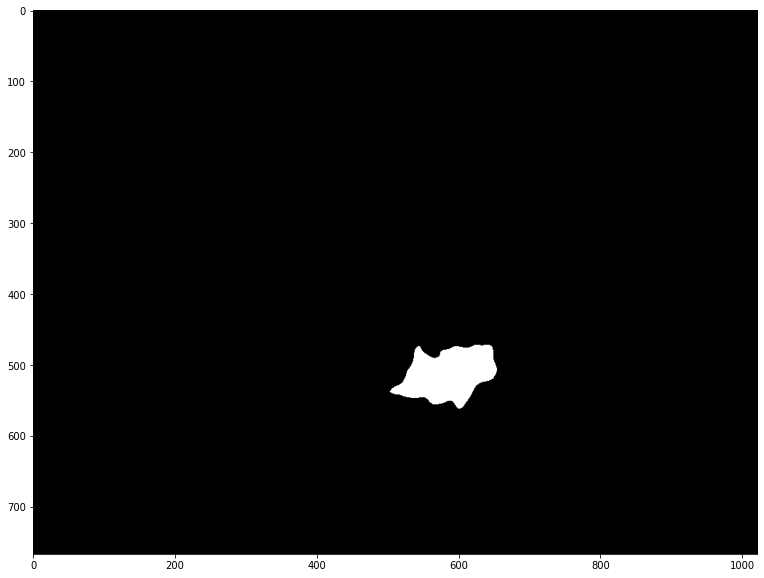

Mostrando a label  68
A area desse label é  8905


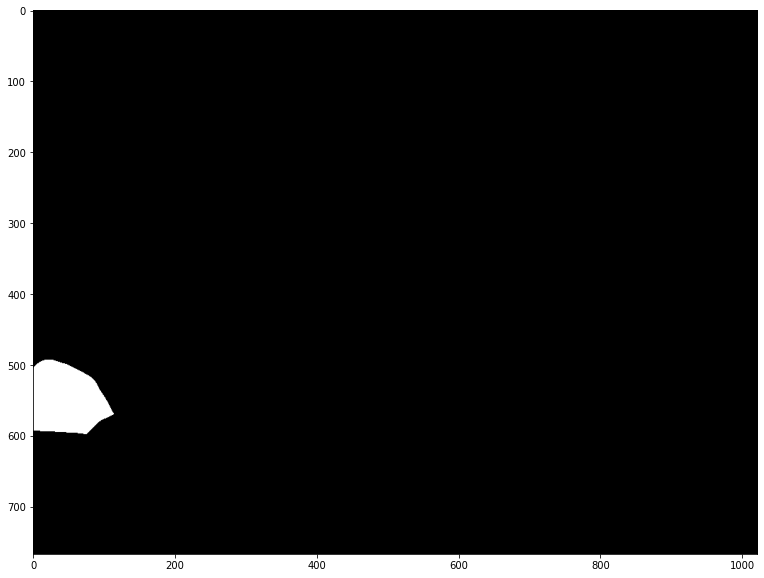

Mostrando a label  69
A area desse label é  11447


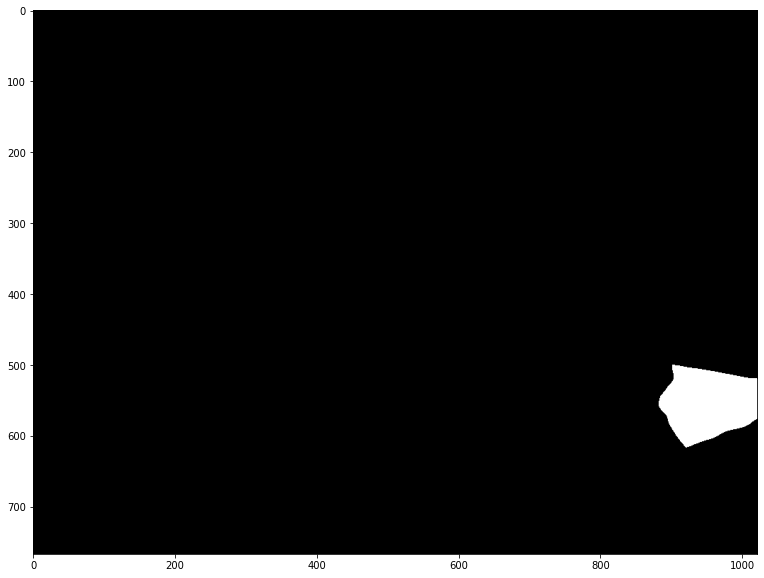

Mostrando a label  70
A area desse label é  8394


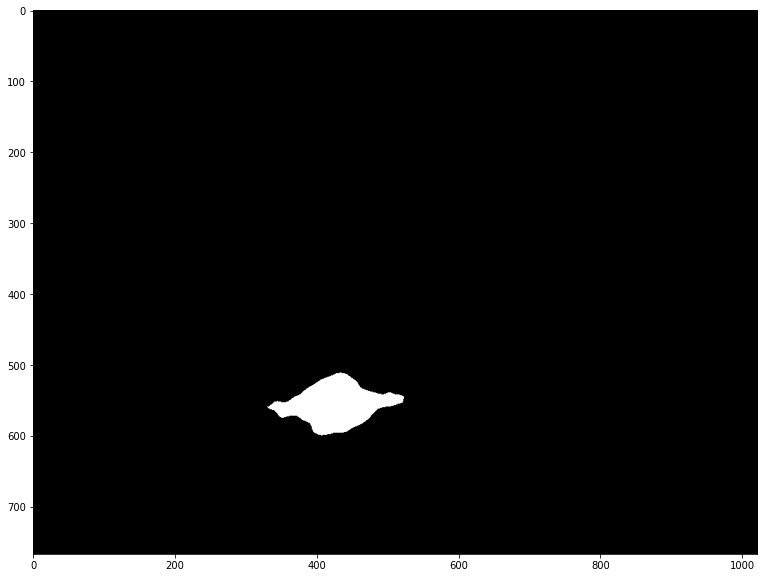

Mostrando a label  71
A area desse label é  4689


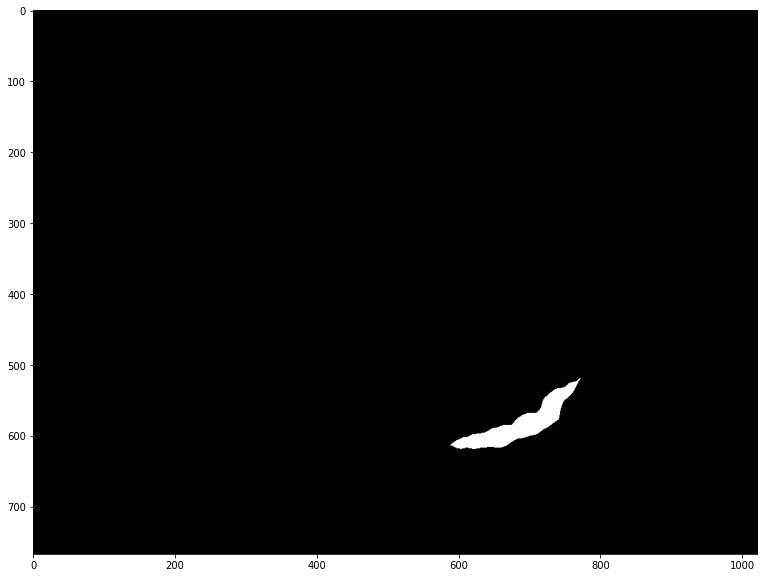

Mostrando a label  72
A area desse label é  8543


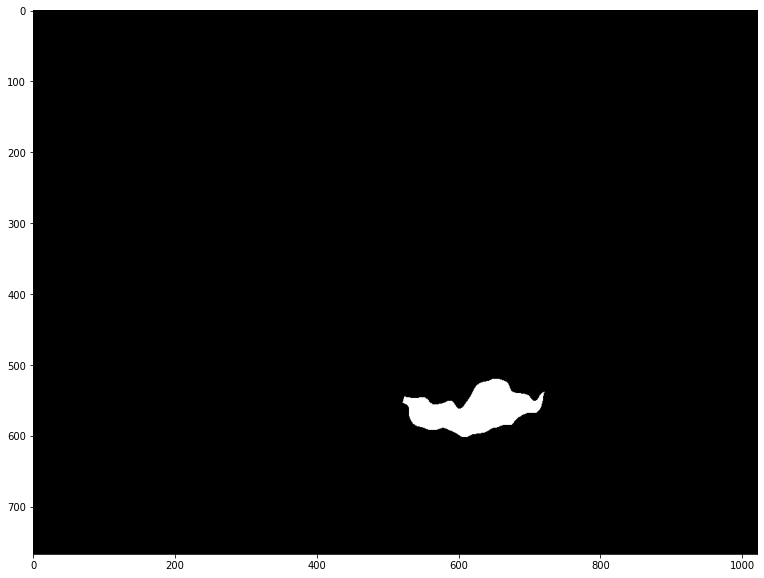

Mostrando a label  73
A area desse label é  4441


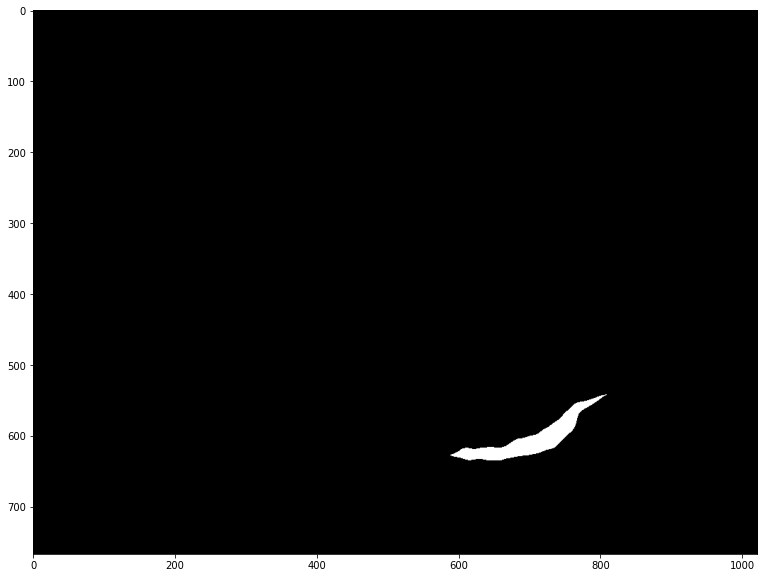

Mostrando a label  74
A area desse label é  5982


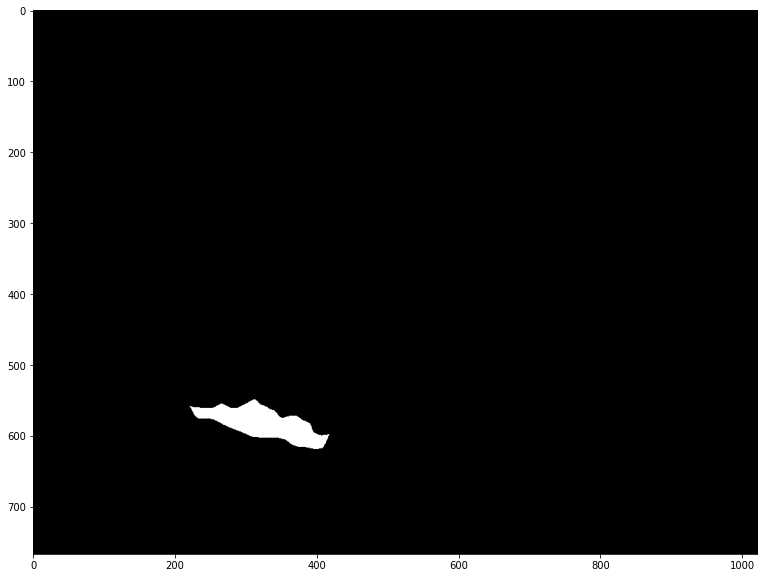

Mostrando a label  75
A area desse label é  6378


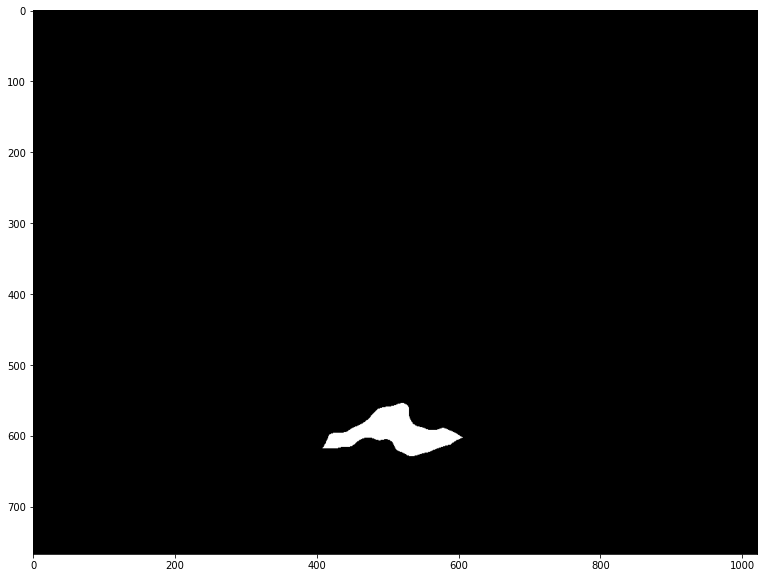

Mostrando a label  76
A area desse label é  8920


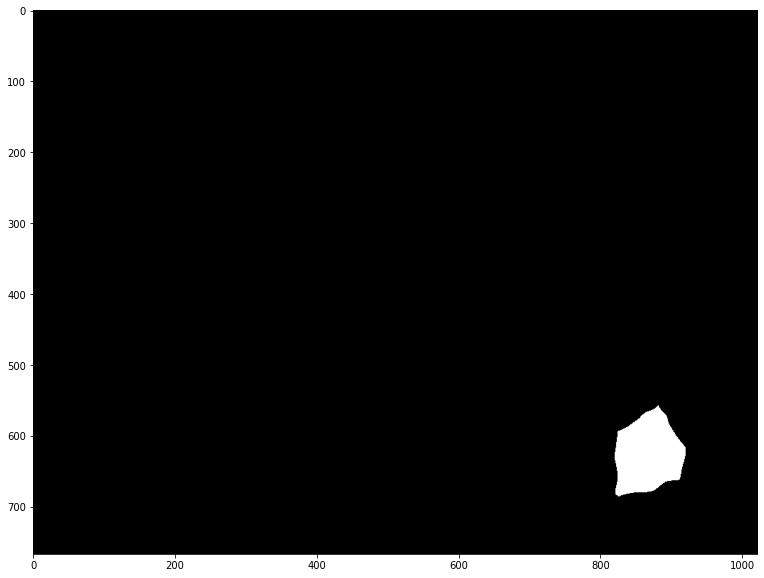

Mostrando a label  77
A area desse label é  7250


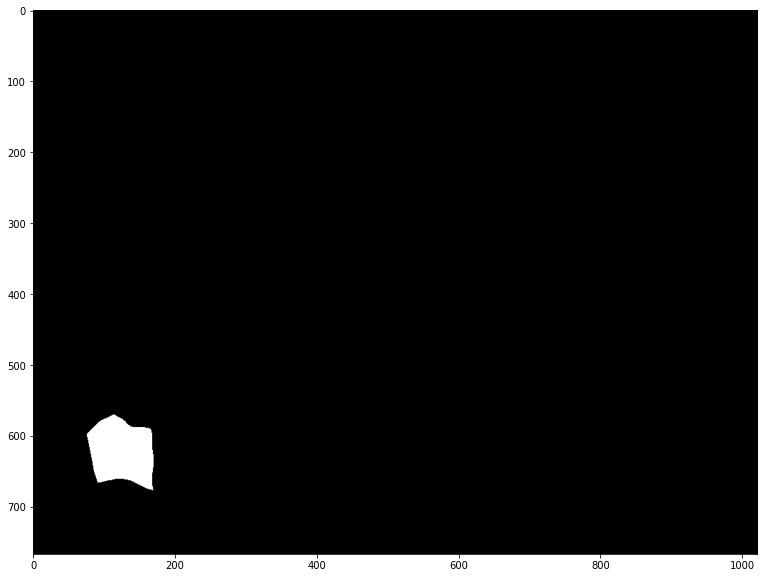

Mostrando a label  78
A area desse label é  9124


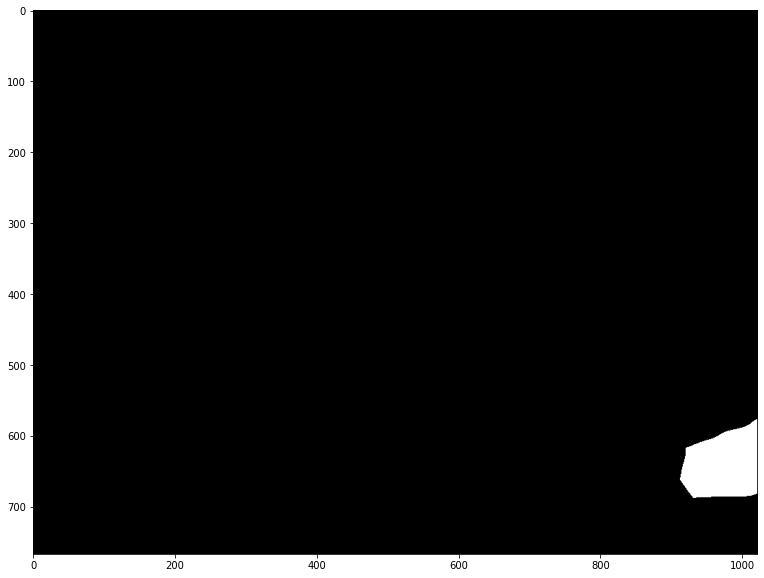

Mostrando a label  79
A area desse label é  8282


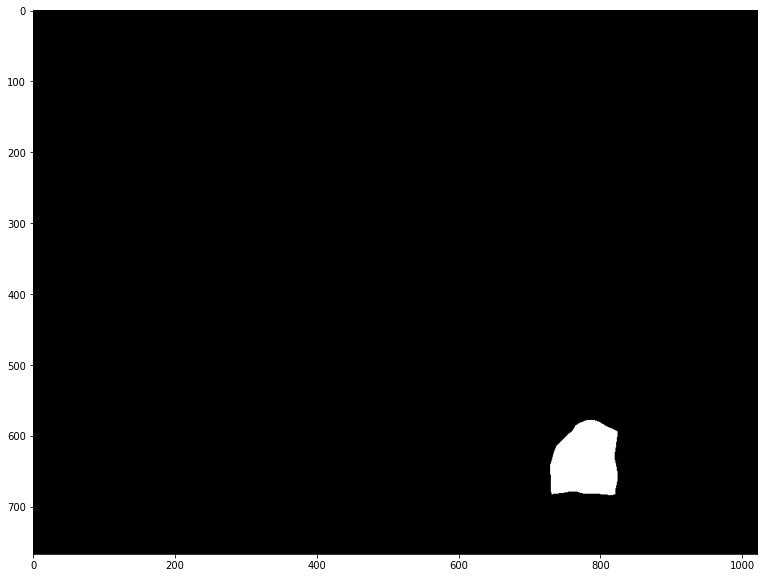

Mostrando a label  80
A area desse label é  7712


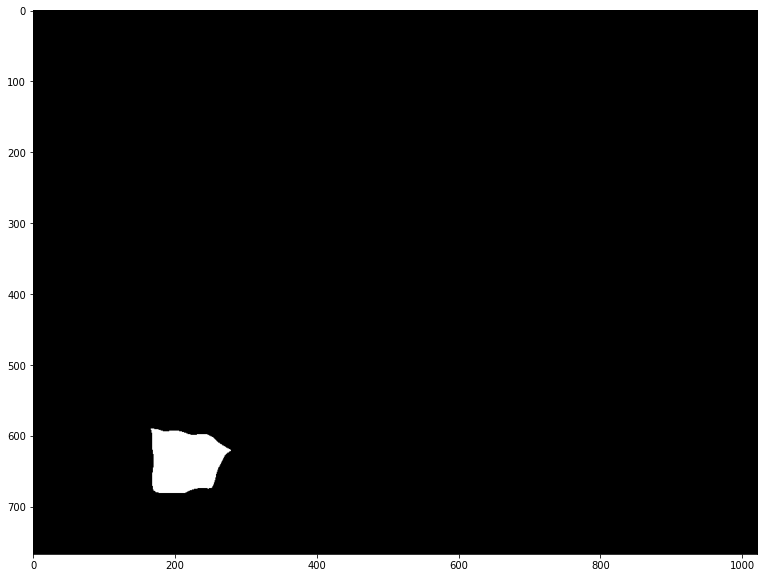

Mostrando a label  81
A area desse label é  7338


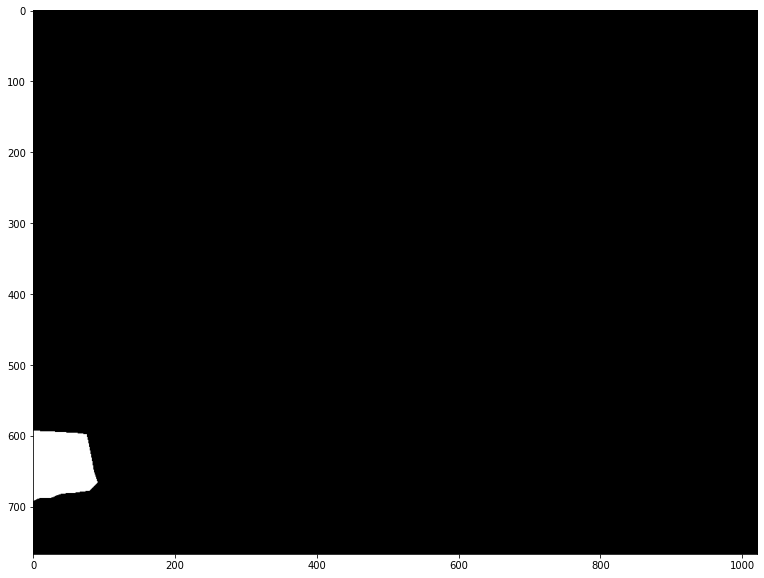

Mostrando a label  82
A area desse label é  5275


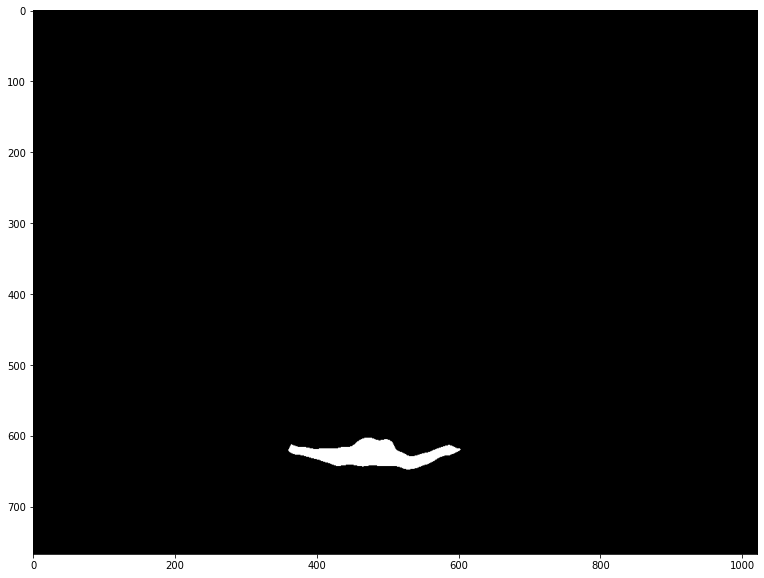

Mostrando a label  83
A area desse label é  4320


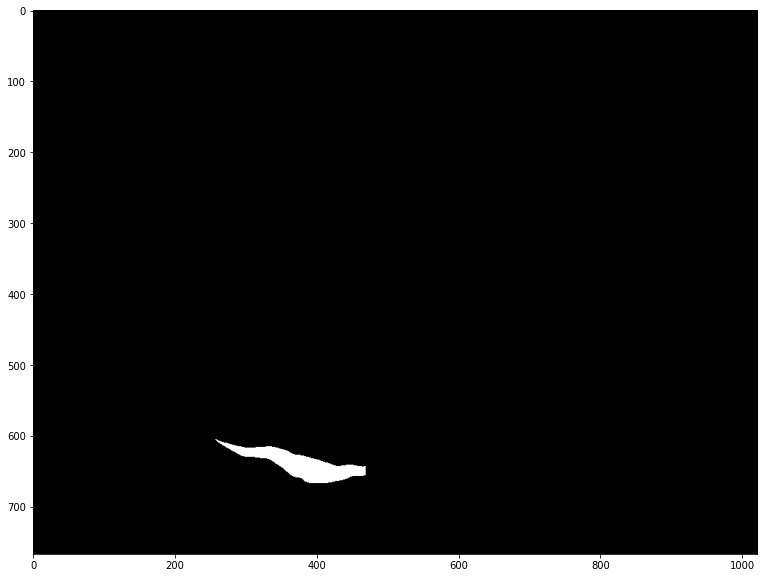

Mostrando a label  84
A area desse label é  6416


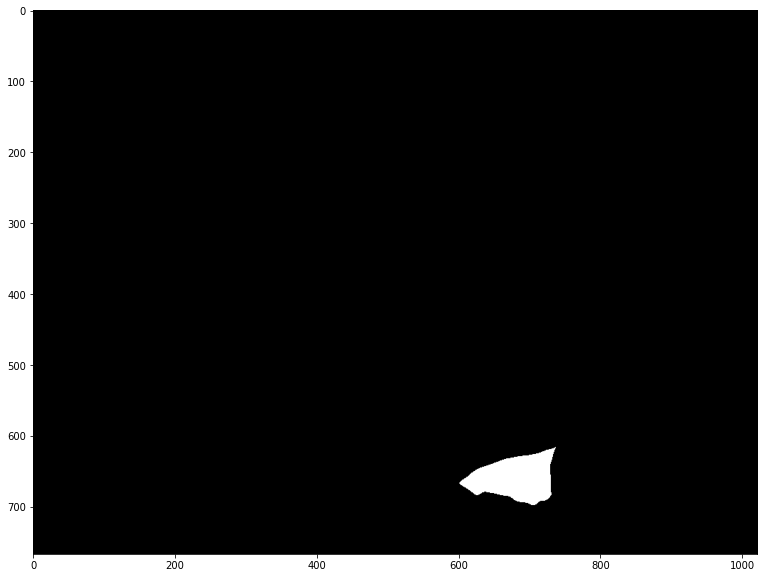

Mostrando a label  85
A area desse label é  6644


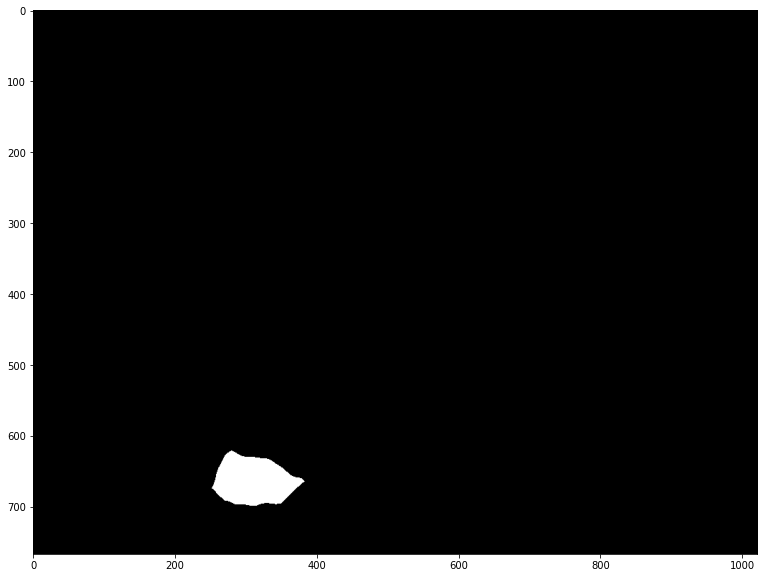

Mostrando a label  86
A area desse label é  4625


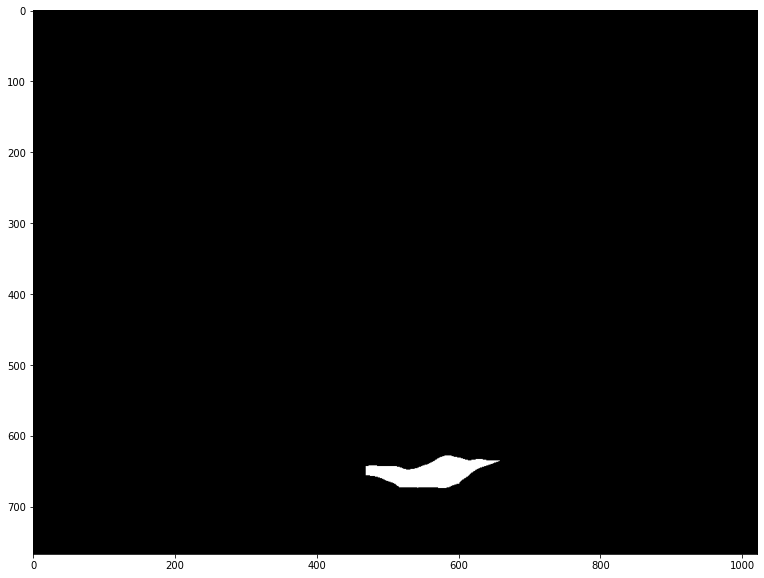

Mostrando a label  87
A area desse label é  9219


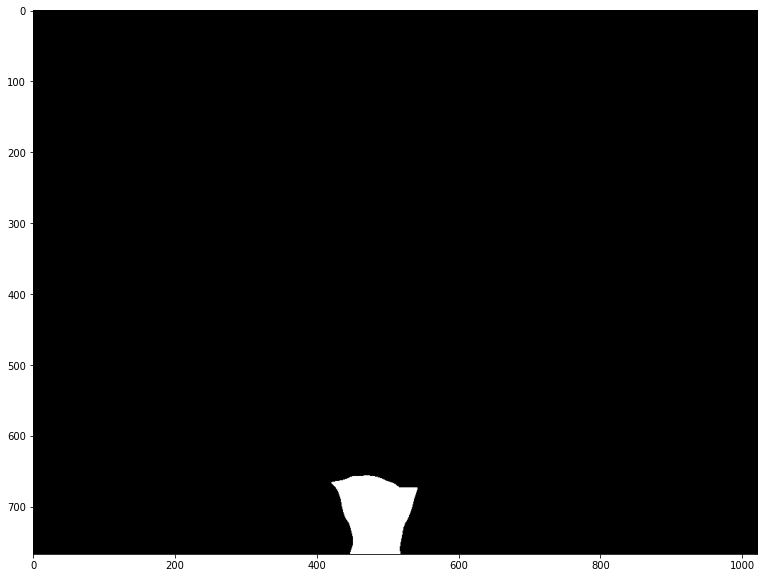

Mostrando a label  88
A area desse label é  9156


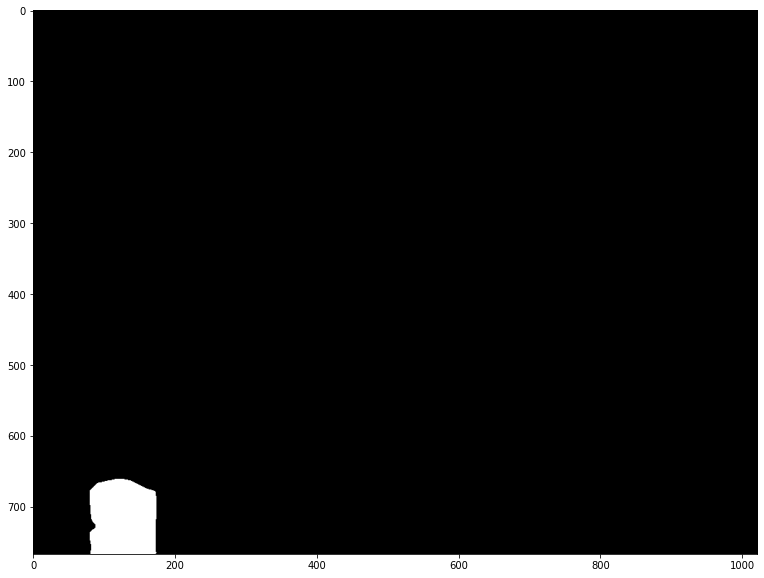

Mostrando a label  89
A area desse label é  9403


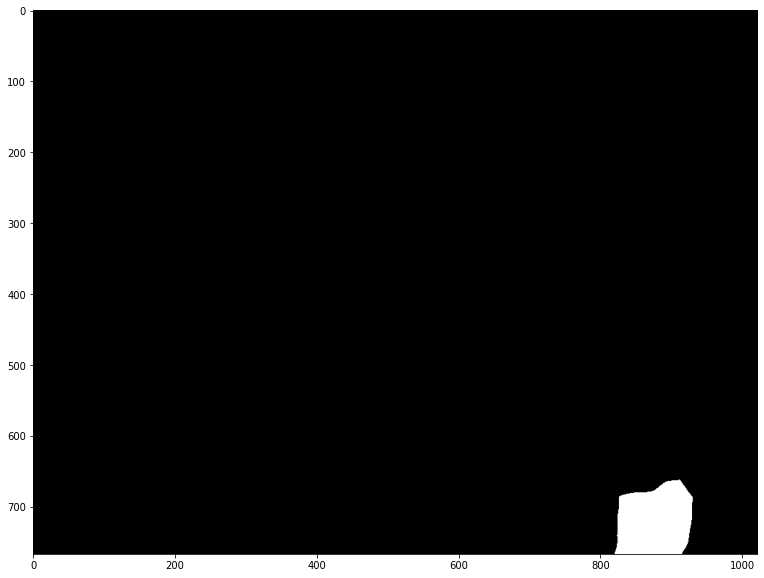

Mostrando a label  90
A area desse label é  8132


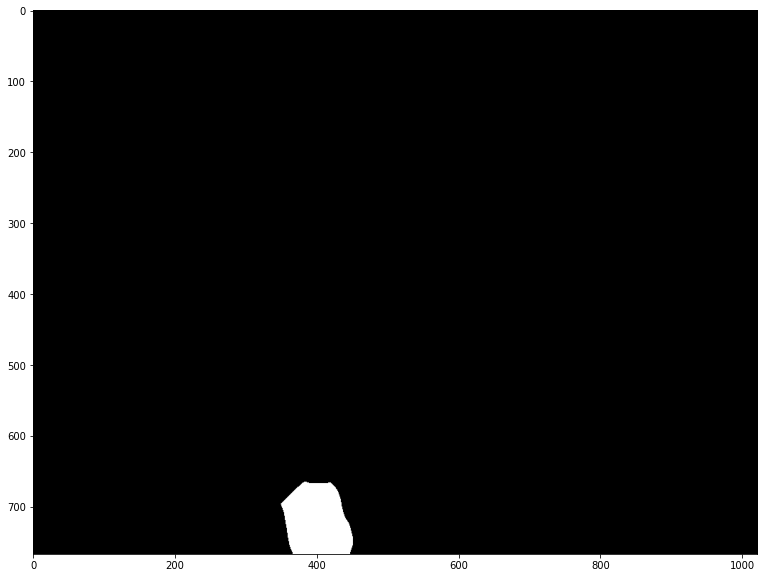

Mostrando a label  91
A area desse label é  8741


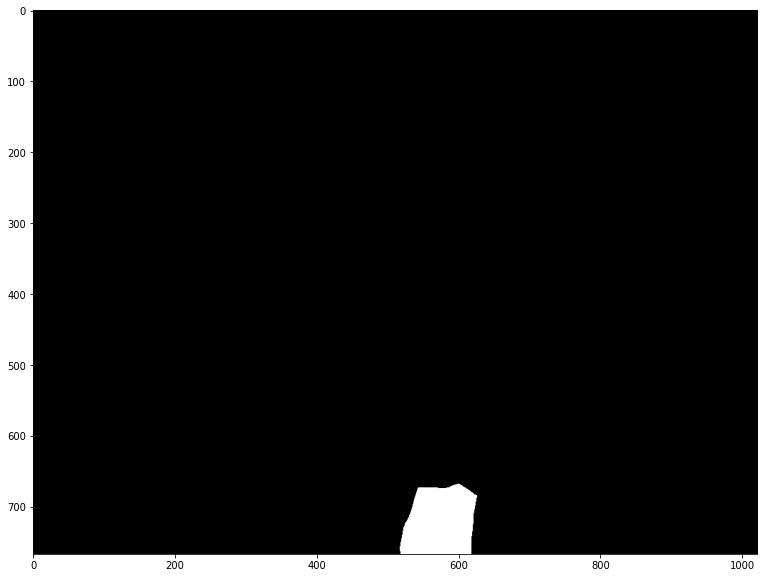

Mostrando a label  92
A area desse label é  8190


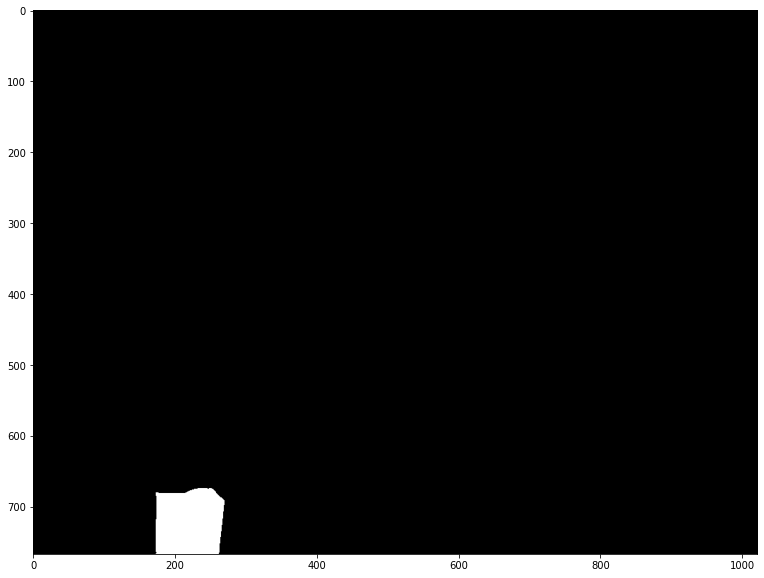

Mostrando a label  93
A area desse label é  6809


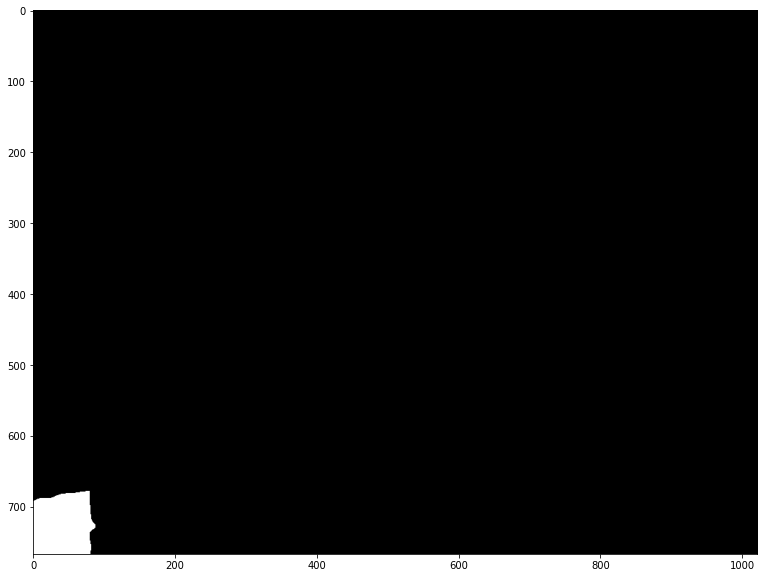

Mostrando a label  94
A area desse label é  7822


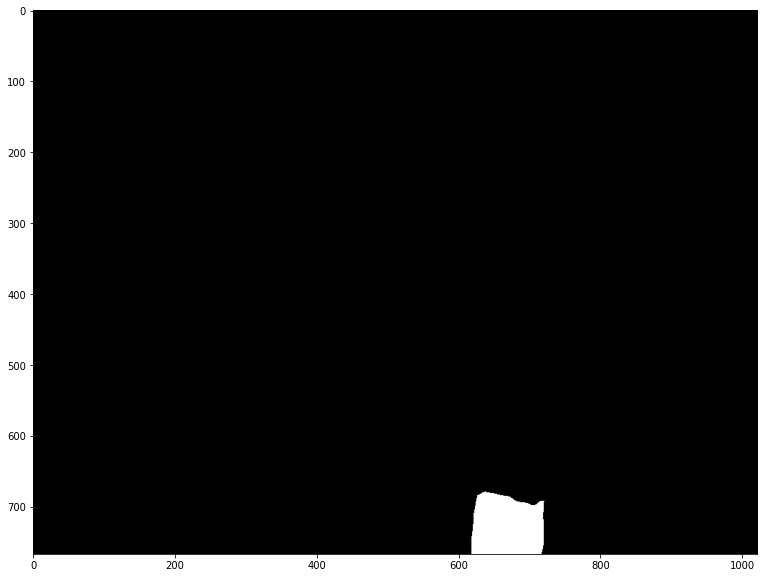

Mostrando a label  95
A area desse label é  8836


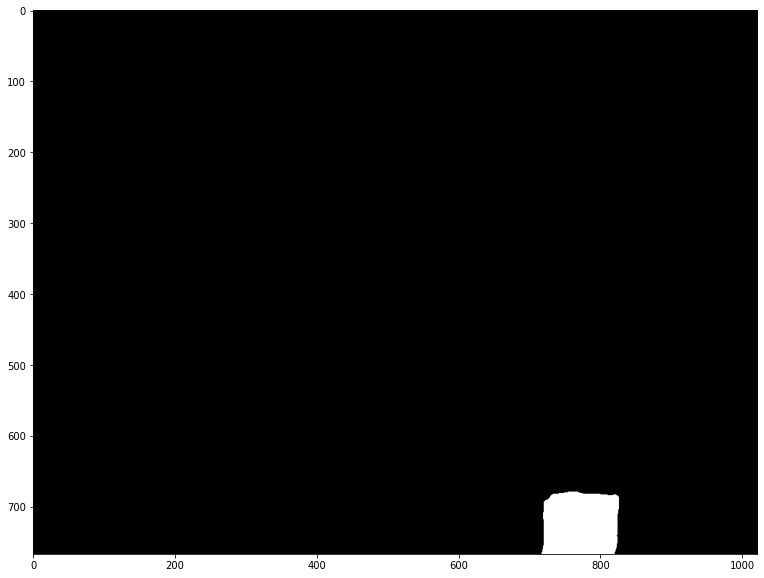

Mostrando a label  96
A area desse label é  7785


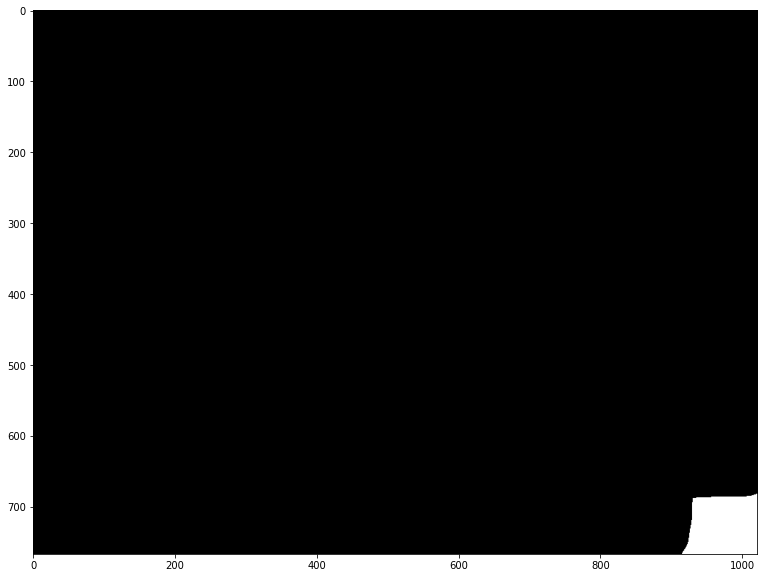

Mostrando a label  97
A area desse label é  6488


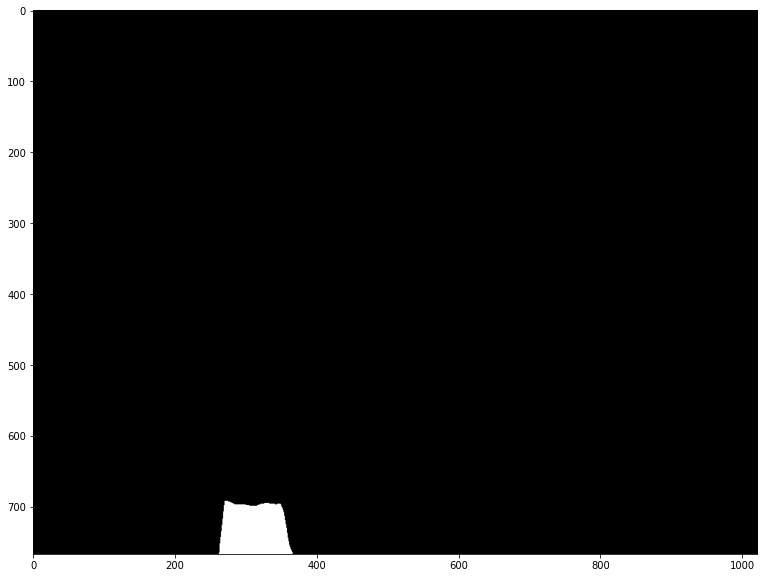

In [7]:
#printando todos os labels binarizados da imagem1
for i in range(0, len(slic_labels_list1)):
  print("Mostrando a label ", +i)
  print("A area desse label é ", +cv2.countNonZero(slic_labels_list1[i]))
  plt.imshow(np.asarray(slic_labels_list1[i]).squeeze(), cmap='gray')
  plt.show()

Mostrando a label  0
A area desse label é  46048


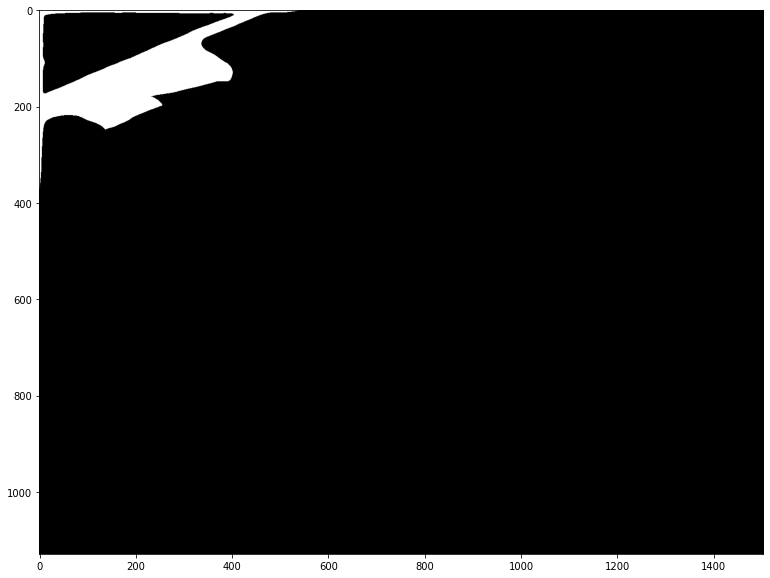

Mostrando a label  1
A area desse label é  19522


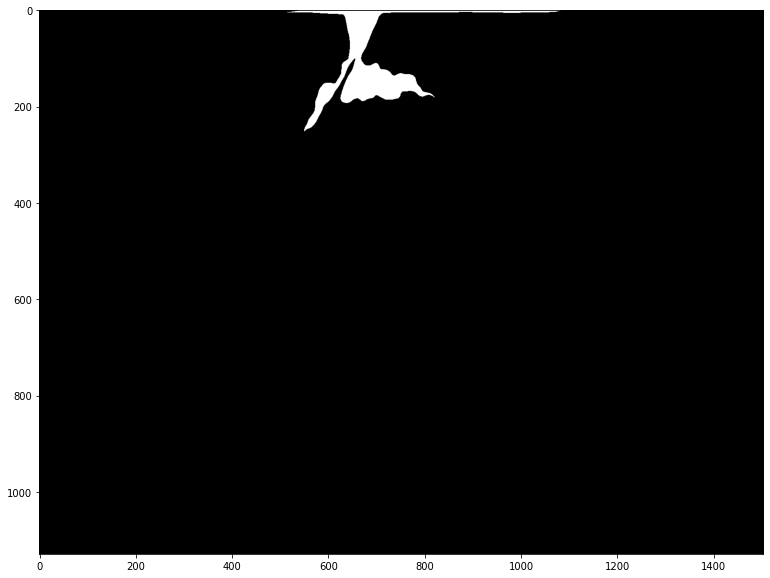

Mostrando a label  2
A area desse label é  37670


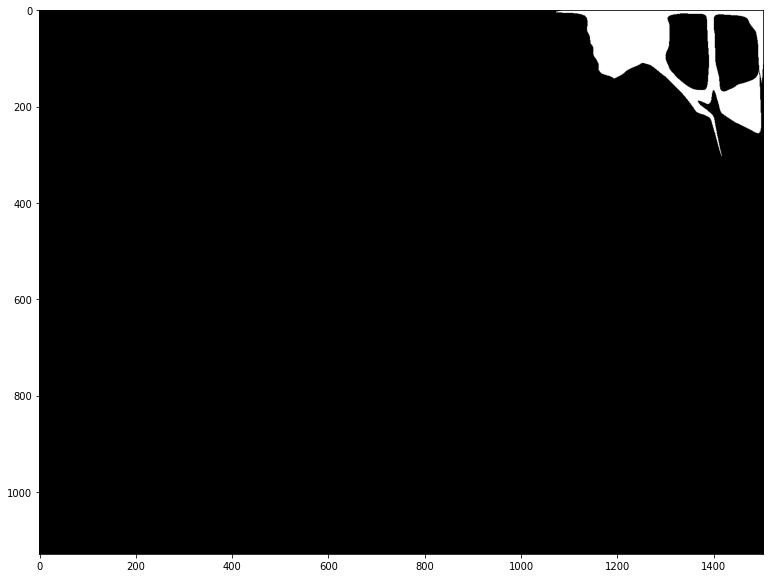

Mostrando a label  3
A area desse label é  21251


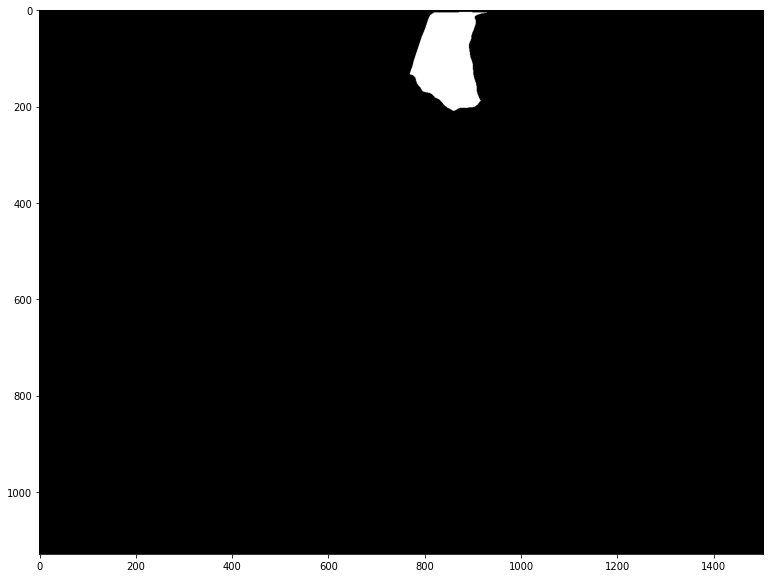

Mostrando a label  4
A area desse label é  18222


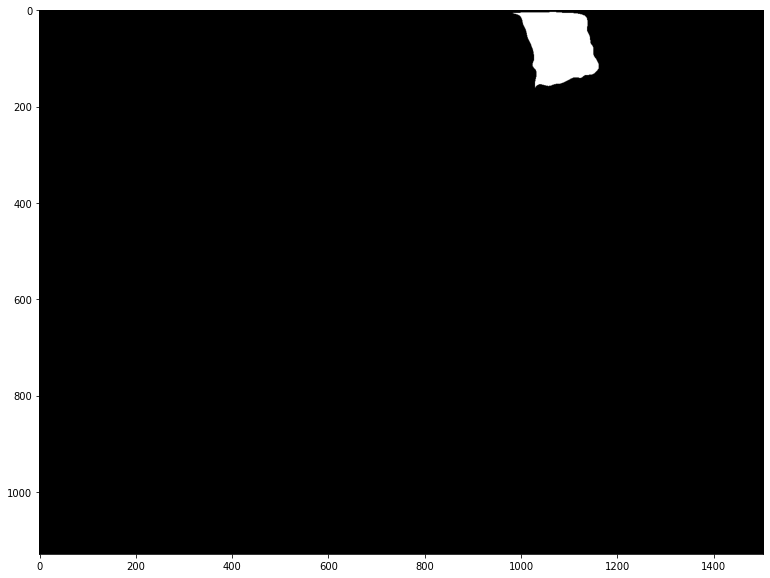

Mostrando a label  5
A area desse label é  15625


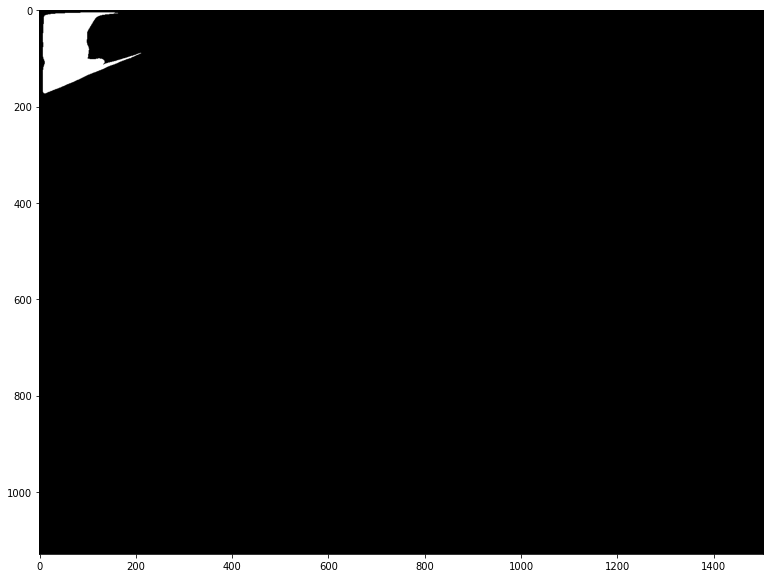

Mostrando a label  6
A area desse label é  18155


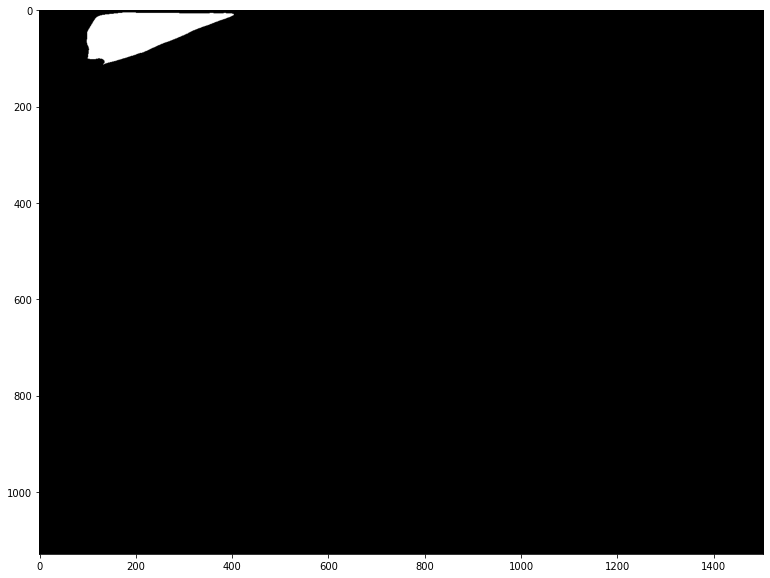

Mostrando a label  7
A area desse label é  16048


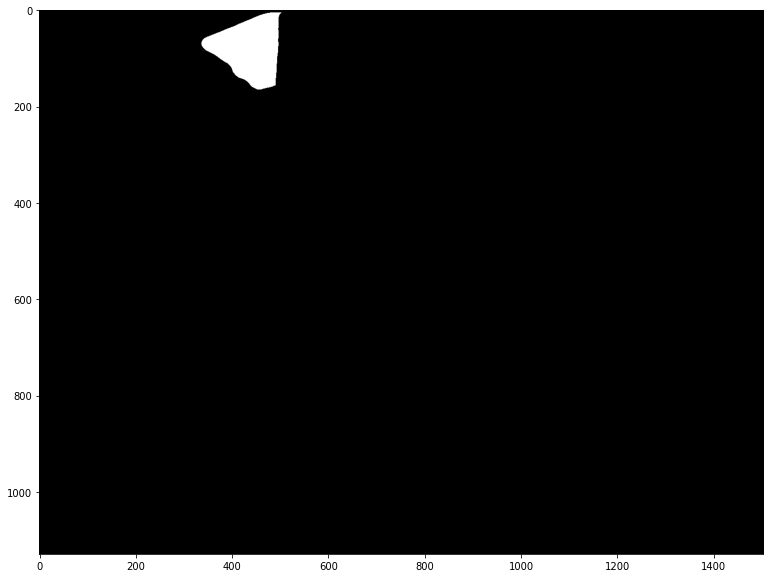

Mostrando a label  8
A area desse label é  21611


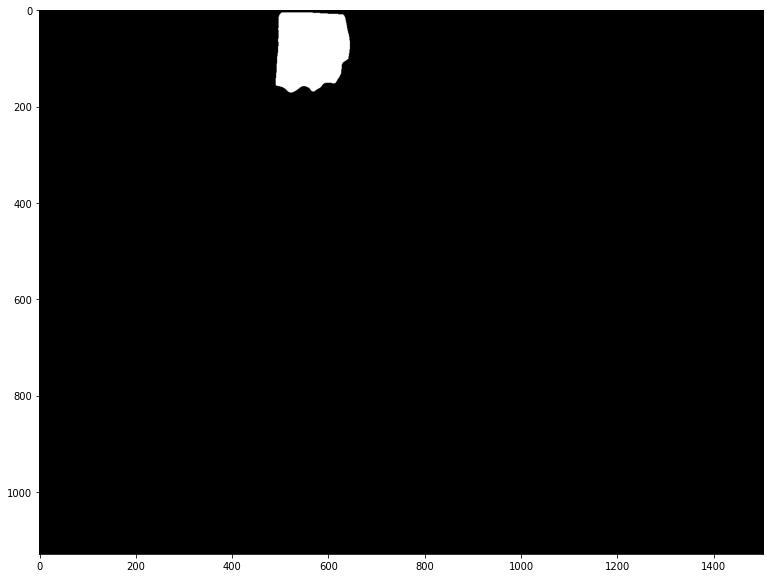

Mostrando a label  9
A area desse label é  12681


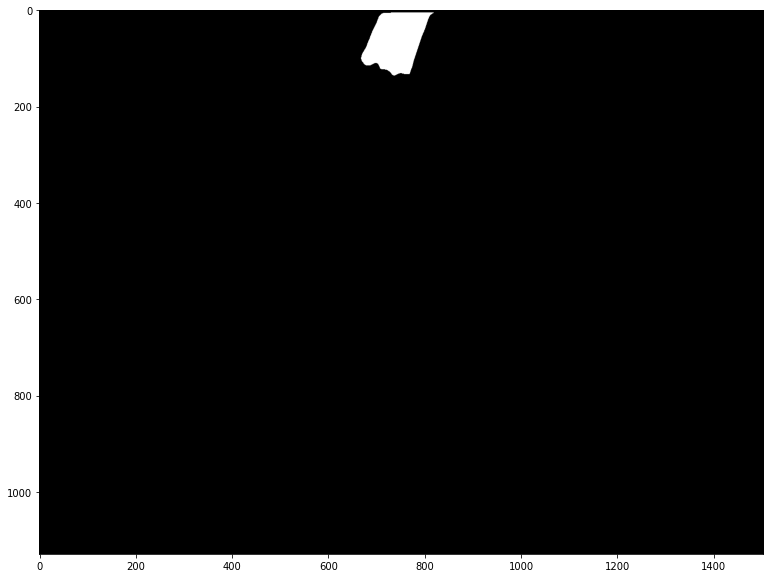

Mostrando a label  10
A area desse label é  21092


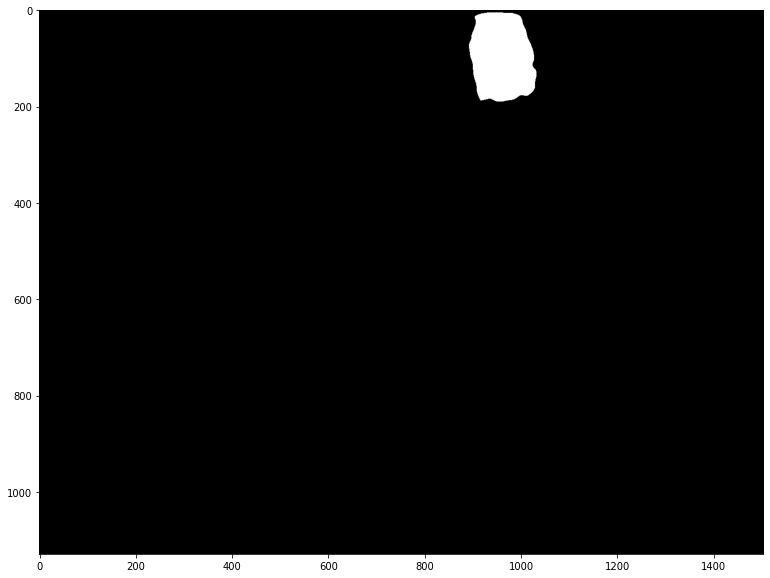

Mostrando a label  11
A area desse label é  11874


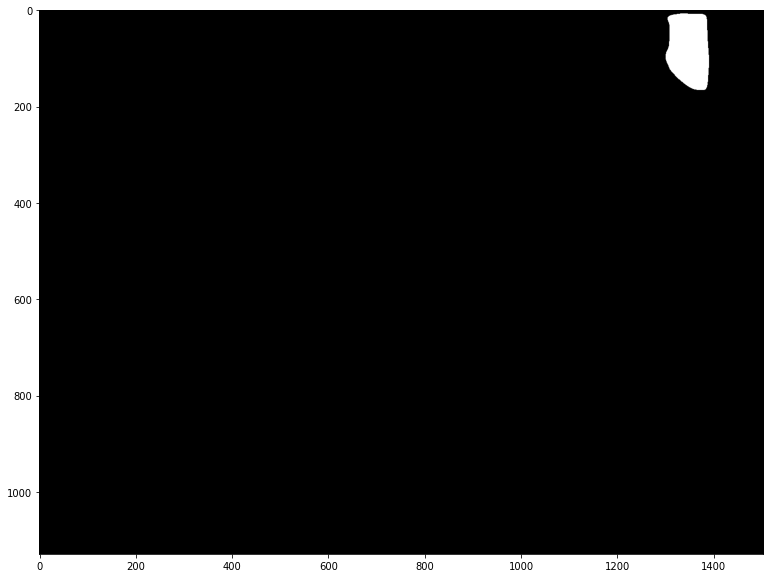

Mostrando a label  12
A area desse label é  12142


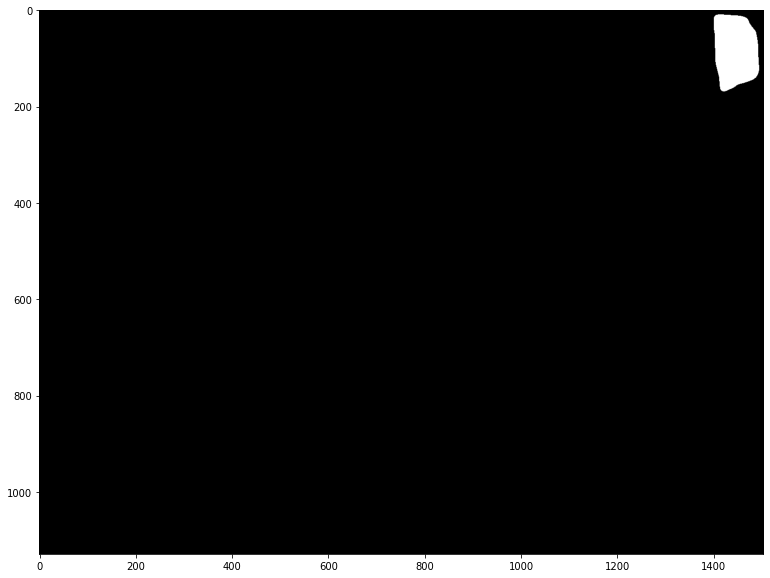

Mostrando a label  13
A area desse label é  12876


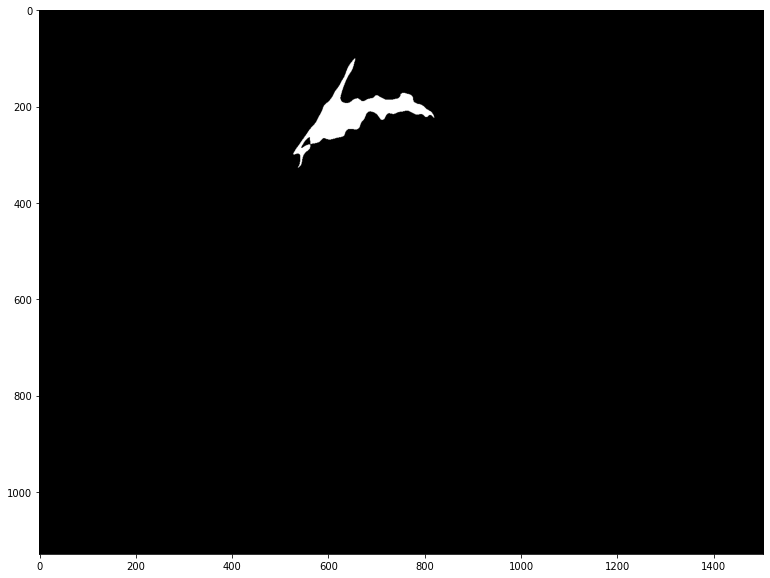

Mostrando a label  14
A area desse label é  17410


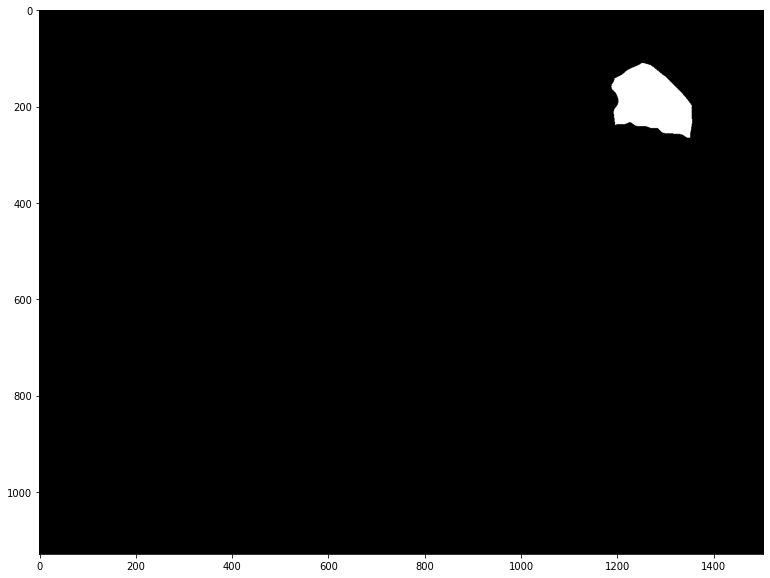

Mostrando a label  15
A area desse label é  19488


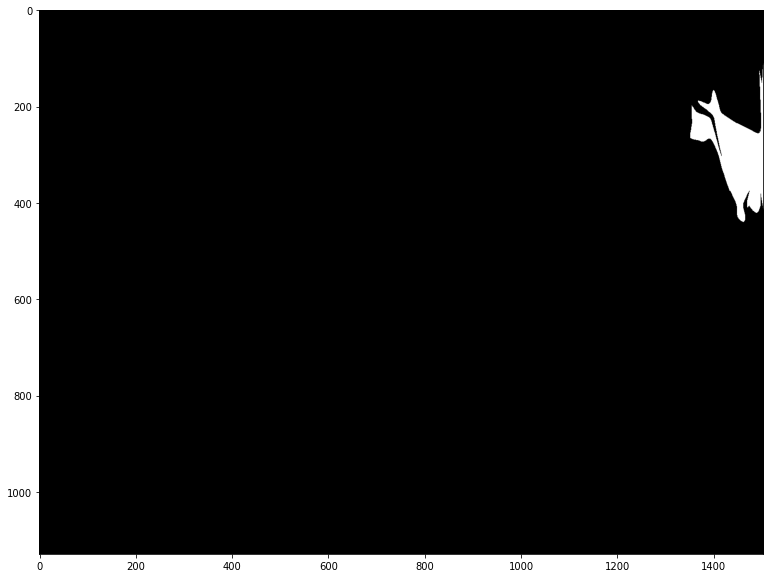

Mostrando a label  16
A area desse label é  18313


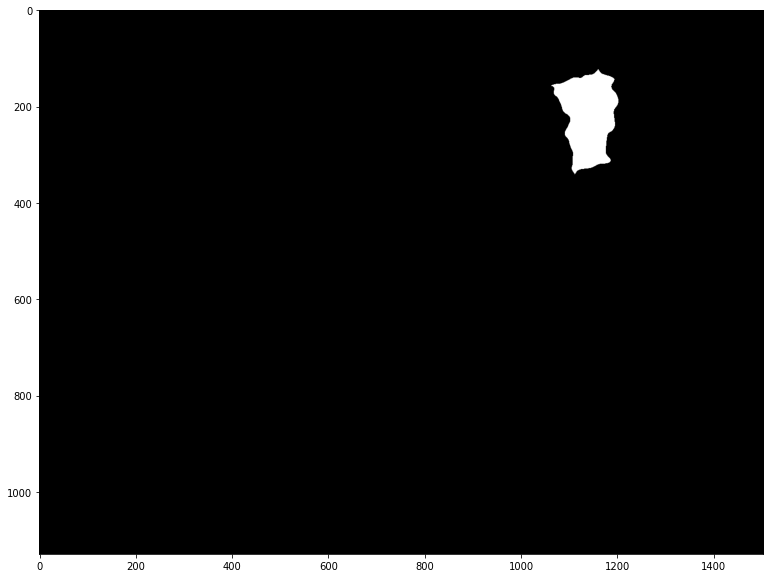

Mostrando a label  17
A area desse label é  21837


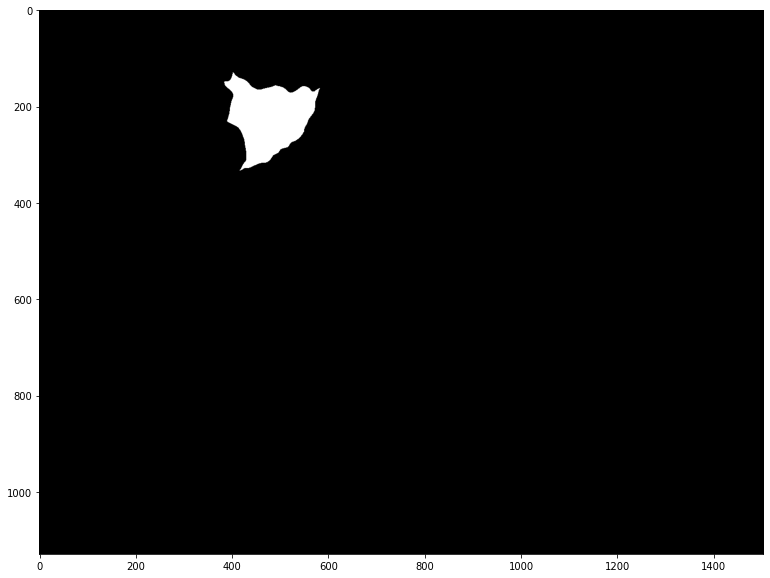

Mostrando a label  18
A area desse label é  9140


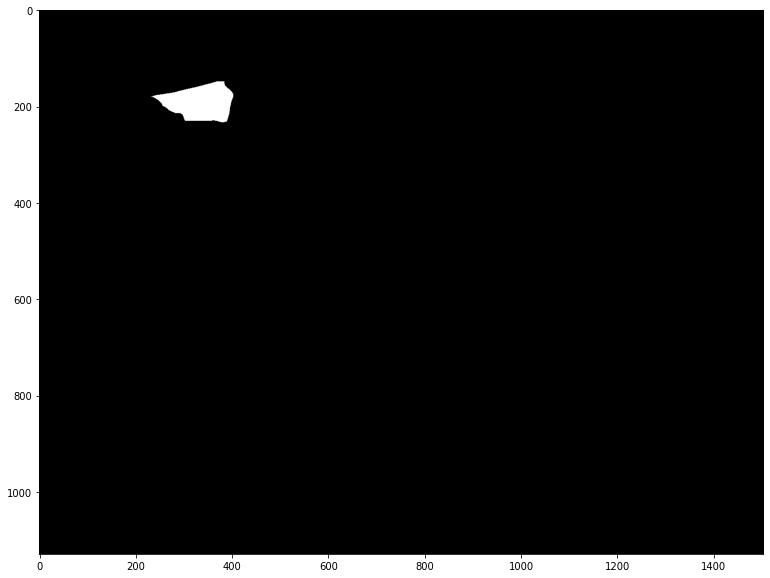

Mostrando a label  19
A area desse label é  11283


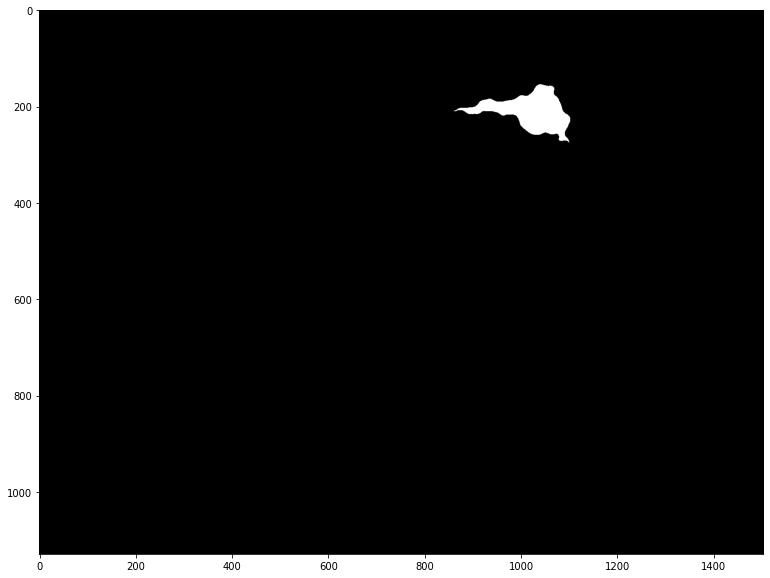

Mostrando a label  20
A area desse label é  8594


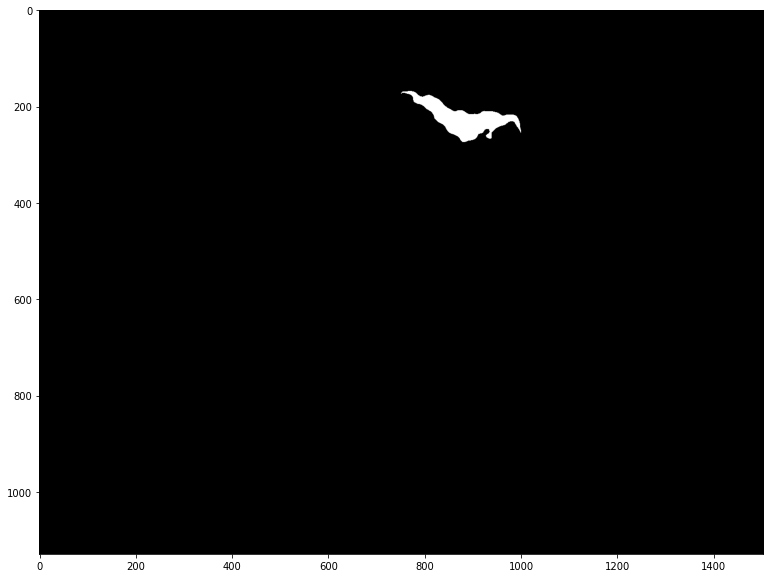

Mostrando a label  21
A area desse label é  21611


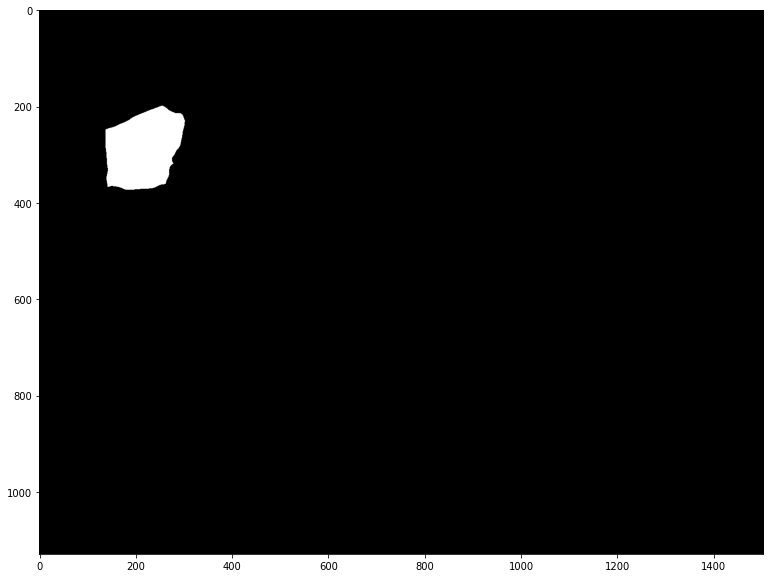

Mostrando a label  22
A area desse label é  11010


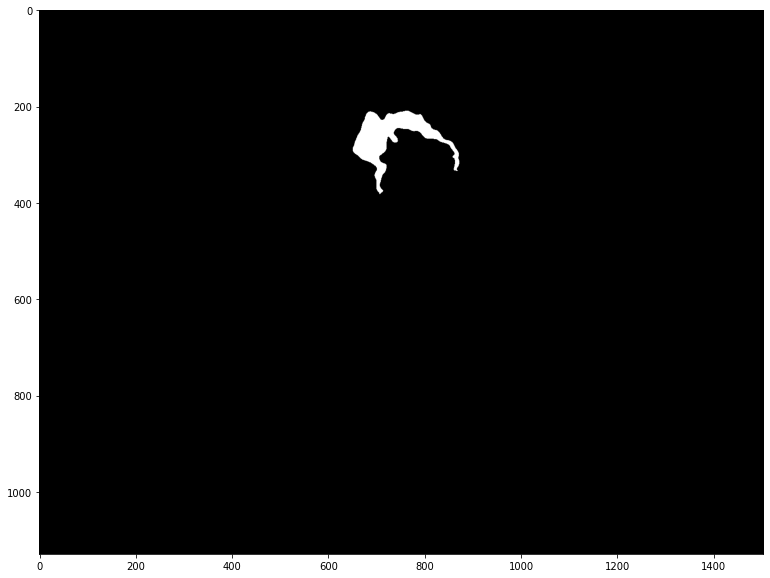

Mostrando a label  23
A area desse label é  12949


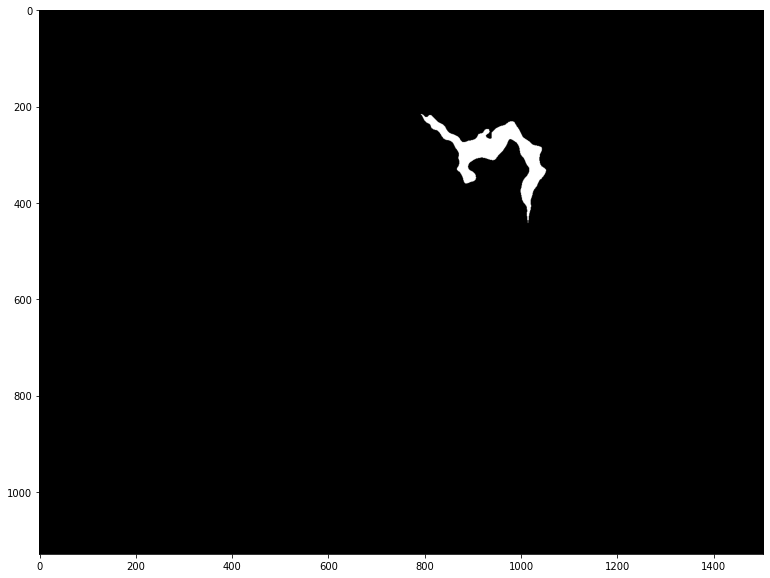

Mostrando a label  24
A area desse label é  20911


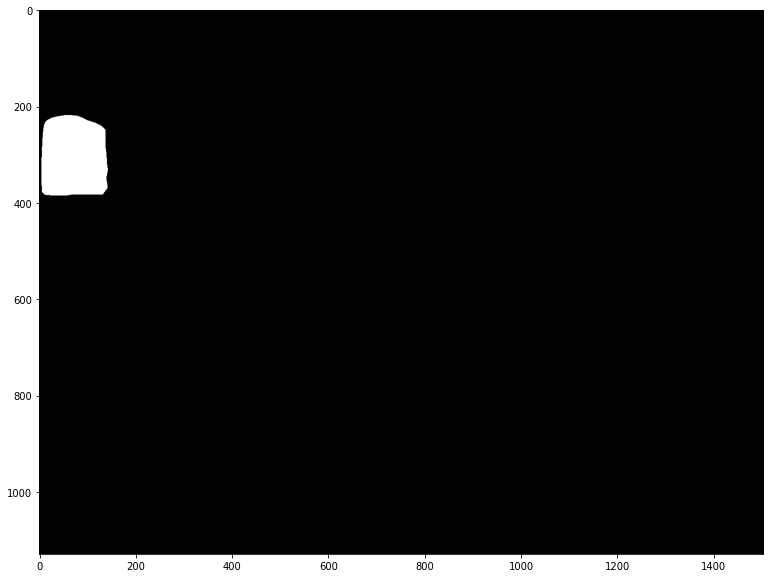

Mostrando a label  25
A area desse label é  23184


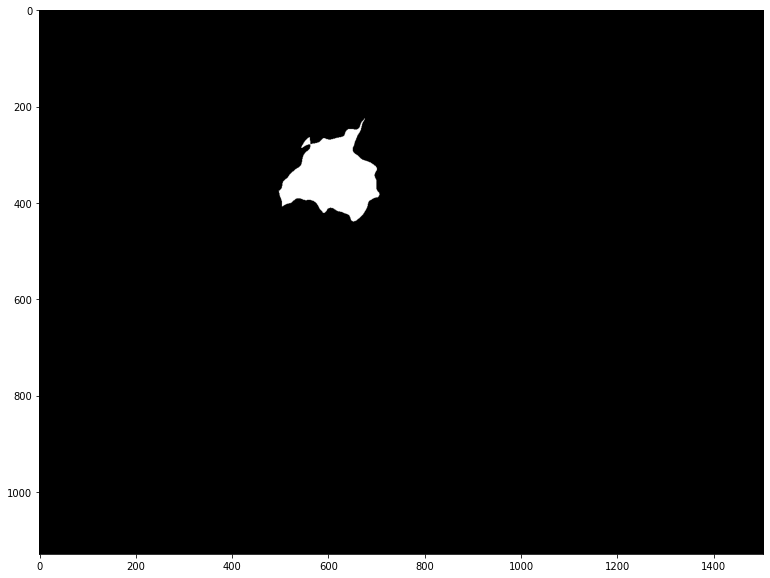

Mostrando a label  26
A area desse label é  21136


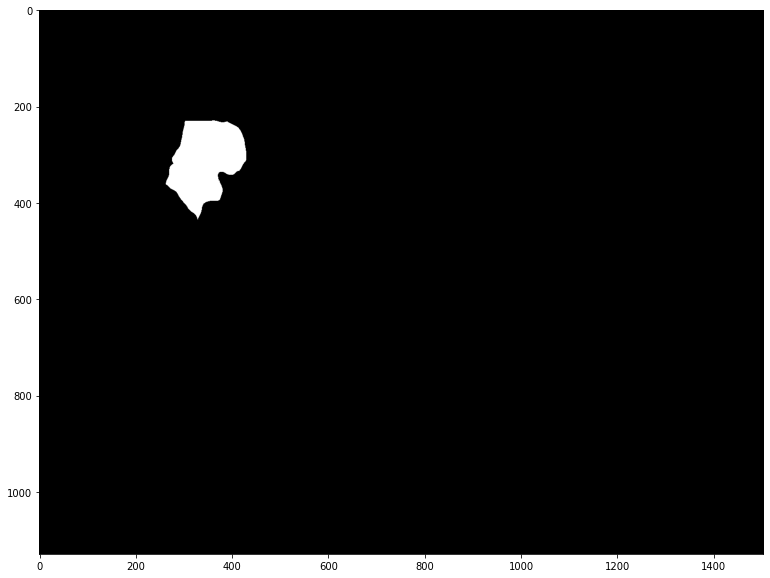

Mostrando a label  27
A area desse label é  18491


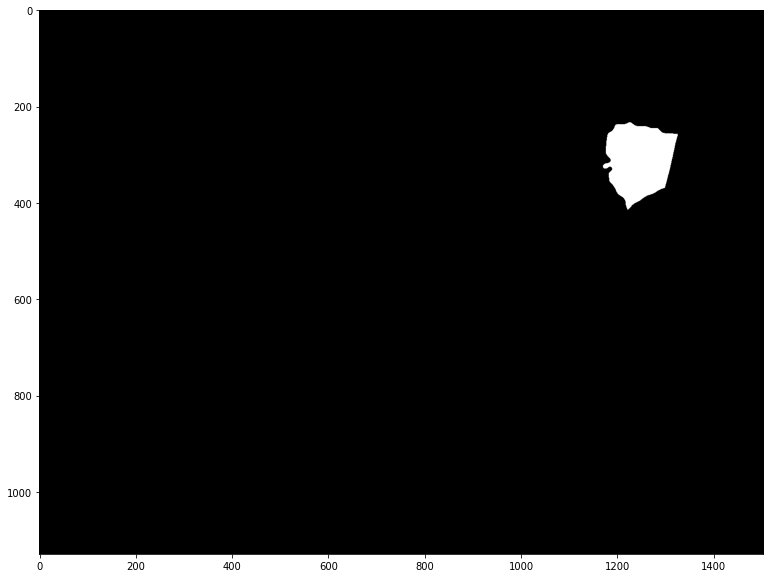

Mostrando a label  28
A area desse label é  11144


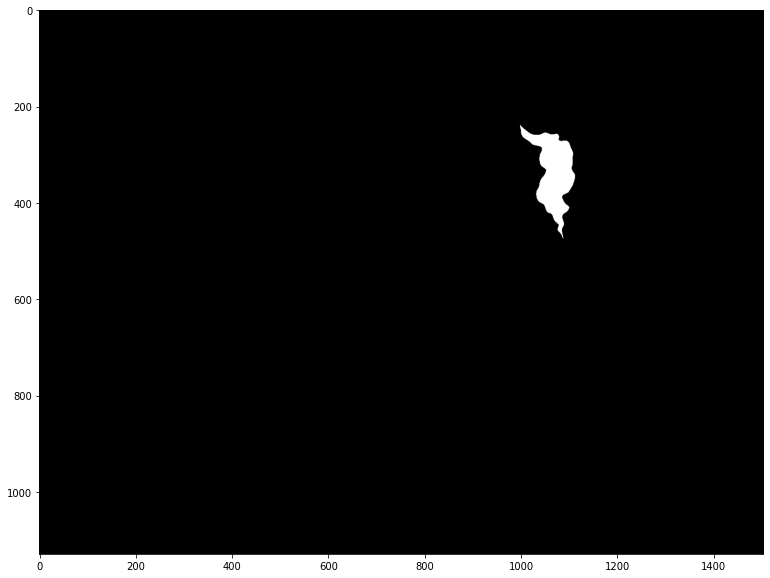

Mostrando a label  29
A area desse label é  14178


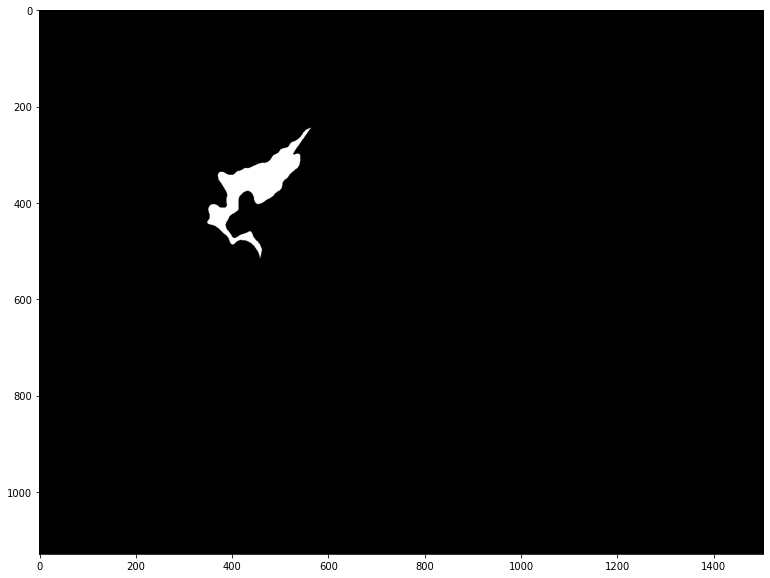

Mostrando a label  30
A area desse label é  17214


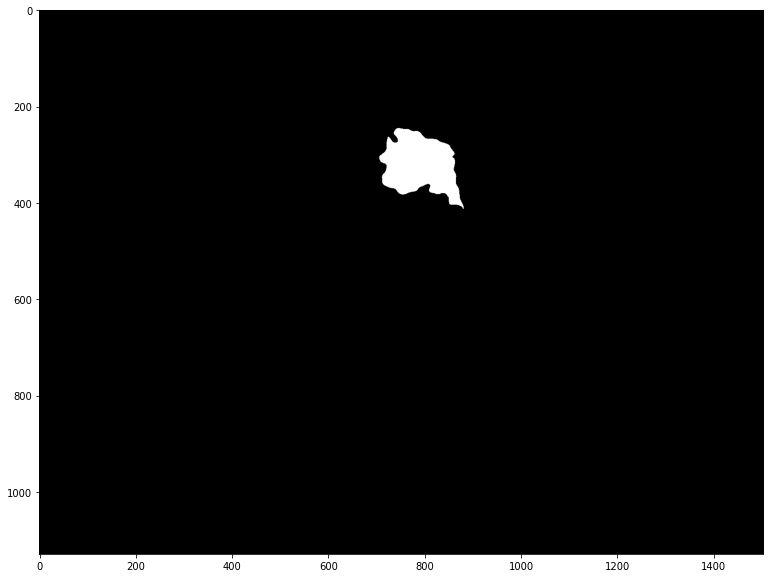

Mostrando a label  31
A area desse label é  15602


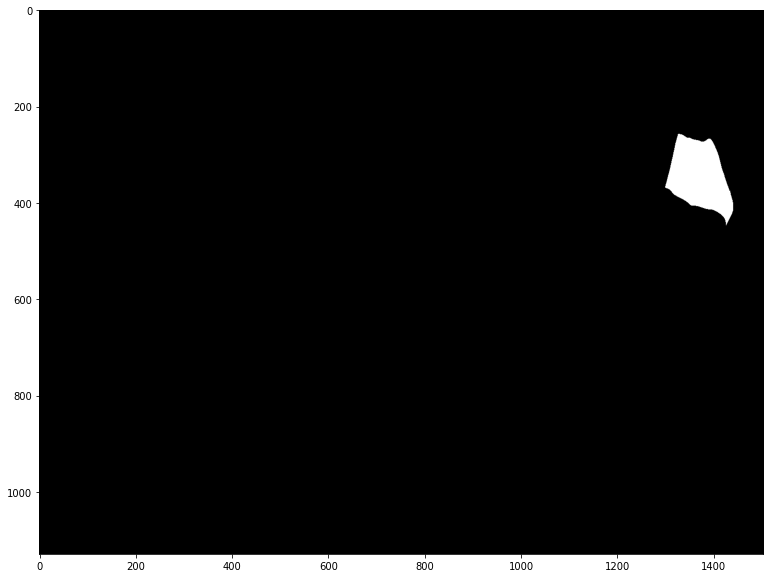

Mostrando a label  32
A area desse label é  21308


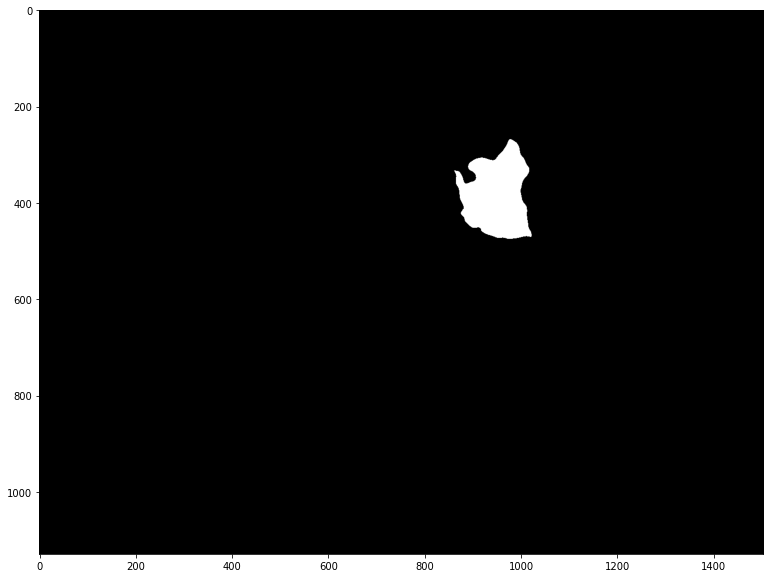

Mostrando a label  33
A area desse label é  16605


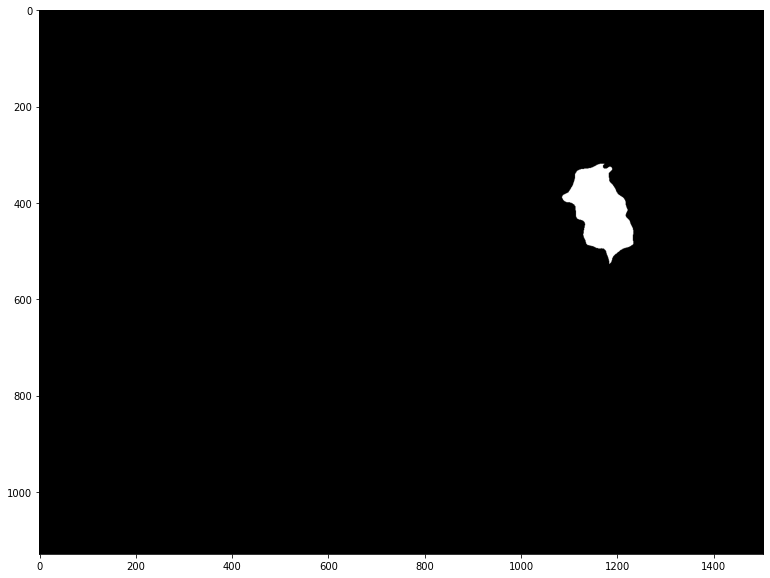

Mostrando a label  34
A area desse label é  12071


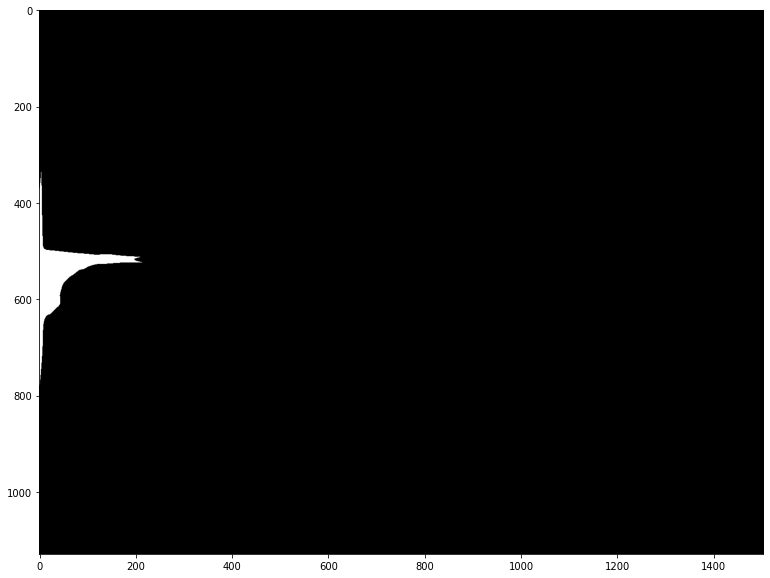

Mostrando a label  35
A area desse label é  16699


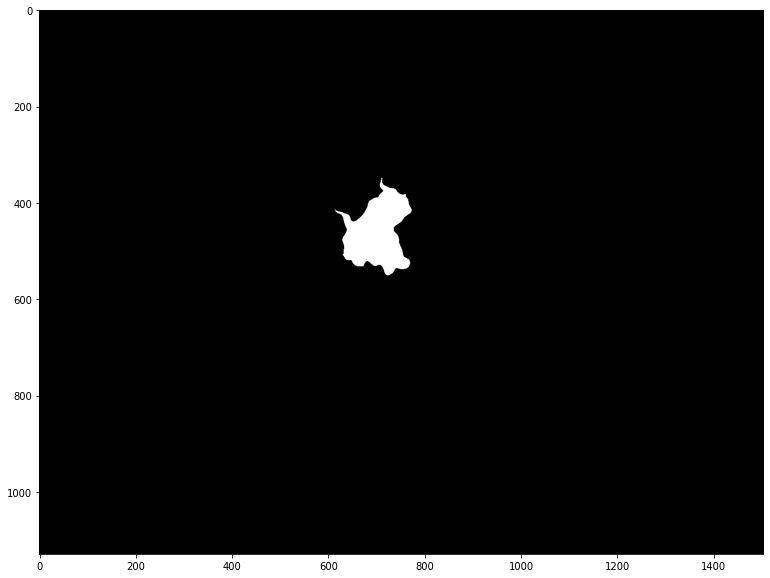

Mostrando a label  36
A area desse label é  10370


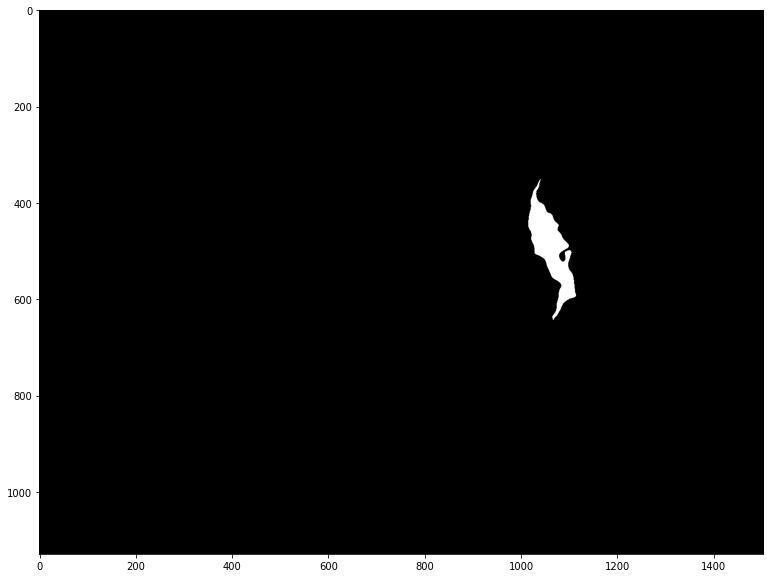

Mostrando a label  37
A area desse label é  15686


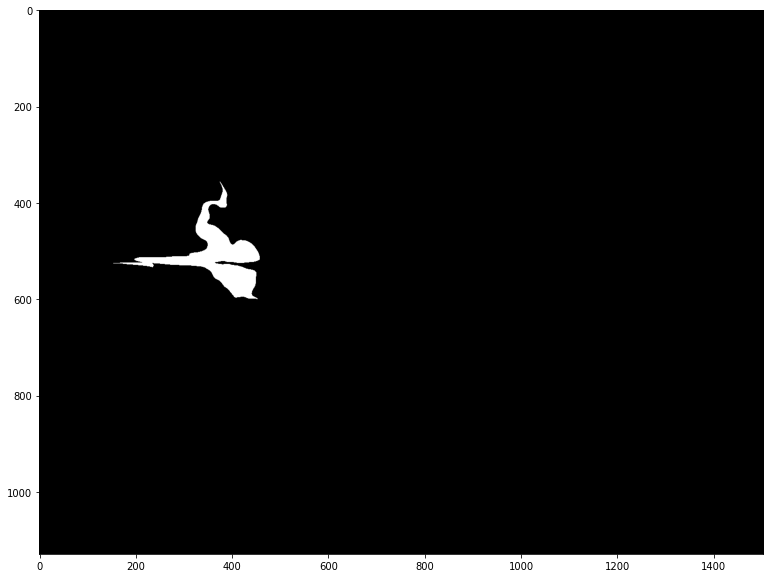

Mostrando a label  38
A area desse label é  24771


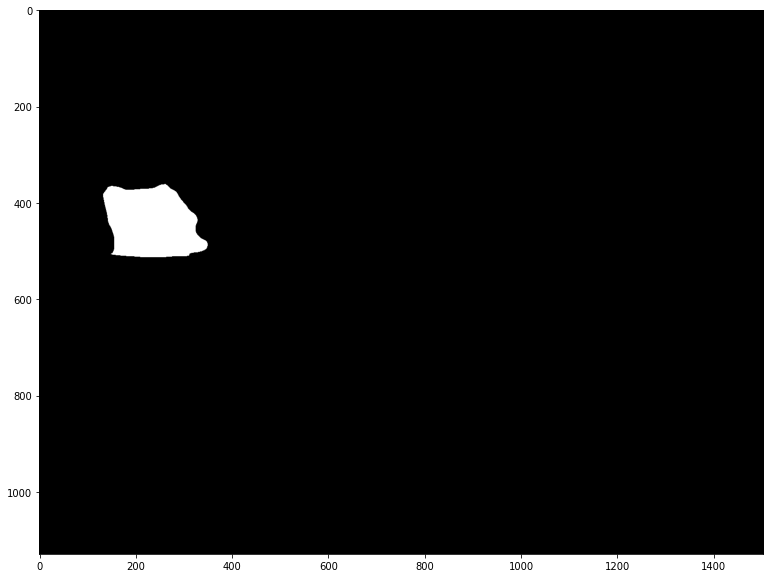

Mostrando a label  39
A area desse label é  24267


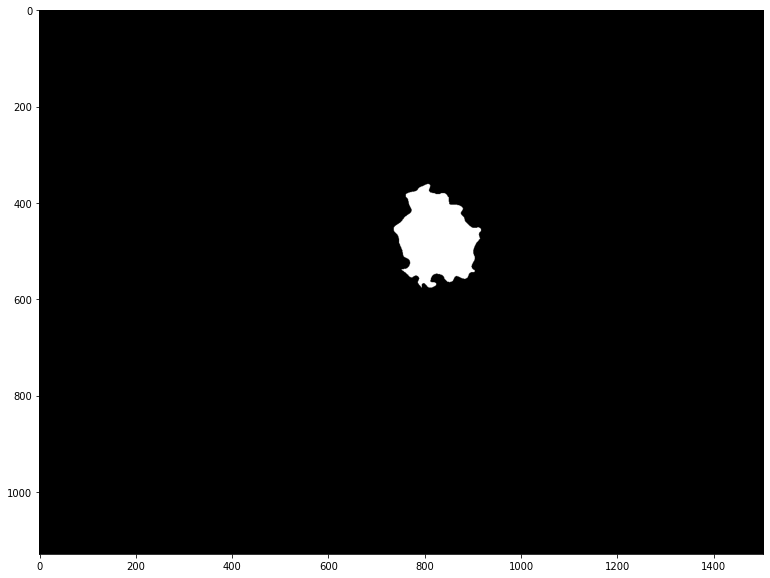

Mostrando a label  40
A area desse label é  24062


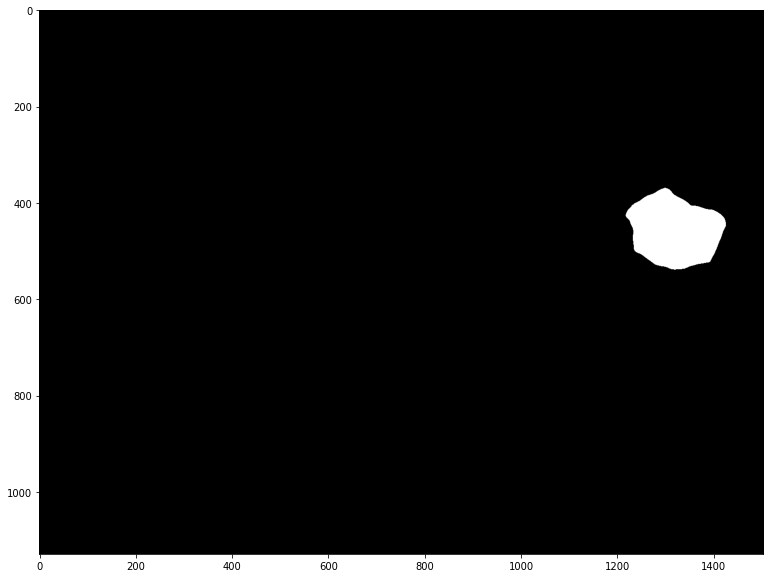

Mostrando a label  41
A area desse label é  15495


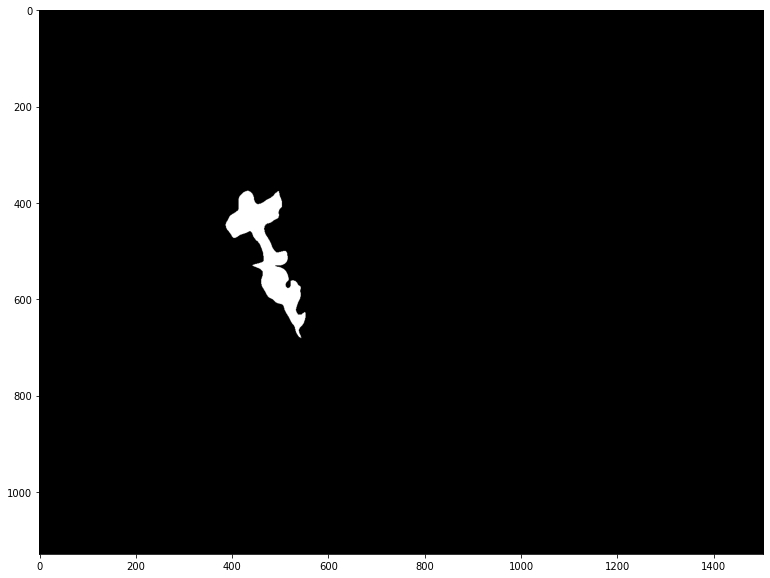

Mostrando a label  42
A area desse label é  16154


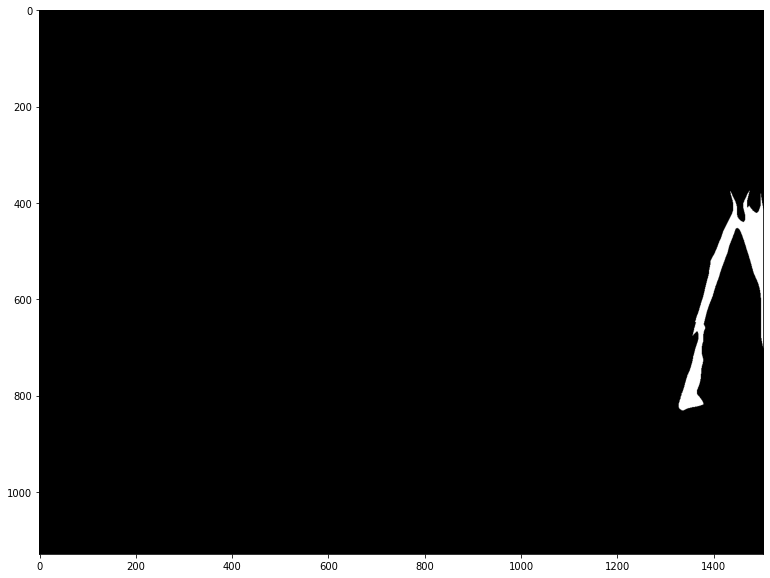

Mostrando a label  43
A area desse label é  16700


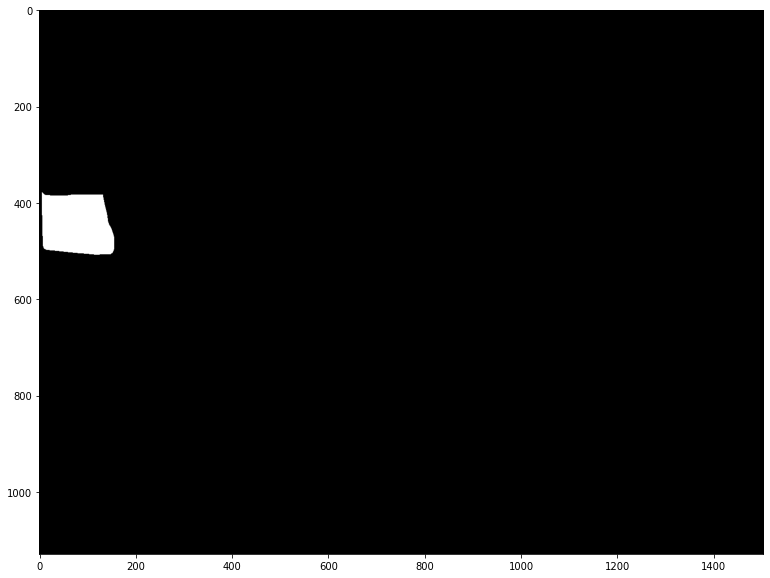

Mostrando a label  44
A area desse label é  16631


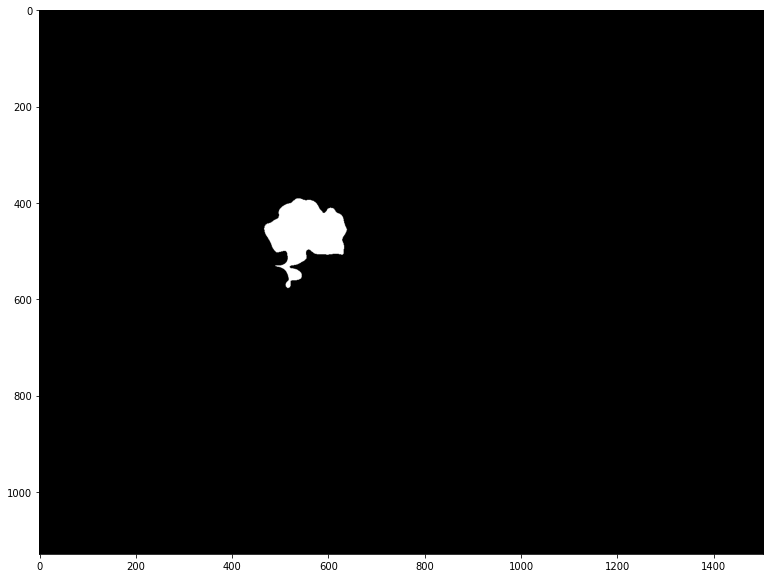

Mostrando a label  45
A area desse label é  11333


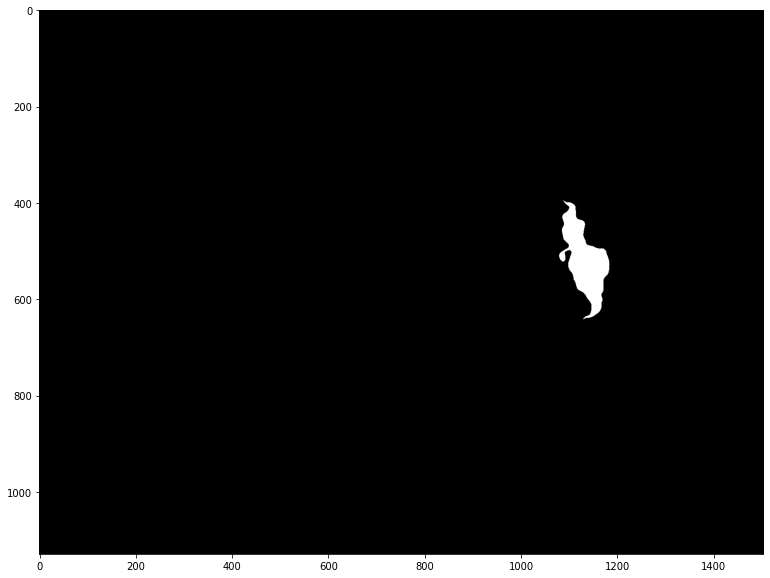

Mostrando a label  46
A area desse label é  15587


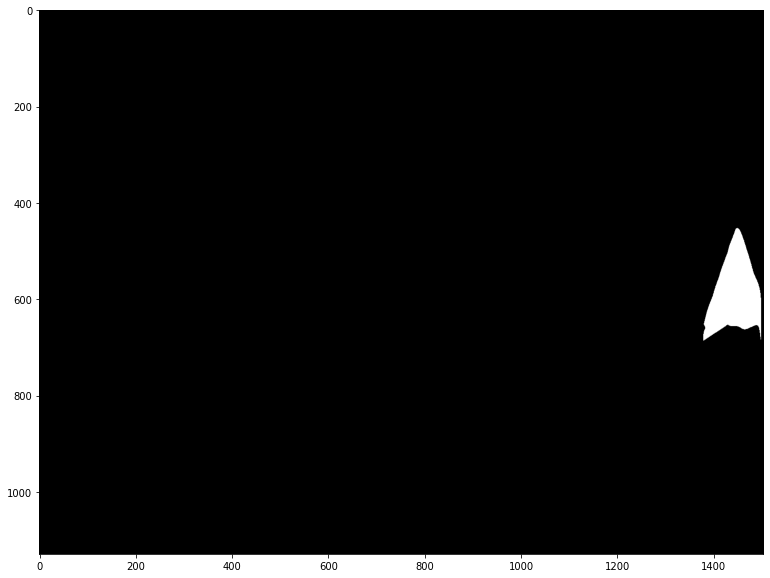

Mostrando a label  47
A area desse label é  23110


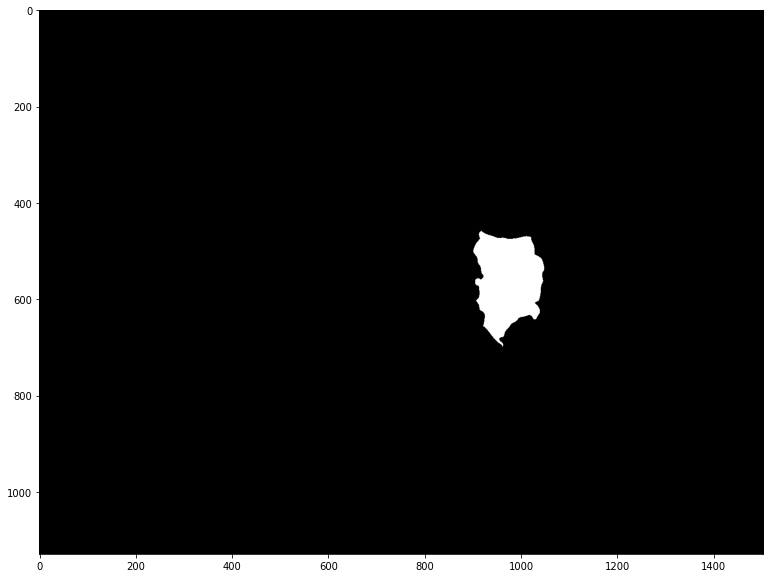

Mostrando a label  48
A area desse label é  18714


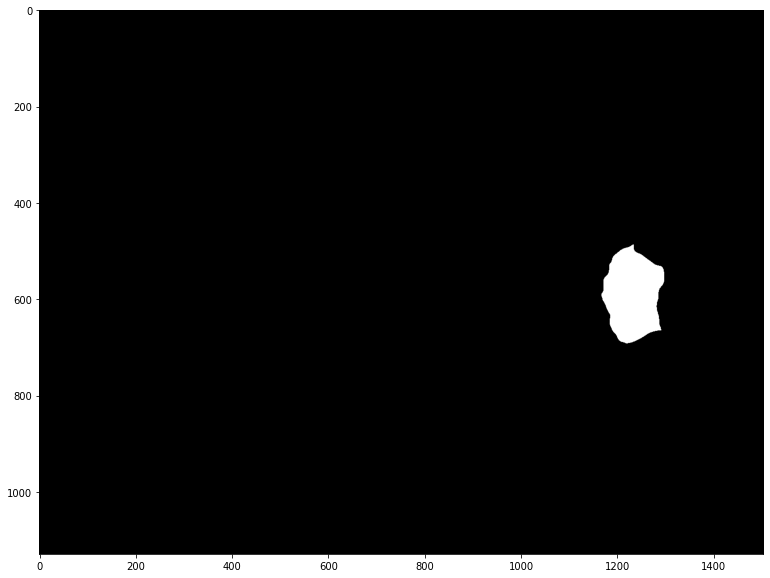

Mostrando a label  49
A area desse label é  18244


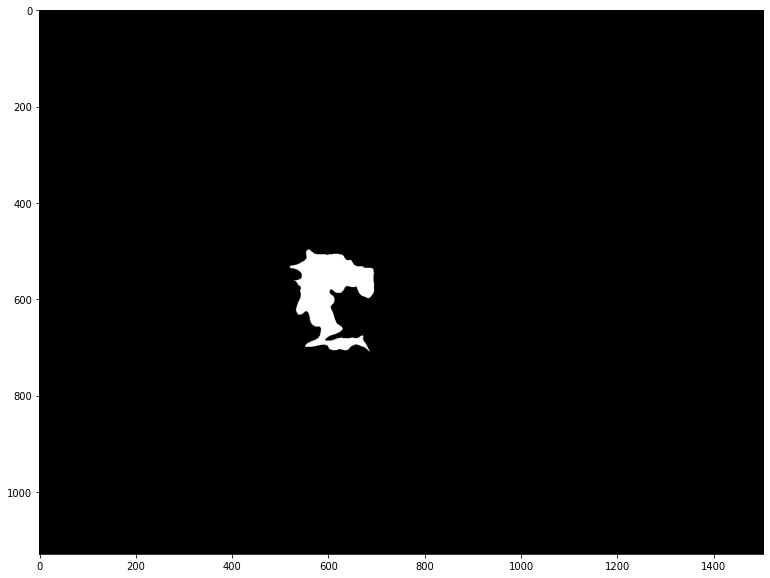

Mostrando a label  50
A area desse label é  10853


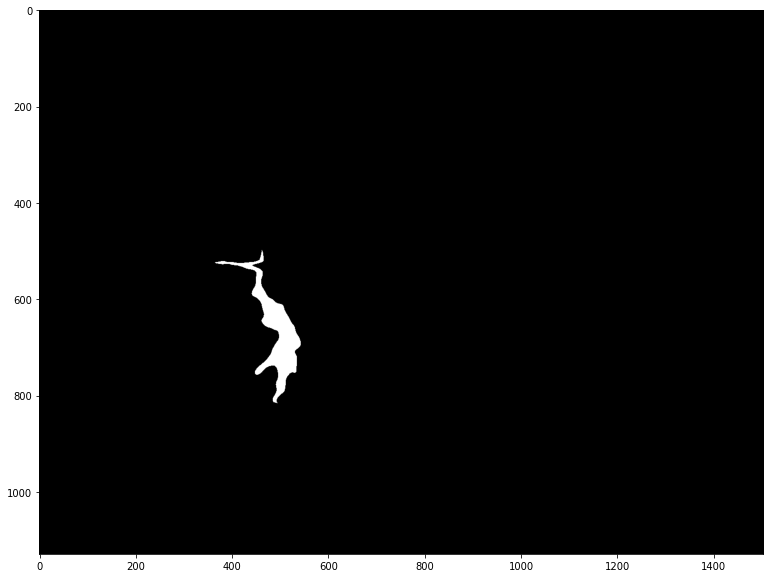

Mostrando a label  51
A area desse label é  19256


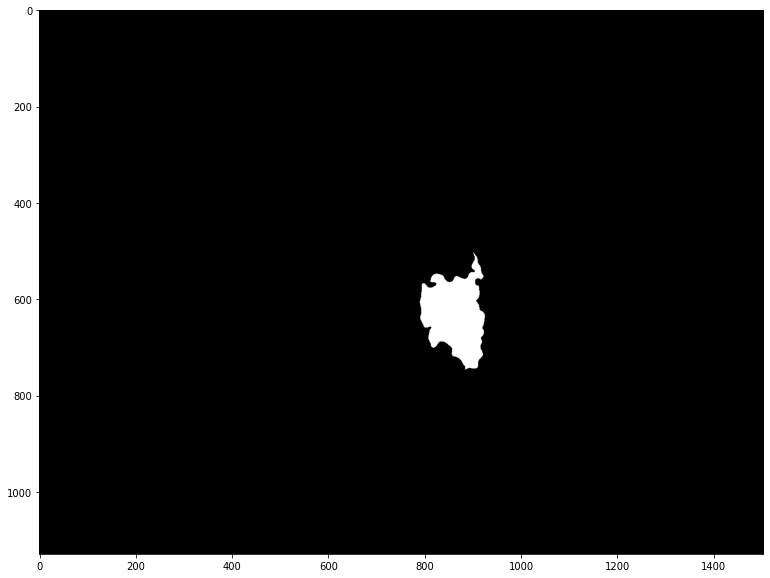

Mostrando a label  52
A area desse label é  9788


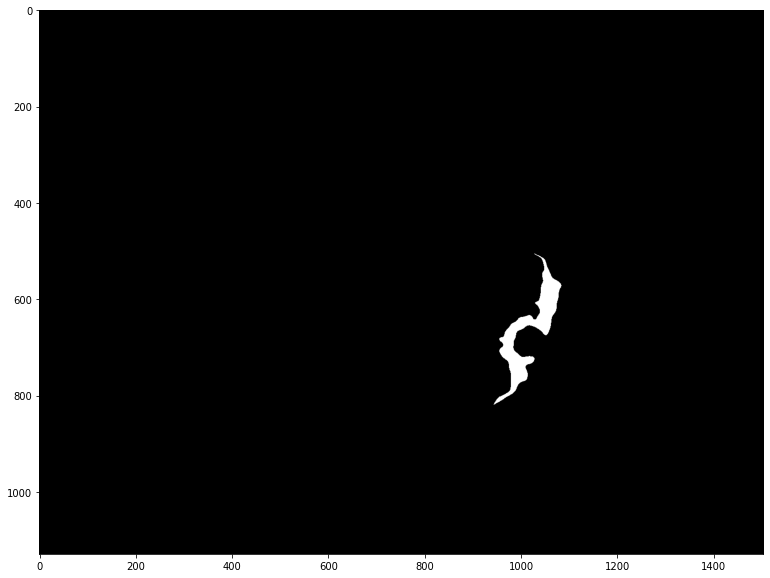

Mostrando a label  53
A area desse label é  19212


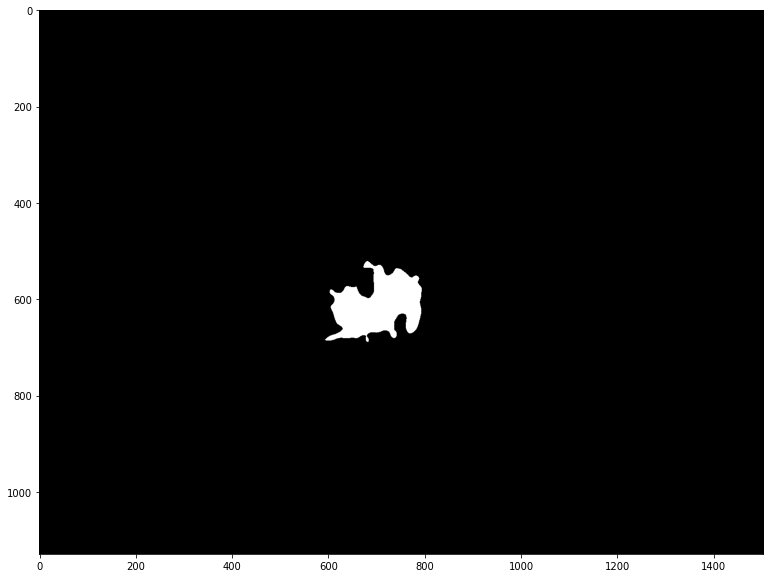

Mostrando a label  54
A area desse label é  12302


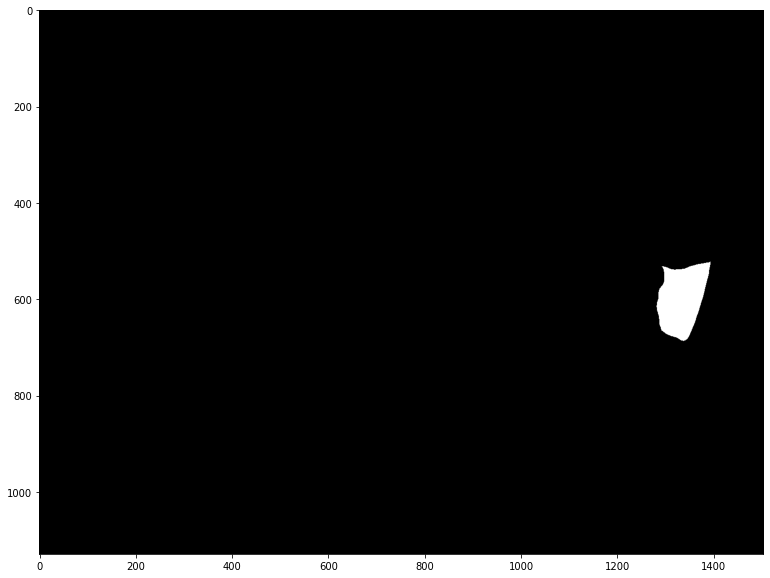

Mostrando a label  55
A area desse label é  14906


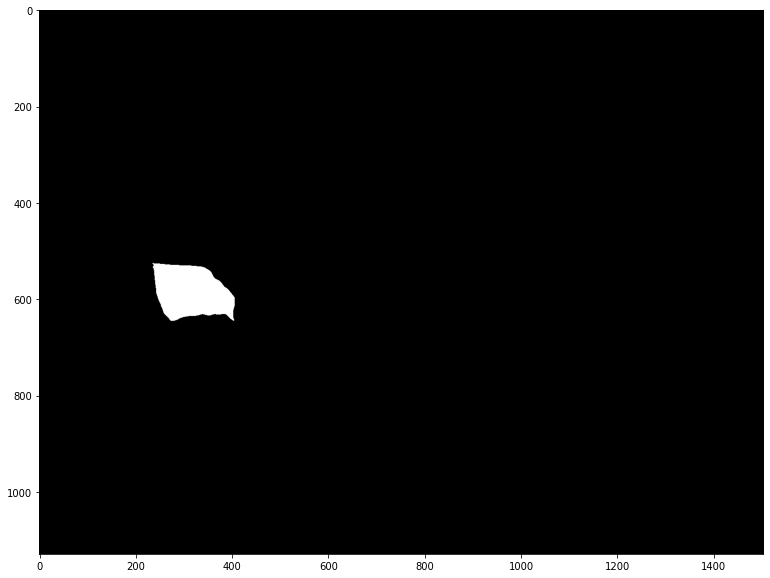

Mostrando a label  56
A area desse label é  22045


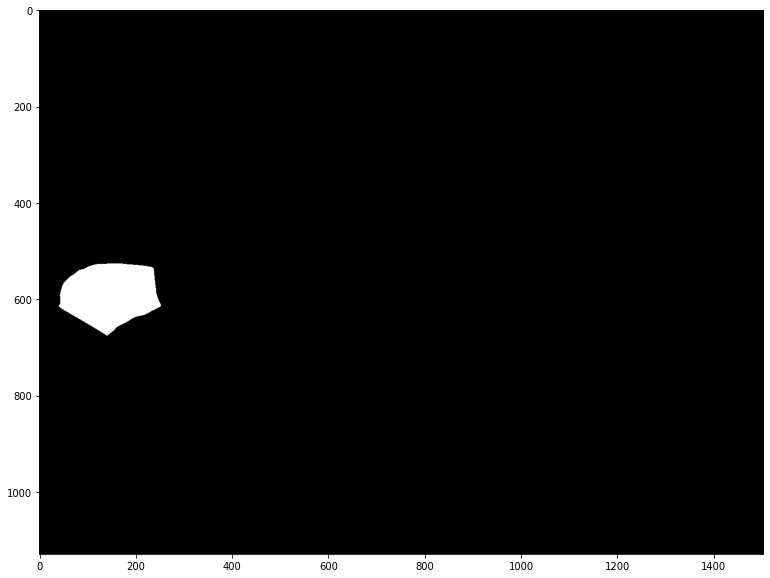

Mostrando a label  57
A area desse label é  21900


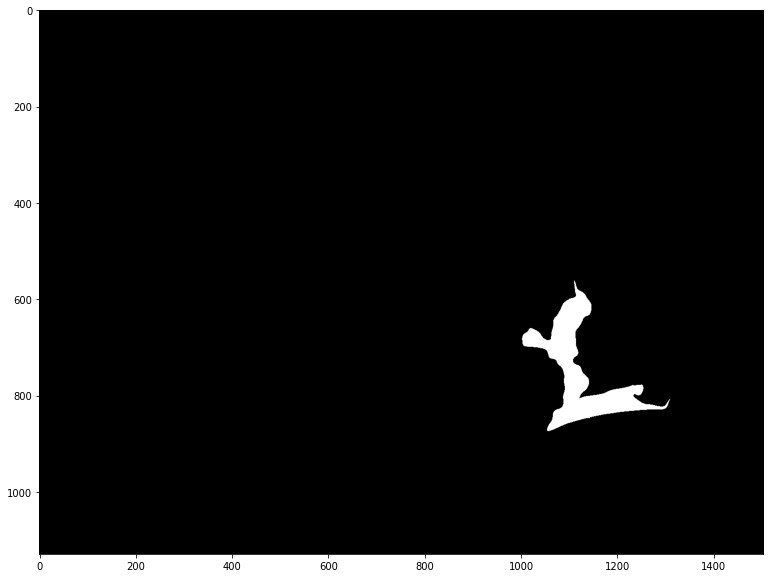

Mostrando a label  58
A area desse label é  15750


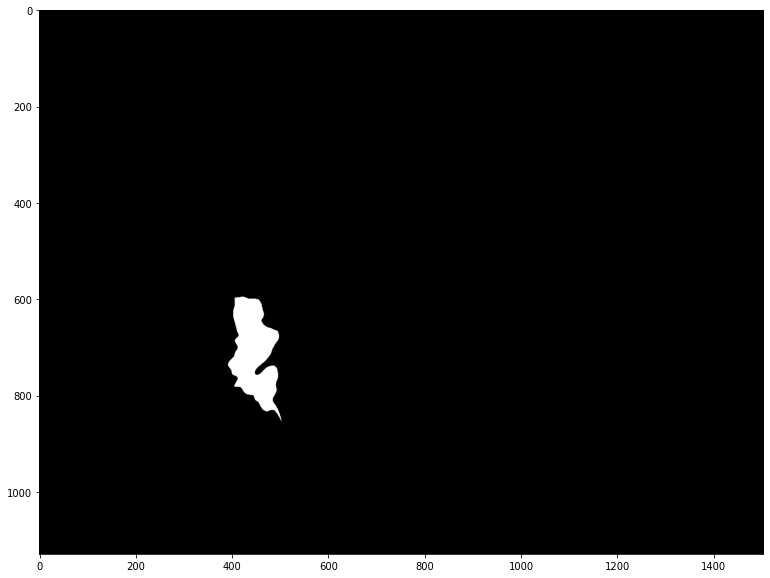

Mostrando a label  59
A area desse label é  14557


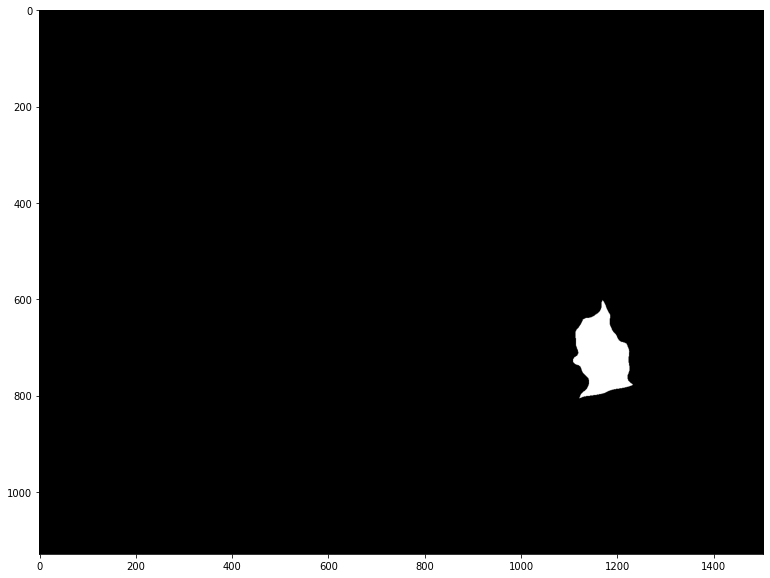

Mostrando a label  60
A area desse label é  29582


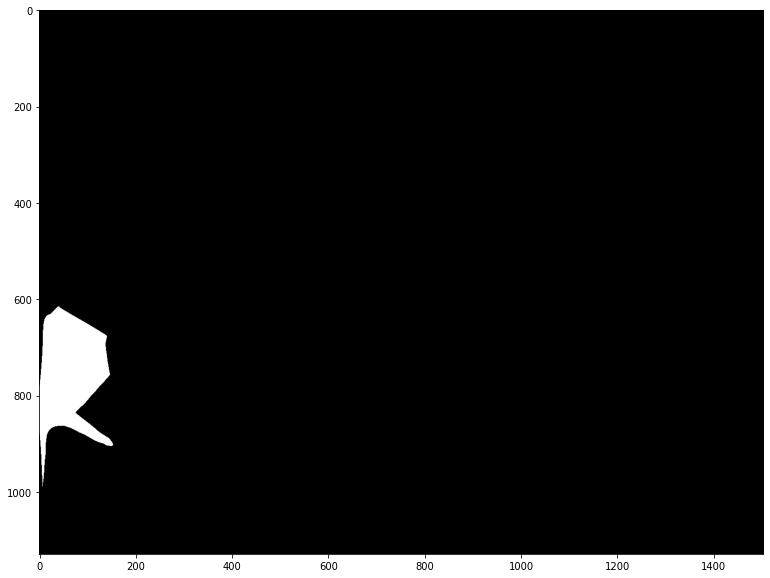

Mostrando a label  61
A area desse label é  19732


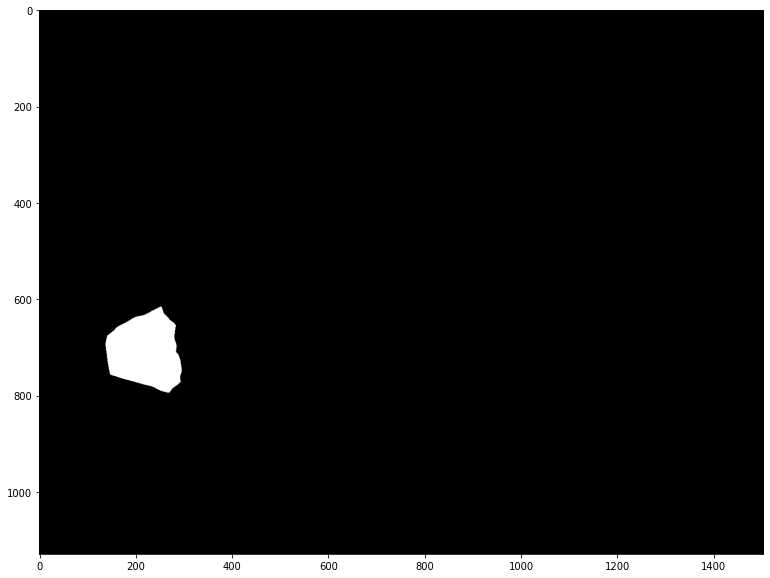

Mostrando a label  62
A area desse label é  20971


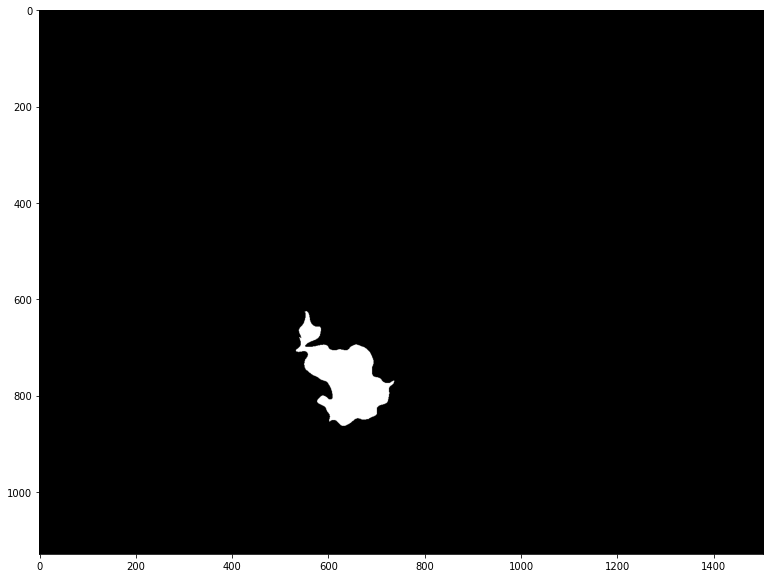

Mostrando a label  63
A area desse label é  19583


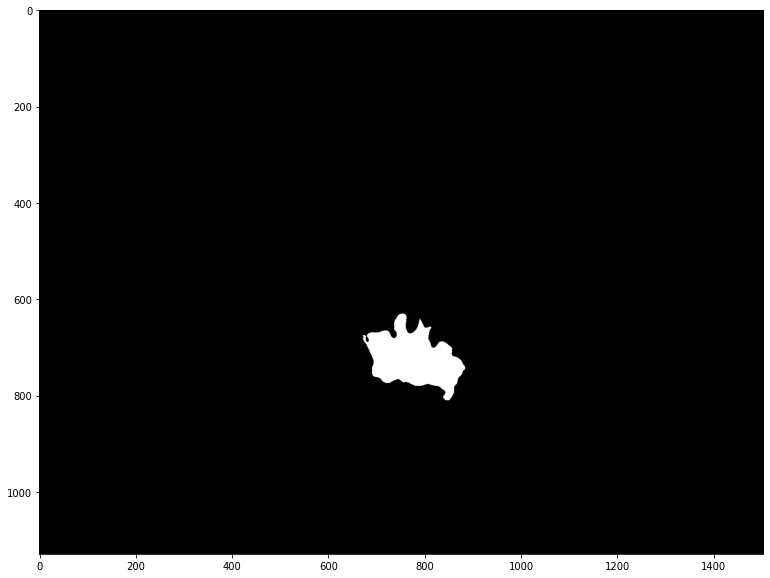

Mostrando a label  64
A area desse label é  17246


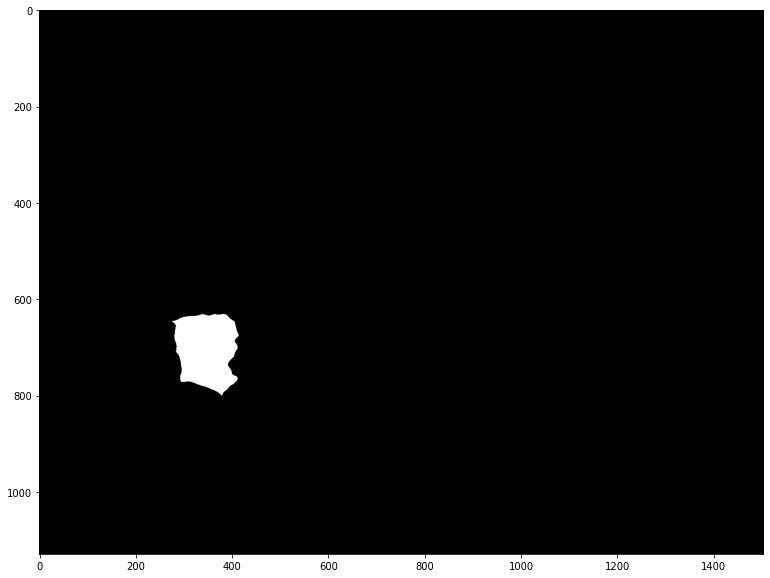

Mostrando a label  65
A area desse label é  17055


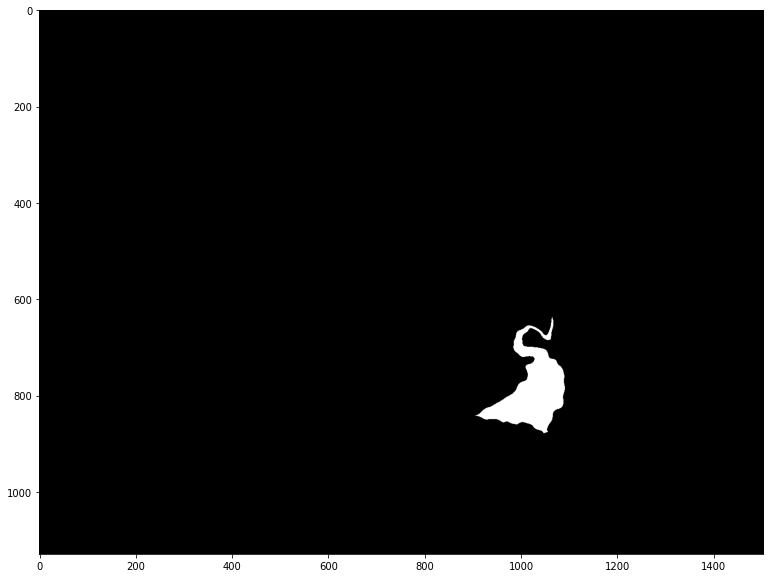

Mostrando a label  66
A area desse label é  14230


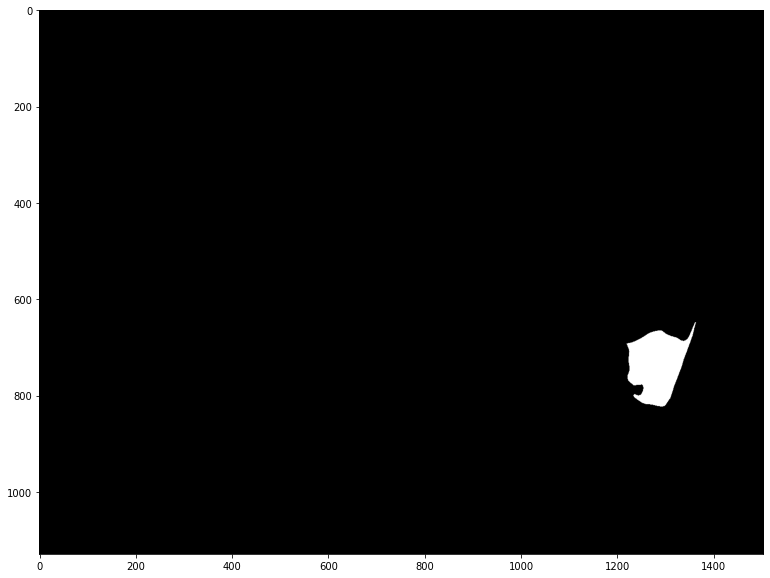

Mostrando a label  67
A area desse label é  22881


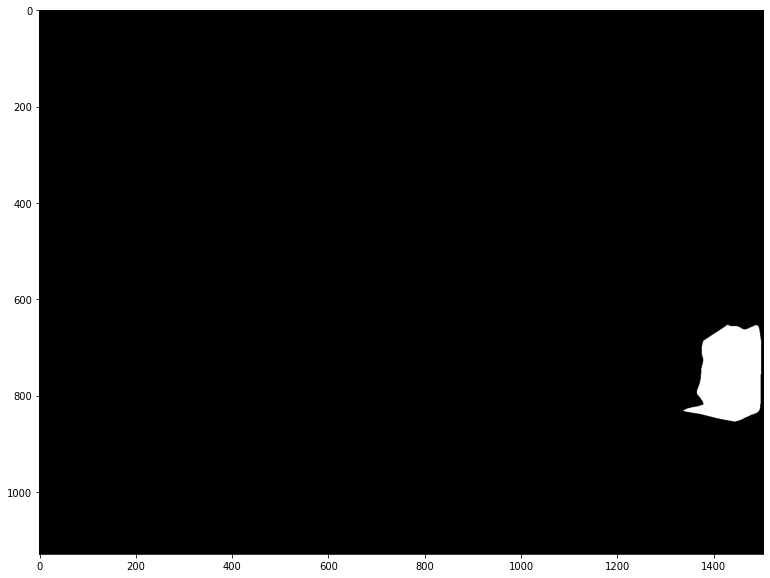

Mostrando a label  68
A area desse label é  14413


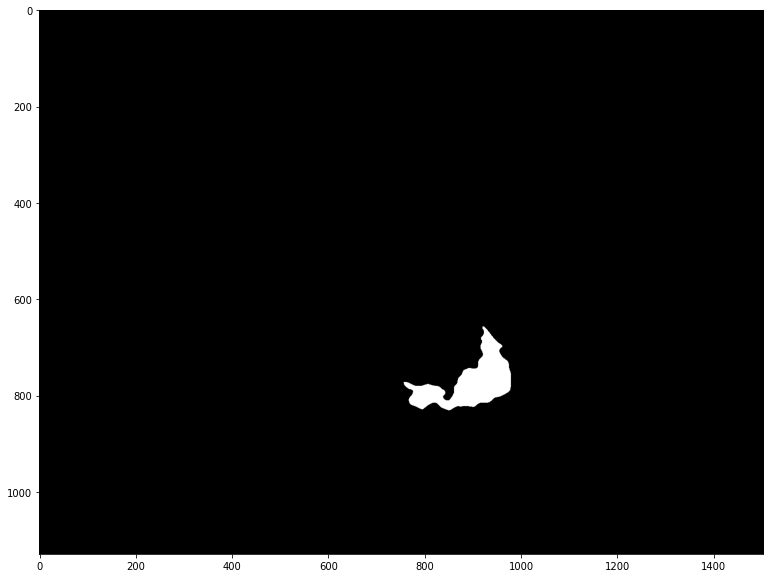

Mostrando a label  69
A area desse label é  28900


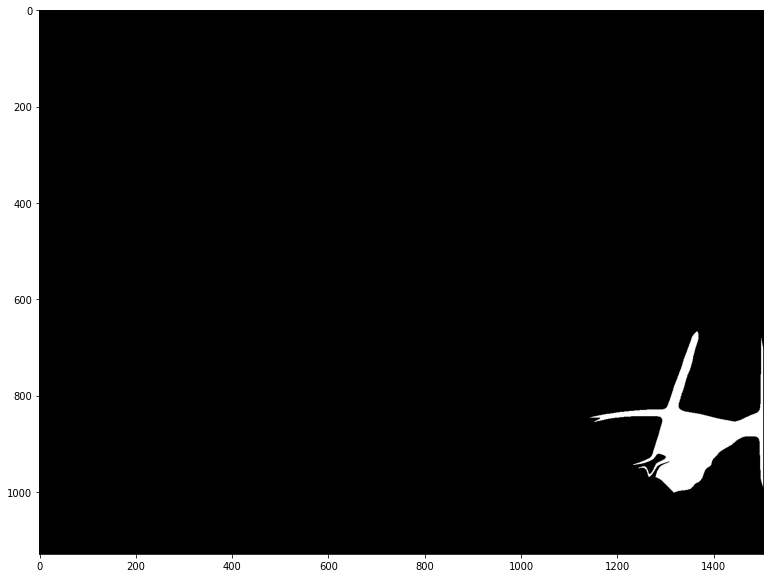

Mostrando a label  70
A area desse label é  19852


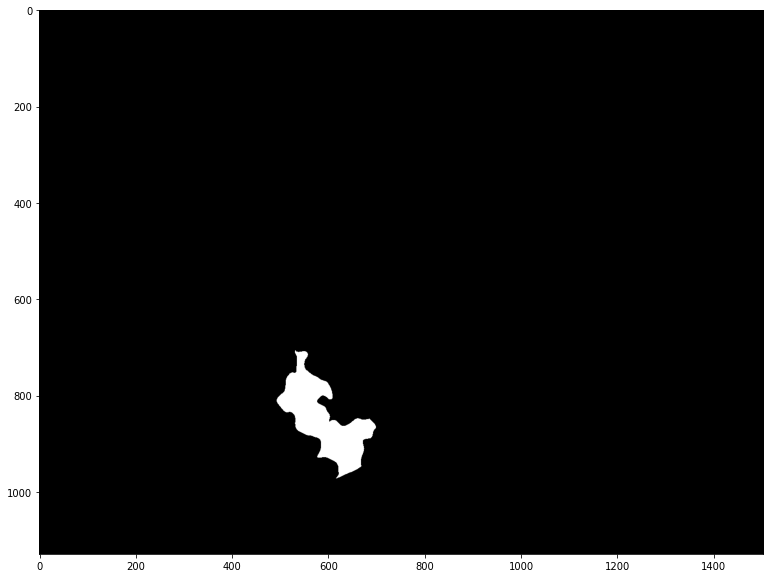

Mostrando a label  71
A area desse label é  18772


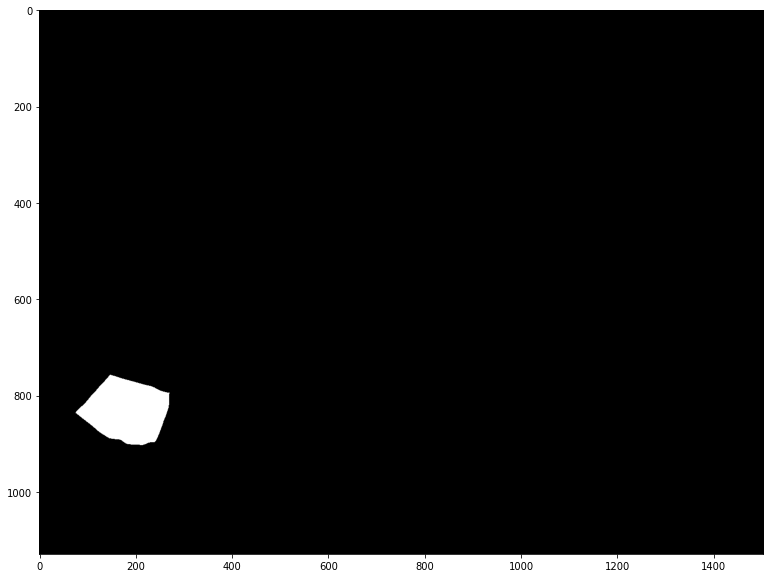

Mostrando a label  72
A area desse label é  8405


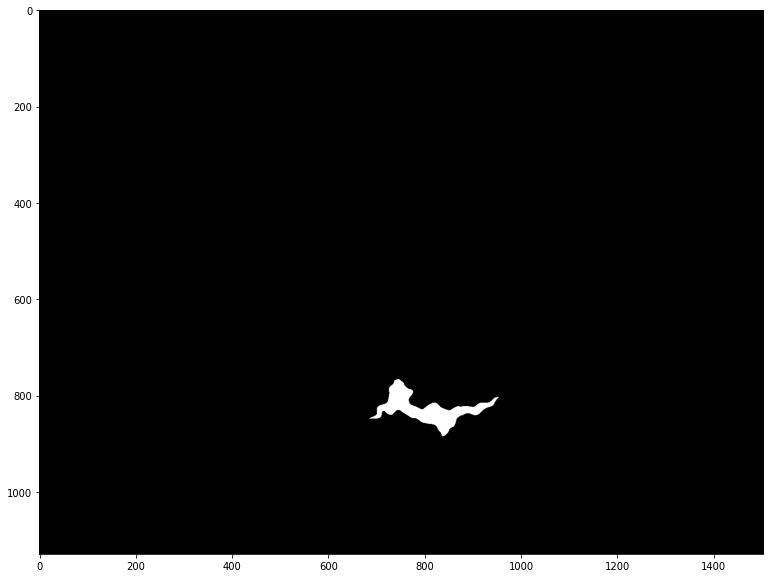

Mostrando a label  73
A area desse label é  19857


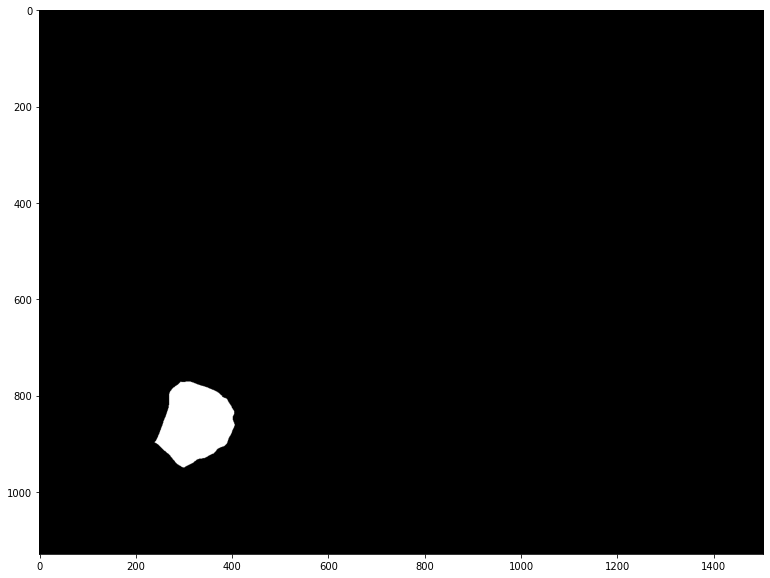

Mostrando a label  74
A area desse label é  15410


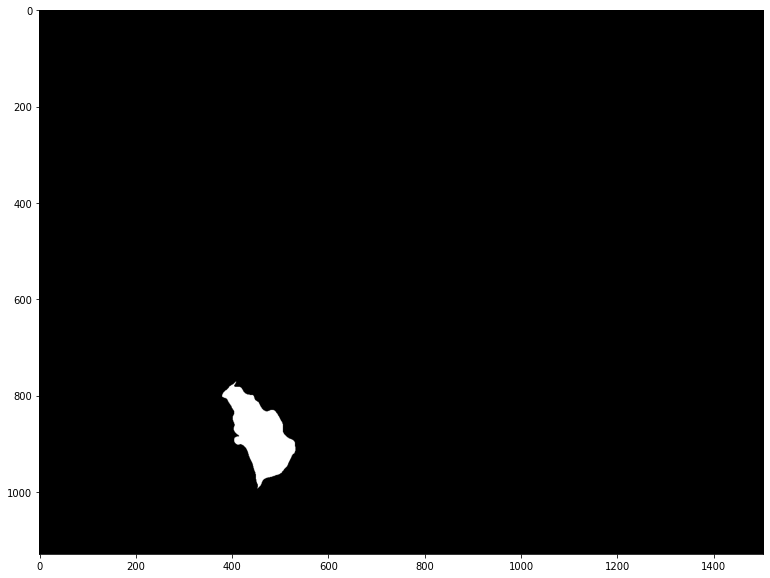

Mostrando a label  75
A area desse label é  21357


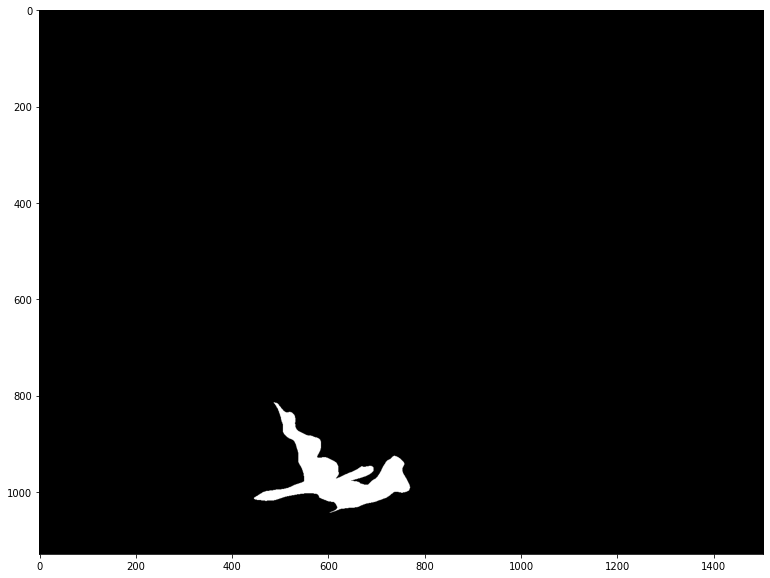

Mostrando a label  76
A area desse label é  8181


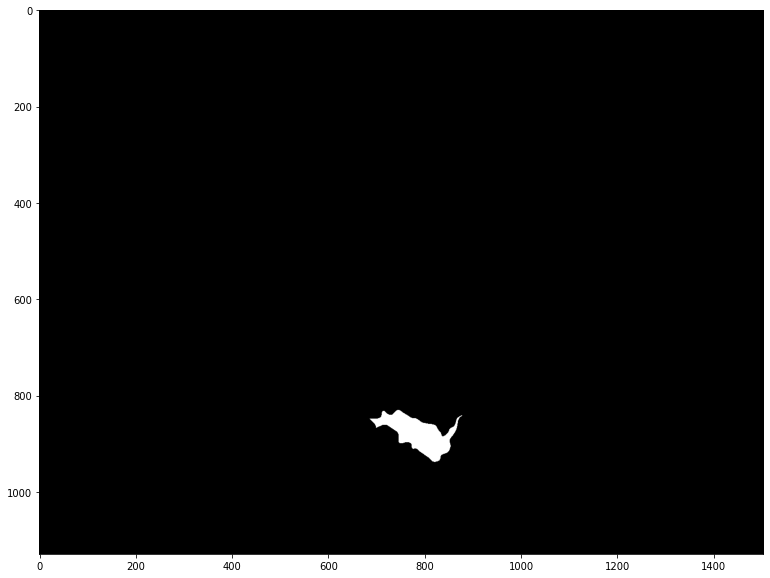

Mostrando a label  77
A area desse label é  57012


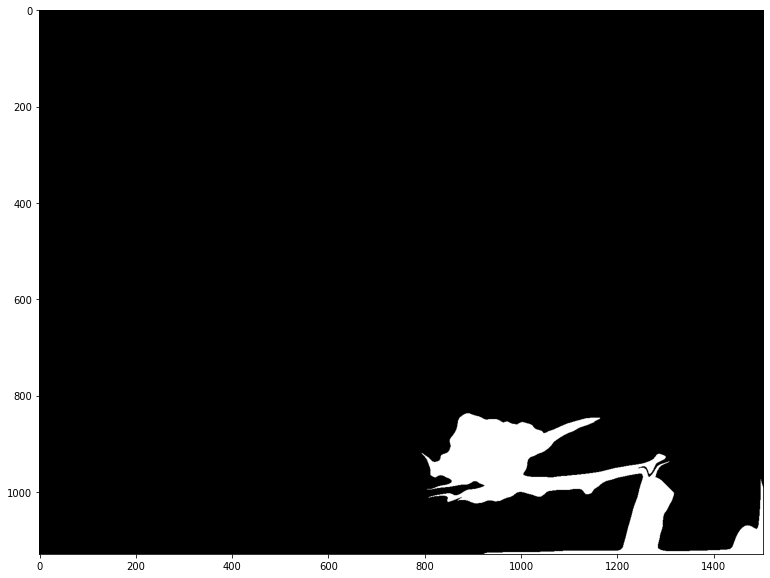

Mostrando a label  78
A area desse label é  12123


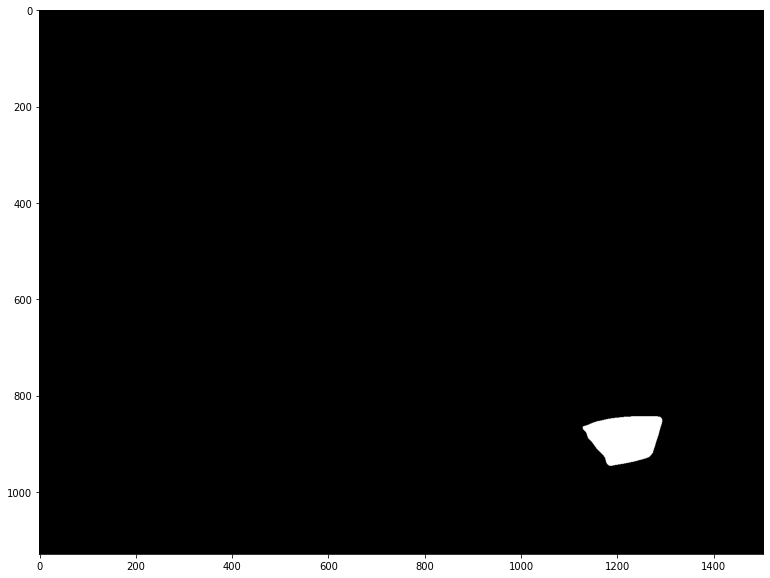

Mostrando a label  79
A area desse label é  18404


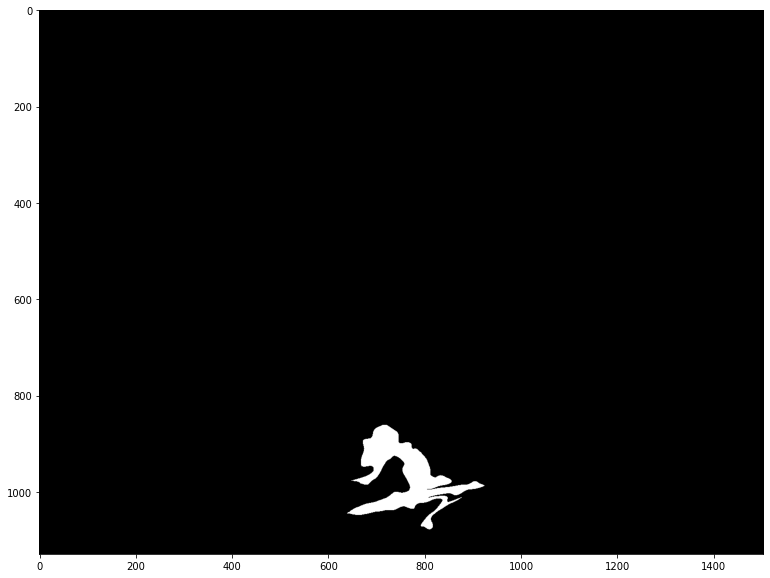

Mostrando a label  80
A area desse label é  21128


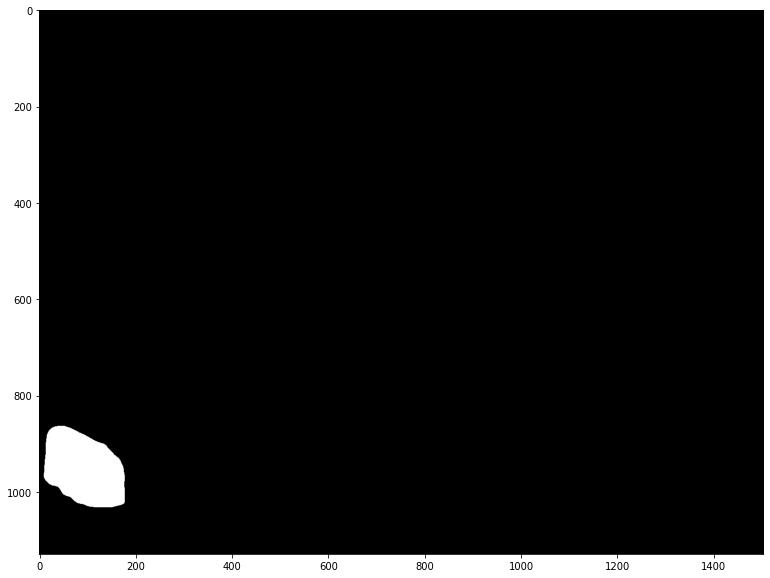

Mostrando a label  81
A area desse label é  11453


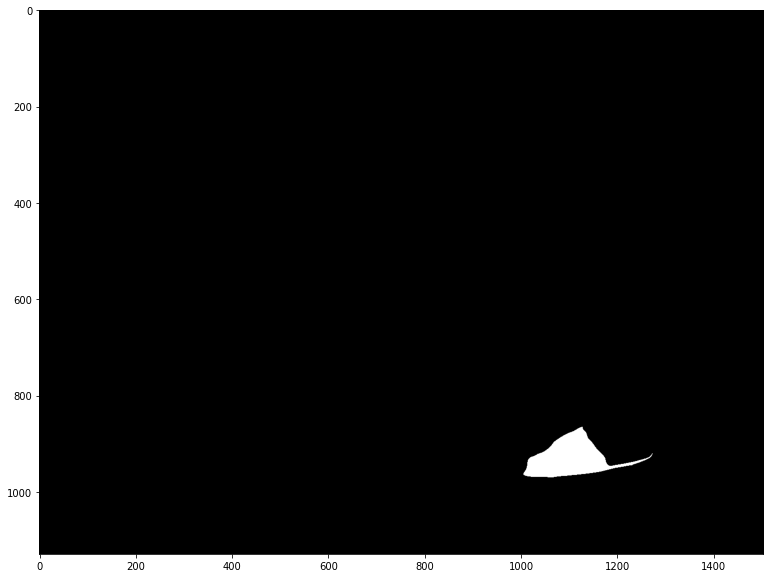

Mostrando a label  82
A area desse label é  13628


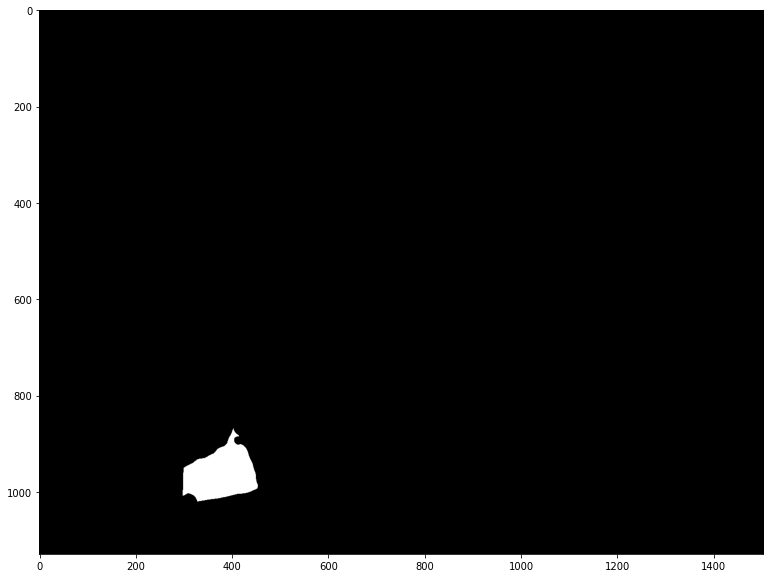

Mostrando a label  83
A area desse label é  8435


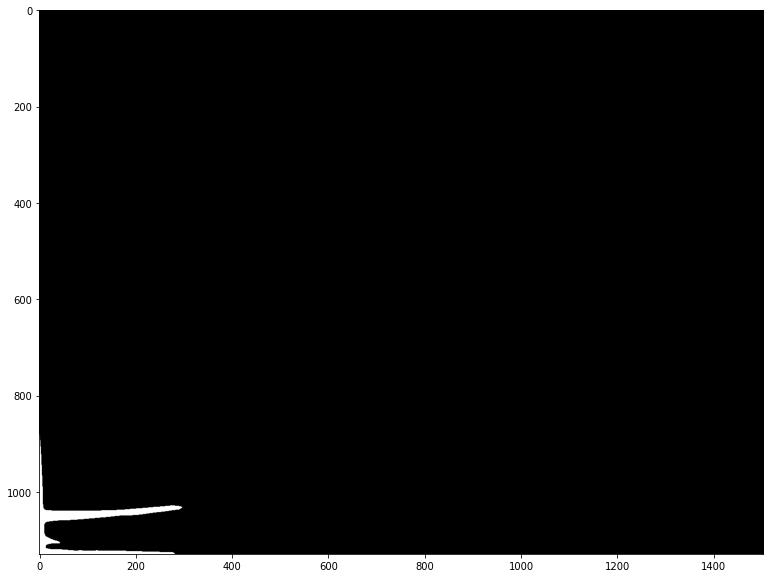

Mostrando a label  84
A area desse label é  16529


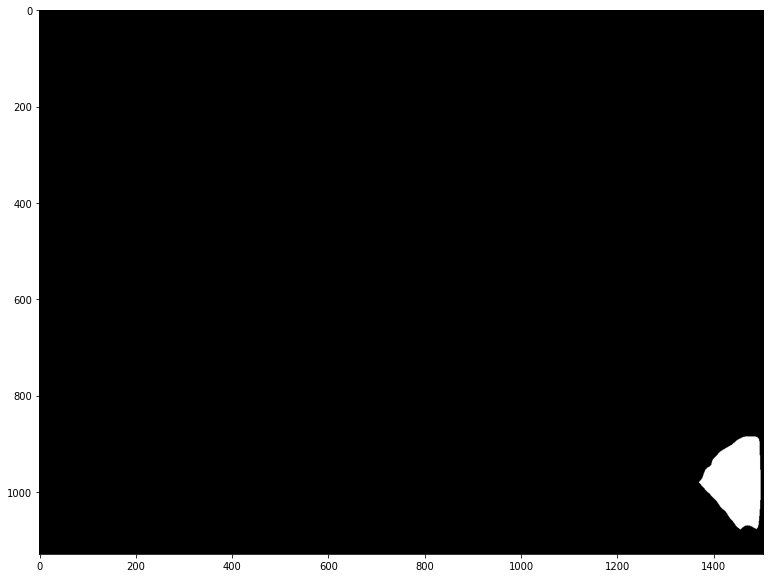

Mostrando a label  85
A area desse label é  19467


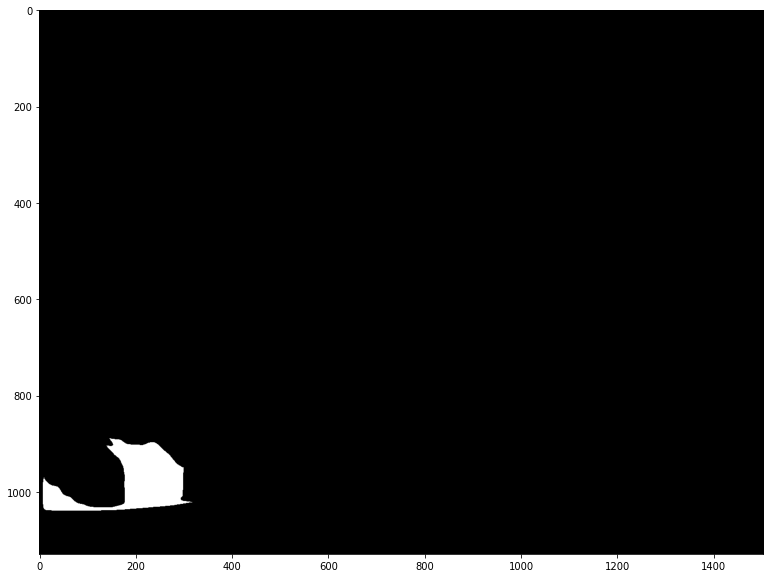

Mostrando a label  86
A area desse label é  19559


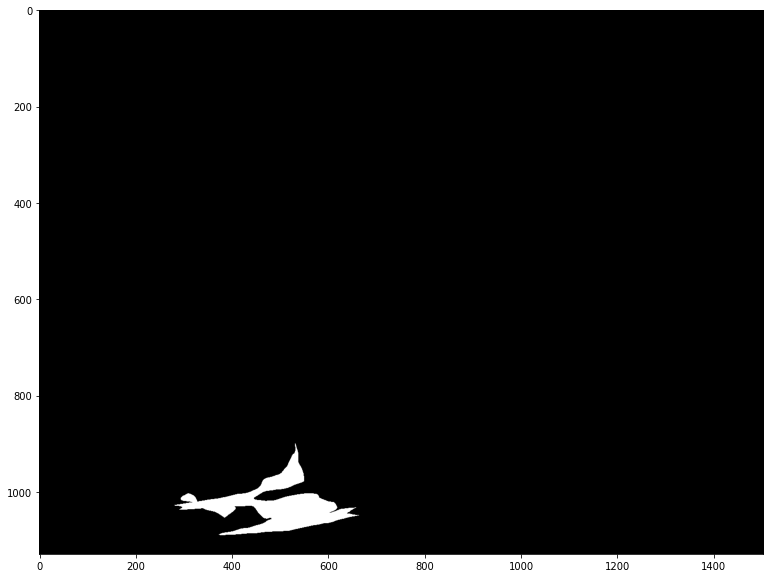

Mostrando a label  87
A area desse label é  8328


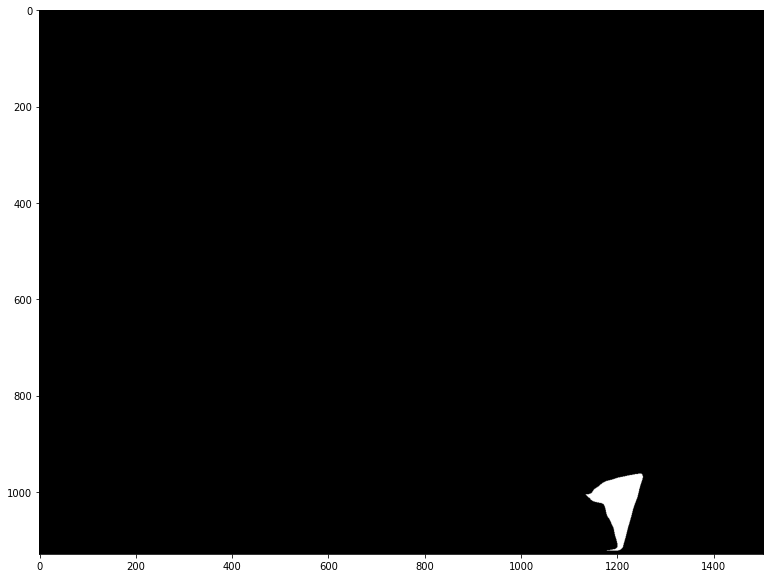

Mostrando a label  88
A area desse label é  16562


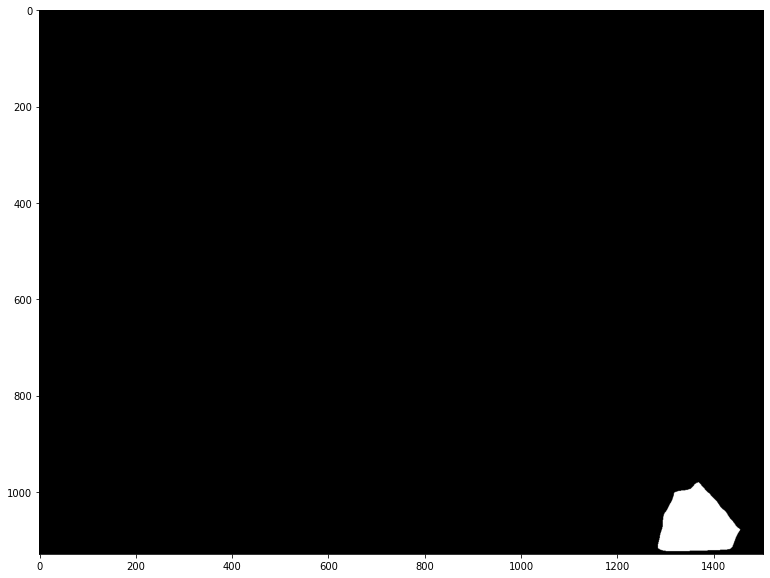

Mostrando a label  89
A area desse label é  16596


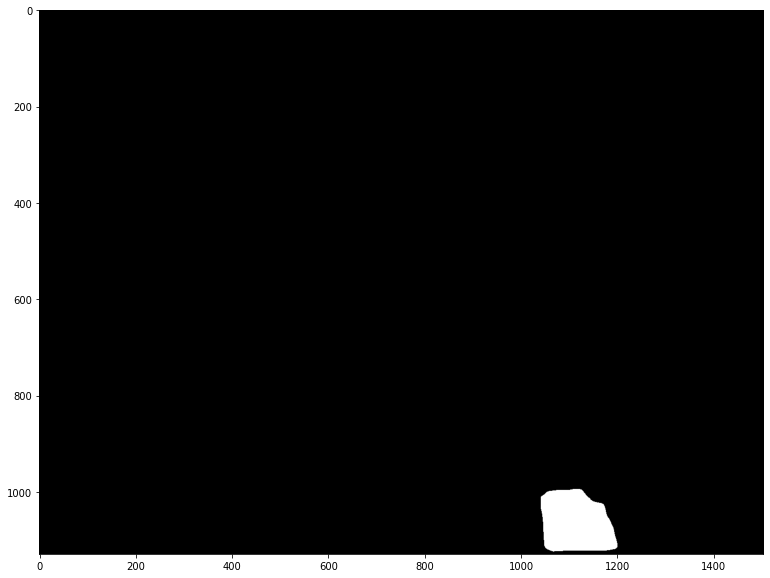

Mostrando a label  90
A area desse label é  15359


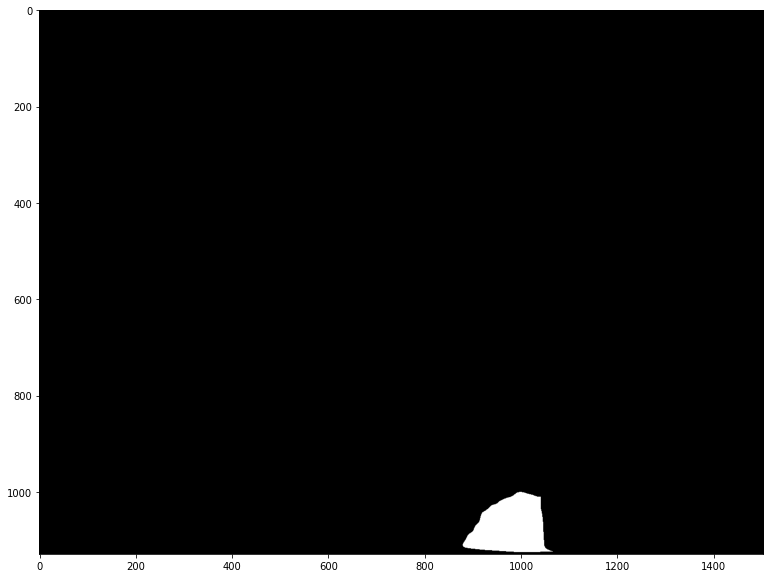

Mostrando a label  91
A area desse label é  9221


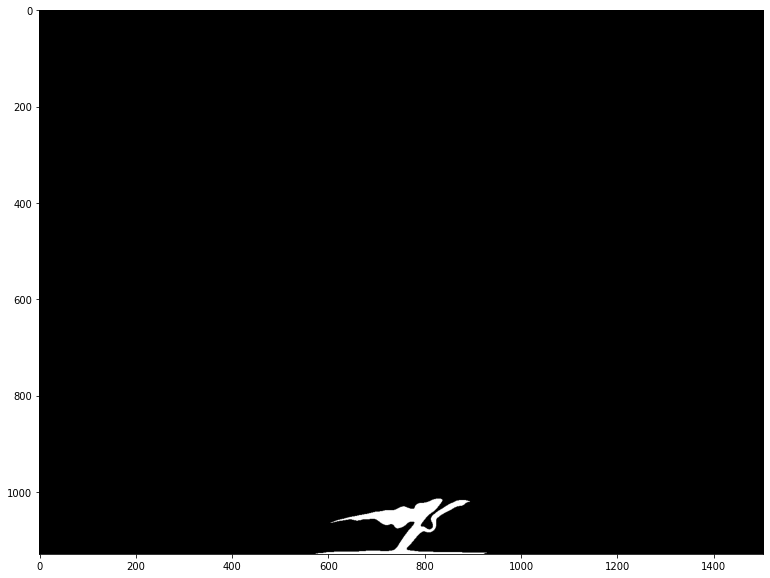

Mostrando a label  92
A area desse label é  9926


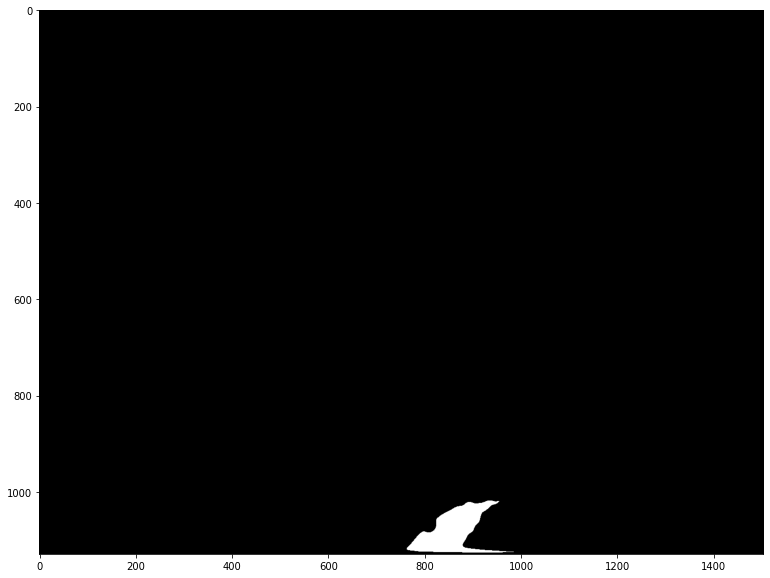

Mostrando a label  93
A area desse label é  10265


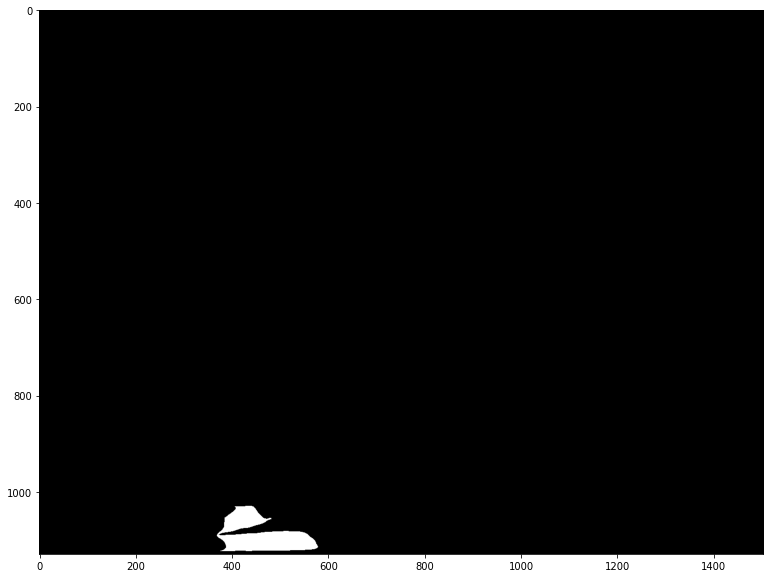

Mostrando a label  94
A area desse label é  16245


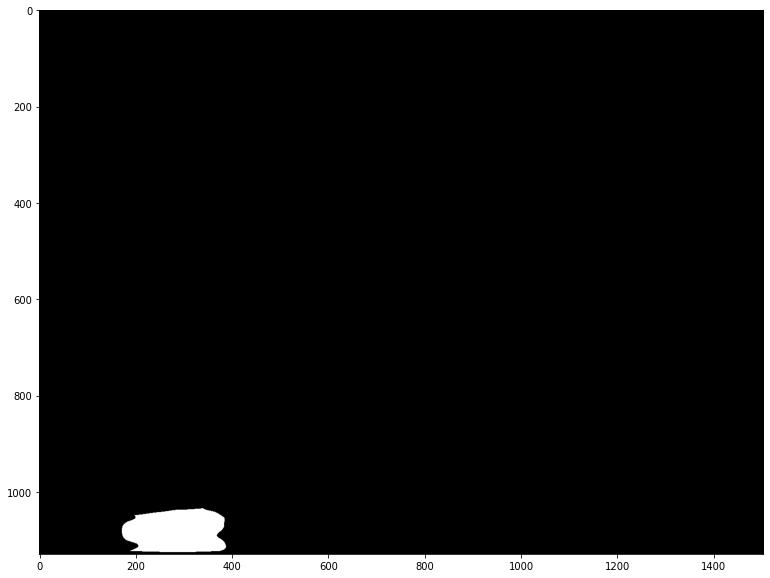

Mostrando a label  95
A area desse label é  11057


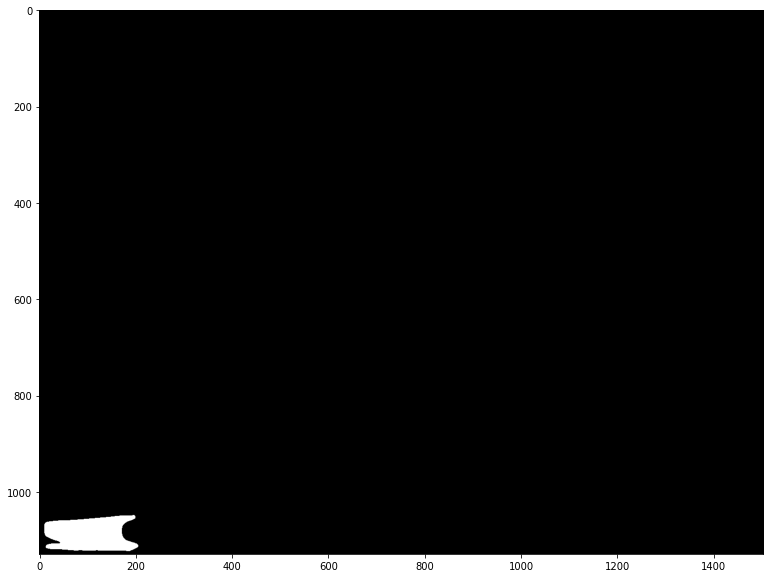

Mostrando a label  96
A area desse label é  13604


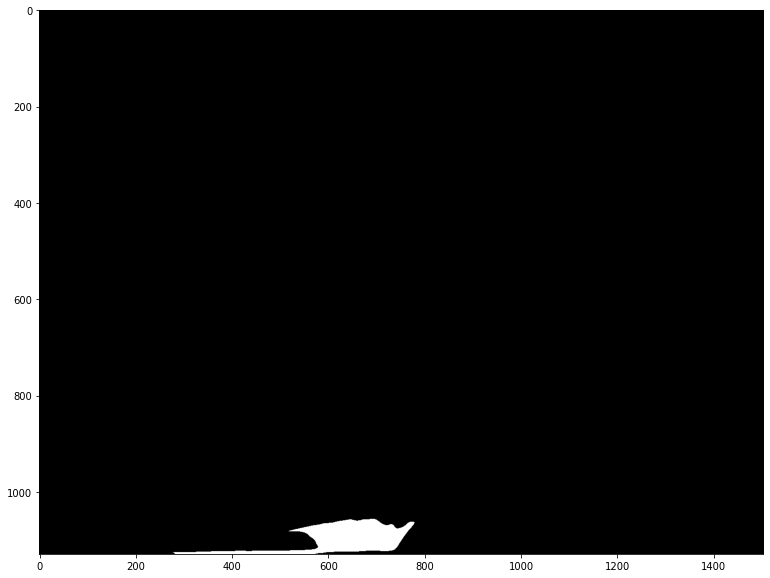

In [8]:
#printando todos os labels binarizados da imagem3
for i in range(0, len(slic_labels_list3)):
  print("Mostrando a label ", +i)
  print("A area desse label é ", +cv2.countNonZero(slic_labels_list3[i]))
  plt.imshow(np.asarray(slic_labels_list3[i]).squeeze(), cmap='gray')
  plt.show()

###Intersecção de cada label com a imagem original (Otsu)

o iou desse superpixel é:  0.0
o iou desse superpixel é:  0.0
o iou desse superpixel é:  0.0
o iou desse superpixel é:  0.0
o iou desse superpixel é:  0.0
o iou desse superpixel é:  0.0
o iou desse superpixel é:  0.0
o iou desse superpixel é:  0.0
o iou desse superpixel é:  0.0
o iou desse superpixel é:  0.0
o iou desse superpixel é:  0.021125330083282552
o iou desse superpixel é:  0.849936948297604
o iou desse superpixel é:  0.0
o iou desse superpixel é:  0.7156130074732377
o iou desse superpixel é:  0.0
o iou desse superpixel é:  1.0
o iou desse superpixel é:  0.0
o iou desse superpixel é:  1.0
o iou desse superpixel é:  0.0
o iou desse superpixel é:  0.0
o iou desse superpixel é:  0.0
o iou desse superpixel é:  0.0
o iou desse superpixel é:  0.10336642209753992
o iou desse superpixel é:  1.0
o iou desse superpixel é:  1.0
o iou desse superpixel é:  1.0
o iou desse superpixel é:  1.0
o iou desse superpixel é:  0.04098483711154481
o iou desse superpixel é:  1.0
o iou desse superpixel 

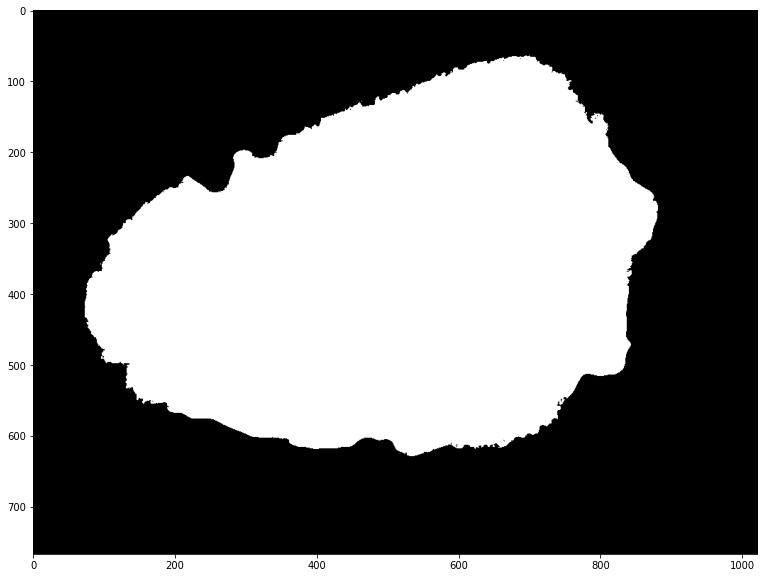

In [11]:
def intersec(list_images, image_gt):
  mask = image_gt[0,0]
  for i in range(0, len(list_images)):
    img_intersection = np.bitwise_and(list_images[i], image_gt)   #calculando a area em pixels da intersecção
    intersection = np.logical_and(img_intersection, list_images[i])
    union = np.logical_or(img_intersection, list_images[i])
    iou_score = np.sum(intersection) / np.sum(union)              #vendo o quão similar é a intersecção e a area do super pixel
    print("o iou desse superpixel é: ", iou_score)
    if iou_score >= 0.70:    #se maior ou igual a 70% então adicionar na imagem final
      mask = img_intersection + mask
  plt.imshow(np.asarray(mask).squeeze(), cmap='gray')
  plt.show()


intersec(slic_labels_list1, img_otsu1)